In [28]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import nltk
nltk.download('punkt')
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from indoNLP.preprocessing import remove_stopwords,pipeline, replace_word_elongation, replace_slang

# Set max_display_rows option
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wikab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
data = pd.read_csv('mobil_listrik.csv')

In [30]:
display(data)

,text,sentimen
0,saran sih bikin harga ionic sama kayak brio ...,positif
1,problem subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kwalitas buruk harga mahal croot,negatif
4,syarat ngaco woy anak muda blom punya ruma...,negatif
5,harga motor mahal masa harga mirip motor beat ...,positif
6,mol keren yah berita plus padahal mol loka...,negatif
7,proses kenal produk baru butuh waktu ganti ken...,negatif
8,subsidi tepat sasar,netral
9,adil rata terima subsidi jangan jangan pajak p...,negatif


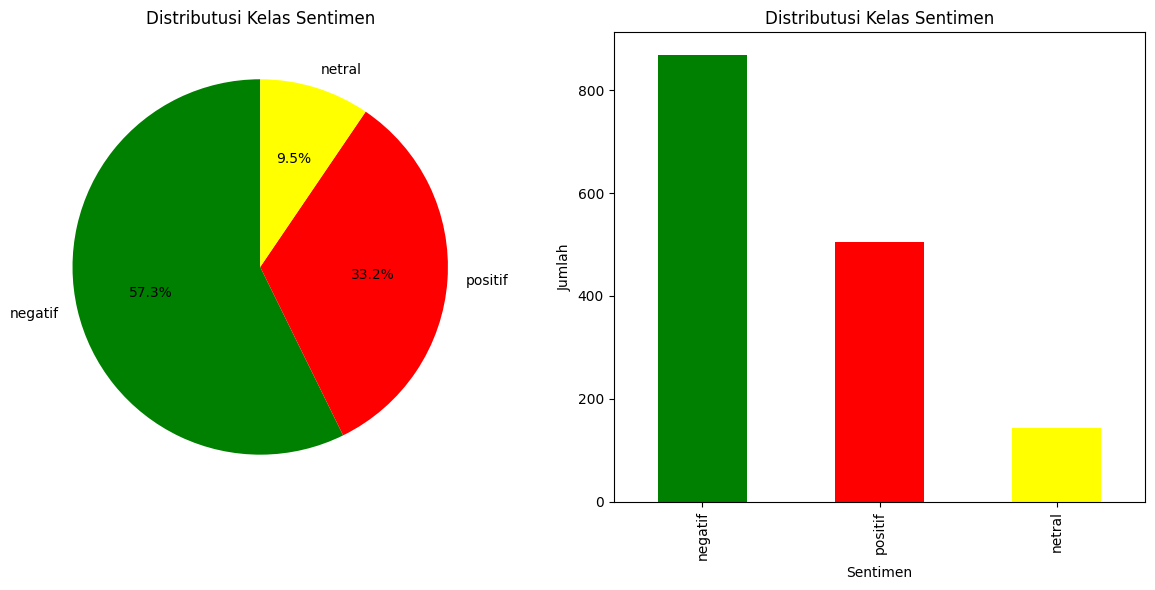

In [31]:
# Assuming 'data' is your DataFrame with a 'sentimen' column
sentimen_counts = data['sentimen'].value_counts()

# Create subplots with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart in the first subplot
axes[0].pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'yellow'])
axes[0].set_title('Distributusi Kelas Sentimen')

# Plot the bar chart in the second subplot
sentimen_counts.plot(kind='bar', ax=axes[1], color=['green', 'red', 'yellow'])
axes[1].set_title('Distributusi Kelas Sentimen')
axes[1].set_xlabel('Sentimen')
axes[1].set_ylabel('Jumlah')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [32]:
data['sentimen'].value_counts()

sentimen
negatif    869
positif    504
netral     144
Name: count, dtype: int64

In [33]:
le = LabelEncoder()
data['sentimen'] = le.fit_transform(data['sentimen'])

review_positif = data[data['sentimen'] == 0]
review_negatif = data[data['sentimen'] == 1]
review_netral = data[data['sentimen'] == 2]

# Display only 'text' and 'sentimen' columns
print("20 Sampel review positif\n", review_positif[['text', 'sentimen']][:20])
print("\n20 Sampel review negatif\n", review_negatif[['text', 'sentimen']][:20])
print("\n20 Sampel review netral\n", review_netral[['text', 'sentimen']][:20])


20 Sampel review positif
                                                  text  sentimen
1   problem subsidi kualitas diturunin harga dinai...         0
3        model jelek kwalitas buruk harga mahal croot         0
4   syarat   ngaco woy anak muda   blom punya ruma...         0
6   mol keren yah   berita   plus padahal mol loka...         0
7   proses kenal produk baru butuh waktu ganti ken...         0
9   adil rata terima subsidi jangan jangan pajak p...         0
10    tepat sasar donk syarat belum tepat subsidi ...         0
11  mungkin subsidi baik arah   seragam sekolah bi...         0
13  banyak kenderaan buat tiongkok rekam bakar let...         0
15                                         tahan th           0
17             kendaran plg rawan bakar   mudah padam         0
18    buat hari   sih sangat guna     jalan jauh  ...         0
20            subsidi motor   jalan umum tolak system         0
21  apa sieh kok mbulet asli yo tiap spbu seluruh ...         0
22            

In [34]:
data['text'] = data['text'].fillna('')

# Case Folding

Case folding adalah salah satu bentuk text preprocessing yang paling sederhana dan efektif meskipun sering diabaikan. Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima. Karakter selain huruf dihilangkan dan dianggap delimiter.

In [35]:
def caseFolding(text):
    text = str(text)
    # Mengubah teks menjadi lowercase
    text = text.lower()
    
    # Menghapus whitespace
    text = ' '.join(text.split())
    
    # Menghapus angka
    text = re.sub(r"//t",r"\t",text)
    text = re.sub(r"( )\1+",r"\1",text)
    text = re.sub(r"(\n)\1+",r"\1",text)
    text = re.sub(r"(\r)\1+",r"\1",text)
    text = re.sub(r"(\t)\1+",r"\1",text)
    text = re.sub(r"(\d)\1+",r"\1",text)
    
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

In [36]:
copy_data_casefold = data.copy()
# Apply case folding to the 'text' column
copy_data_casefold['text'] = copy_data_casefold['text'].apply(caseFolding)

# Display the 'text' column
display(copy_data_casefold['text'])


0       saran sih bikin harga ionic sama kayak brio in...
1       problem subsidi kualitas diturunin harga dinai...
2       baik kualitas kembang dulu baik kualitas motor...
3            model jelek kwalitas buruk harga mahal croot
4       syarat ngaco woy anak muda blom punya rumah bl...
5       harga motor mahal masa harga mirip motor beat ...
6       mol keren yah berita plus padahal mol lokal me...
7       proses kenal produk baru butuh waktu ganti ken...
8                                     subsidi tepat sasar
9       adil rata terima subsidi jangan jangan pajak p...
10      tepat sasar donk syarat belum tepat subsidi ku...
11      mungkin subsidi baik arah seragam sekolah bila...
12      kampung sekarang banyak banget bocil sama cewe...
13      banyak kenderaan buat tiongkok rekam bakar let...
14                                    harga terlalu mahal
15                                               tahan th
16                                     iklan kudu kencang
17            

# Filtering (Hapus Stopword)

#### Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting)  
#### Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna.

In [37]:
# Menggunakan fungsi remove_stopwords pada kolom teks
copy_data_stop = copy_data_casefold.copy()
copy_data_stop['text'] = copy_data_stop['text'].apply(remove_stopwords)

In [38]:
display(copy_data_stop['text'])

0       saran sih bikin harga ionic  kayak brio insya ...
1       problem subsidi kualitas diturunin harga dinai...
2       kualitas kembang   kualitas motor motor pabrik...
3            model jelek kwalitas buruk harga mahal croot
4       syarat ngaco woy anak muda blom  rumah blom jd...
5       harga motor mahal  harga  motor beat kualitas ...
6       mol keren yah berita plus  mol lokal merk batr...
7       proses kenal produk  butuh  ganti kendara bbm ...
8                                          subsidi  sasar
9       adil  terima subsidi   pajak pph msh subsidi p...
10      sasar donk syarat   subsidi   jd warga   pikir...
11      subsidi  arah seragam sekolah    seragam sekol...
12               kampung   banget bocil  cewek pake motor
13      kenderaan  tiongkok rekam bakar letup amerika ...
14                                           harga  mahal
15                                               tahan th
16                                     iklan kudu kencang
17            

# Stemming

Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar”.

In [39]:
copy_data_stemmed = copy_data_stop.copy() 

copy_data_stemmed['text'] = copy_data_stemmed['text'].apply(pipeline([replace_word_elongation, replace_slang]))

In [40]:
display(copy_data_stemmed['text'])

0       saran sih bikin harga ionic  kayak brio insya ...
1       problem subsidi kualitas diturunin harga dinai...
2       kualitas kembang   kualitas motor motor pabrik...
3            model jelek kwalitas buruk harga mahal croot
4       syarat mengaco woy anak muda belum  rumah belu...
5       harga motor mahal  harga  motor beat kualitas ...
6       mol keren ya berita plus  mol lokal merk batre...
7       proses kenal produk  butuh  ganti kendara bbm ...
8                                          subsidi  sasar
9       adil  terima subsidi   pajak pph masih subsidi...
10      sasar dong syarat   subsidi   jadi warga   pik...
11      subsidi  arah seragam sekolah    seragam sekol...
12              kampung   banget bocil  cewek pakai motor
13      kenderaan  tiongkok rekam bakar letup amerika ...
14                                           harga  mahal
15                                             tahan tahu
16                                     iklan kudu kencang
17            

# Tokenizing 

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. 

In [41]:
def Tokenized(text):
    text = str(text)
    # Tokenisasi kata
    tokens = word_tokenize(text)
    
    # Distribusi frekuensi kata
    frequency_distribution = FreqDist(tokens)
    

    return frequency_distribution

In [42]:
def joinedTokens(text):
    text = str(text)
    tokens = word_tokenize(text)
    frequency_distribution = FreqDist(tokens)
    display(frequency_distribution)

    # Join tokens into a space-separated string
    text = ' '.join(tokens)

    return text

In [43]:
copy_data_tokenized = copy_data_stop.copy()
copy_data_tokenized['text'] = copy_data_tokenized['text'].apply(joinedTokens)

FreqDist({'saran': 1, 'sih': 1, 'bikin': 1, 'harga': 1, 'ionic': 1, 'kayak': 1, 'brio': 1, 'insya': 1, 'alloh': 1, 'laris': 1, ...})

FreqDist({'subsidi': 2, 'problem': 1, 'kualitas': 1, 'diturunin': 1, 'harga': 1, 'dinaikin': 1, 'usaha': 1, 'gitu': 1, 'cari': 1, 'cuan': 1, ...})

FreqDist({'kualitas': 2, 'motor': 2, 'kembang': 1, 'pabrikan': 1, 'jepang': 1})

FreqDist({'model': 1, 'jelek': 1, 'kwalitas': 1, 'buruk': 1, 'harga': 1, 'mahal': 1, 'croot': 1})

FreqDist({'ngaco': 2, 'blom': 2, 'sia': 2, 'deui': 2, 'syarat': 1, 'woy': 1, 'anak': 1, 'muda': 1, 'rumah': 1, 'jd': 1, ...})

FreqDist({'harga': 2, 'motor': 2, 'mahal': 1, 'beat': 1, 'kualitas': 1, 'langit': 1, 'bumi': 1})

FreqDist({'batre': 7, 'gas': 4, 'kg': 3, 'v': 3, 'mol': 2, 'juta': 2, 'indonesia': 2, 'swap': 2, 'keren': 1, 'yah': 1, ...})

FreqDist({'butuh': 2, 'kendara': 2, 'proses': 1, 'kenal': 1, 'produk': 1, 'ganti': 1, 'bbm': 1, 'tehnologi': 1, 'sabar': 1})

FreqDist({'subsidi': 1, 'sasar': 1})

FreqDist({'subsidi': 5, 'adil': 2, 'bbm': 2, 'terima': 1, 'pajak': 1, 'pph': 1, 'msh': 1, 'perintah': 1, 'khianat': 1, 'pancasila': 1, ...})

FreqDist({'subsidi': 2, 'warga': 2, 'beli': 2, 'sasar': 1, 'donk': 1, 'syarat': 1, 'jd': 1, 'pikir': 1, 'jt': 1, 'berani': 1})

FreqDist({'seragam': 3, 'sekolah': 3, 'subsidi': 2, 'negara': 2, 'ri': 2, 'bangsa': 2, 'n': 2, 'arah': 1, 'hapus': 1, 'minimal': 1, ...})

FreqDist({'kampung': 1, 'banget': 1, 'bocil': 1, 'cewek': 1, 'pake': 1, 'motor': 1})

FreqDist({'kenderaan': 2, 'tiongkok': 1, 'rekam': 1, 'bakar': 1, 'letup': 1, 'amerika': 1, 'rana': 1, 'baterai': 1, 'bahaya': 1})

FreqDist({'harga': 1, 'mahal': 1})

FreqDist({'tahan': 1, 'th': 1})

FreqDist({'iklan': 1, 'kudu': 1, 'kencang': 1})

FreqDist({'kendaran': 1, 'plg': 1, 'rawan': 1, 'bakar': 1, 'mudah': 1, 'padam': 1})

FreqDist({'sih': 2, 'jalan': 2, 'kota': 2, 'mikir': 1, 'pake': 1, 'charging': 1, 'station': 1, 'saudara': 1, 'charge': 1, 'stasiun': 1, ...})

FreqDist({'pakai': 2, 'masyarakat': 2, 'luhut': 1, 'panjaitan': 1, 'yth': 1, 'dinas': 1, 'lihat': 1, 'hasil': 1, 'dijejeli': 1, 'subsidi': 1, ...})

FreqDist({'subsidi': 1, 'motor': 1, 'jalan': 1, 'tolak': 1, 'system': 1})

FreqDist({'sieh': 1, 'mbulet': 1, 'asli': 1, 'yo': 1, 'spbu': 1, 'indonesia': 1, 'nge': 1, 'charge': 1, 'wes': 1, 'laku': 1, ...})

FreqDist({'larang': 1, 'jual': 1, 'kendara': 1, 'konvensional': 1})

FreqDist({'bikin': 1, 'rakyat': 1, 'susah': 1})

FreqDist({'ekosistem': 1, 'maksain': 1, 'suruh': 1, 'beli': 1, 'kendara': 1, 'sesuai': 1, 'banget': 1})

FreqDist({'jual': 2, 'ev': 1, 'genset': 1, 'ni': 1})

FreqDist({'contohin': 1, 'menteri': 1, 'dpr': 1, 'mpr': 1, 'listri': 1})

FreqDist({'motor': 2, 'pake': 2, 'was': 2, 'sedia': 1, 'station': 1, 'charging': 1, 'rame': 1, 'notaben': 1, 'jalan': 1, 'habis': 1, ...})

FreqDist({'sekian': 5, 'rokok': 3, 'bbm': 2, 'okok': 2, 'kebel': 2, 'pake': 2, 'biaya': 2, 'subsidi': 1, 'cabut': 1, 'mahal': 1, ...})

FreqDist({'harga': 1, 'sperpartnya': 1})

FreqDist({'battery': 2, 'ev': 1, 'msih': 1, 'nyaman': 1, 'dsni': 1, 'dipaksain': 1, 'cman': 1, 'jabodetabek': 1, 'kota': 1, 'provinsi': 1, ...})

FreqDist({'nungguin': 1, 'ganti': 1, 'lithium': 1, 'solid': 1, 'state': 1, 'battery': 1, 'rilis': 1, 'resmi': 1})

FreqDist({'dukung': 1, 'doa': 1, 'negara': 1, 'makmur': 1, 'produksi': 1, 'sndirikan': 1})

FreqDist({'beda': 4, 'efisien': 2, 'bentuk': 2, 'baterai': 2, 'suat': 1, 'jaman': 1, 'dlu': 1, 'tinggal': 1, 'ngerepotin': 1, 'mahal': 1, ...})

FreqDist({'pake': 1, 'atur': 1, 'jd': 1, 'laku': 1, 'larang': 1, 'ancam': 1, 'pidana': 1, 'jual': 1, 'beli': 1, 'non': 1, ...})

FreqDist({'masyarakat': 1, 'harga': 1, 'jual': 1, 'batre': 1, 'murah': 1, 'beli': 1})

FreqDist({'publik': 5, 'transportasi': 4, 'kota': 4, 'usaha': 3, 'jalan': 3, 'kendara': 2, 'pake': 2, 'anggar': 2, 'negara': 2, 'dorong': 2, ...})

FreqDist({'beli': 1, 'duidnya': 1, 'bgsd': 1})

FreqDist({'infrastruktur': 1, 'bom': 1, 'harga': 1, 'unit': 1, 'mahal': 1})

FreqDist({'coba': 1, 'cek': 1, 'jabat': 1, 'staf': 1, 'ngomong': 1, 'sehariya': 1, 'pakai': 1})

FreqDist({'musim': 1, 'hujan': 1, 'banjir': 1, 'kek': 1, 'bahaya': 1, 'pake': 1, 'awat': 1, 'ribet': 1, 'ganti': 1, 'baterai': 1, ...})

FreqDist({'masyarakat': 2, 'bahan': 2, 'bakar': 2, 'fosil': 2, 'produksi': 2, 'beli': 2, 'alih': 1, 'harga': 1, 'produsen': 1, 'wajib': 1, ...})

FreqDist({'bensin': 1, 'laku': 1, 'harga': 1, 'mahal': 1})

FreqDist({'beli': 1, 'mahal': 1})

FreqDist({'oke': 2, 'batre': 2, 'teknologi': 1, 'developnya': 1, 'sempurna': 1, 'mesin': 1, 'bensin': 1, 'develop': 1, 'uda': 1, 'ratus': 1, ...})

FreqDist({'efisien': 1, 'beli': 1, 'duit': 1, 'korupsi': 1})

FreqDist({'proyek': 1, 'ambisius': 1, 'gagal': 1, 'total': 1})

FreqDist({'chas': 1})

FreqDist({'hayo': 1, 'bingung': 1, 'iru': 1})

FreqDist({'omong': 1, 'kosong': 1, 'berita': 1, 'mantap': 1, 'fakta': 1, 'zero': 1})

FreqDist({'udara': 2, 'ceo': 2, 'toyota': 2, 'bahas': 1, 'efisiensi': 1, 'polusi': 1, 'produksi': 1, 'cemar': 1, 'capai': 1, 'jabat': 1, ...})

FreqDist({'jalan': 2, 'iya': 1, 'banget': 1, 'ketemu': 1, 'kendara': 1})

FreqDist({'mending': 1, 'turu': 1, 'iklan': 1, 'ampun': 1, 'gusti': 1})

FreqDist({'rakyat': 1, 'chanel': 1})

FreqDist({'harga': 1, 'jual': 1, 'mahal': 1, 'banding': 1, 'kendara': 1, 'gimana': 1, 'masyarakat': 1, 'beli': 1})

FreqDist({'dunia': 2, 'butuh': 2, 'kendara': 1, 'bas': 1, 'energi': 1, 'nyinyir': 1, 'go': 1, 'to': 1, 'hel': 1})

FreqDist({'rakyat': 2, 'hitung': 2, 'pikir': 1, 'bisdis': 1, 'rugi': 1, 'dakkayak': 1})

FreqDist({'sulit': 2, 'hidup': 1, 'promosi': 1, 'monopoli': 1, 'harga': 1, 'bensin': 1, 'liat': 1, 'irit': 1})

FreqDist({'modelenya': 1, 'krg': 1, 'bagus': 1})

FreqDist({'ulang': 2, 'rusak': 2, 'nama': 1, 'beli': 1, 'kendara': 1, 'bbm': 1, 'pakai': 1, 'puluh': 1, 'dikit': 1, 'uang': 1, ...})

FreqDist({'ngeri': 1, 'ges': 1, 'gharga': 1, 'baterainyah': 1, 'nambah': 1, 'bini': 1, 'kuda': 1})

FreqDist({'stop': 1, 'bbm': 1, 'kelar': 1, 'urus': 1, 'simple': 1})

FreqDist({'hybrid': 1})

FreqDist({'deh': 1, 'maen': 1, 'paksa': 1, 'dn': 1, 'ancam': 1, 'mental': 1, 'kolonial': 1})

FreqDist({'berak': 2, 'sih': 2, 'sedia': 1, 'wc': 1, 'udh': 1, 'mnrt': 1, 'negara': 1, 'rncakan': 1, 'matang': 1, 'dl': 1, ...})

FreqDist({'kendara': 3, 'kota': 3, 'unit': 2, 'mikir': 1, 'otomatis': 1, 'tenang': 1, 'arti': 1, 'rumah': 1, 'ngk': 1, 'rakyat': 1, ...})

FreqDist({'harga': 2, 'konvensional': 2, 'mahal': 1, 'murah': 1, 'laku': 1, 'keras': 1})

FreqDist({'gratis': 1, 'pajak': 1, 'umur': 1, 'hidup': 1, 'terima': 1, 'senang': 1, 'hati': 1})

FreqDist({'harga': 5, 'jt': 2, 'ev': 2, 'agya': 2, 'jangkau': 1, 'orang': 1, 'mikir': 1, 'beli': 1, 'ukur': 1, 'laku': 1, ...})

FreqDist({'beli': 3, 'bentuk': 3, 'harga': 3, 'murah': 3, 'baterai': 2, 'mending': 2, 'analisa': 1, 'masyarakat': 1, 'malas': 1, 'takut': 1, ...})

FreqDist({'rakyat': 3, 'kokain': 2, 'as': 2, 'cnbc': 1, 'kantor': 1, 'berita': 1, 'asing': 1, 'coba': 1, 'goyang': 1, 'indonesia': 1, ...})

FreqDist({'anggota': 1, 'dpr': 1, 'muat': 1, 'alas': 1, 'rakya': 1, 'demokrat': 1, 'korupsi': 1})

FreqDist({'laku': 1, 'mahal': 1})

FreqDist({'fasilitas': 1, 'ngecas': 1, 'bangun': 1, 'jual': 1, 'unit': 1})

FreqDist({'jalan': 1, 'mulus': 1})

FreqDist({'batrenya': 1, 'mahal': 1, 'rusak': 1})

FreqDist({'fosil': 3, 'jual': 3, 'mitigasi': 2, 'charge': 2, 'isi': 2, 'kendara': 2, 'pakai': 2, 'jalan': 2, 'pintas': 2, 'kereta': 2, ...})

FreqDist({'langit': 2, 'pajak': 1, 'bahan': 1, 'bakar': 1, 'fossil': 1, 'harga': 1, 'bbm': 1, 'masyarakat': 1, 'alih': 1})

FreqDist({'nyata': 1, 'muldoko': 1, 'kosong': 1})

FreqDist({'rumah': 3, 'kota': 3, 'jalan': 3, 'sanggup': 2, 'charge': 2, 'harga': 2, 'desa': 2, 'masyarakat': 1, 'mikir': 1, 'sih': 1, ...})

FreqDist({'malaysia': 2, 'tesla': 1, 'launching': 1, 'bilang': 1, 'laku': 1, 'singapore': 1})

FreqDist({'subsidi': 2, 'orang': 1, 'langsung': 1, 'pindah': 1, 'tutup': 1, 'bbm': 1})

FreqDist({'bagus': 1, 'si': 1, 'perintah': 1, 'langkah': 1})

FreqDist({'laku': 1, 'masyarakat': 1, 'ganggu': 1, 'produsen': 1, 'mikir': 1, 'ogah': 1})

FreqDist({'mending': 1, 'bensin': 1, 'hitung': 1, 'ama': 1, 'mahal': 1})

FreqDist({'end': 4, 'high': 2, 'laku': 2, 'avanza': 2, 'low': 2, 'harga': 2, 'market': 1, 'kayak': 1, 'keras': 1, 'segmen': 1, ...})

FreqDist({'indonesia': 6, 'subsidi': 6, 'produk': 6, 'asing': 4, 'kaya': 4, 'usaha': 3, 'orang': 3, 'negara': 3, 'perintah': 2, 'ngapain': 2, ...})

FreqDist({'design': 1, 'bajaj': 1})

FreqDist({'harga': 2, 'baterai': 2, 'capai': 1, 'daya': 1, 'tahan': 1, 'bahan': 1, 'timbang': 1, 'sih': 1, 'hitung': 1, 'ongkos': 1, ...})

FreqDist({'laku': 2, 'charge': 2, 'karna': 1, 'station': 1, 'minim': 1, 'jarak': 1, 'penuh': 1, 'habis': 1, 'bateri': 1, 'roda': 1, ...})

FreqDist({'bilang': 2, 'kendara': 2, 'batu': 2, 'bara': 2, 'sadar': 2, 'rakyat': 2, 'udh': 2, 'beli': 2, 'batrenya': 2, 'si': 1, ...})

FreqDist({'indonesia': 1, 'jngan': 1, 'pake': 1, 'batubara': 1, 'luhut': 1})

FreqDist({'semi': 1, 'bullshit': 1, 'ev': 1})

FreqDist({'fokus': 1, 'kendara': 1, 'mental': 1})

FreqDist({'bus': 3, 'jalan': 3, 'transportasi': 2, 'jakarta': 2, 'lrt': 1, 'mrt': 1, 'jangkau': 1, 'sumpek': 1, 'macet': 1, 'pribadi': 1, ...})

FreqDist({'jd': 1, 'chargernya': 1, 'msih': 1, 'bykin': 1, 'chargenya': 1, 'trus': 1, 'ngecas': 1, 'cepat': 1, 'cepet': 1, 'laku': 1, ...})

FreqDist({'harga': 2, 'gimana': 1, 'laku': 1, 'langit': 1, 'dealer': 1, 'enak': 1})

FreqDist({'orang': 1, 'butuh': 1, 'mirah': 1})

FreqDist({'faktor': 1, 'indonesia': 1, 'jarak': 1, 'tempuh': 1, 'harga': 1, 'mahal': 1, 'rakyat': 1, 'infrastruktur': 1, 'suku': 1, 'cadang': 1})

FreqDist({'stasiun': 1, 'charging': 1, 'harga': 1, 'mahal': 1, 'jt': 1, 'mini': 1, 'beli': 1, 'bbm': 1, 'bagus': 1})

FreqDist({'lucu': 2, 'jabat': 1, 'tri': 1, 'keluarga': 1, 'suka': 1, 'nyuruh': 1, 'masyarakat': 1, 'beli': 1})

FreqDist({'subsidi': 3, 'gilir': 1, 'rakyat': 1, 'cabut': 1, 'liat': 1, 'arah': 1})

FreqDist({'cepat': 2, 'baterai': 2, 'beda': 2, 'ane': 1, 'sales': 1, 'moblis': 1, 'singkat': 1, 'kendara': 1, 'torsi': 1, 'gede': 1, ...})

FreqDist({'kendara': 2, 'cepat': 1, 'lambat': 1, 'ganti': 1, 'bahan': 1, 'bakar': 1, 'fosil': 1, 'konversi': 1, 'teknologi': 1, 'debat': 1, ...})

FreqDist({'sepeda': 3, 'bike': 3, 'to': 3, 'work': 3, 'kerja': 2, 'minggu': 2, 'km': 2, 'go': 2, 'mndewakan': 1, 'motor': 1, ...})

FreqDist({'demokrat': 1, 'pikir': 1, 'mundur': 1, 'nama': 1, 'rakyat': 1, 'wajar': 1, 'hambat': 1, 'dikit': 1, 'nyerah': 1, 'mental': 1, ...})

FreqDist({'kendara': 2, 'utama': 1, 'ubah': 1, 'masyarakat': 1, 'nilai': 1, 'plus': 1, 'minus': 1, 'langsung': 1})

FreqDist({'harga': 2, 'juta': 2, 'rusak': 2, 'jual': 2, 'coba': 1, 'puluh': 1, 'motor': 1, 'beli': 1, 'second': 1, 'otomatis': 1, ...})

FreqDist({'charger': 1, 'menit': 1, 'km': 1, 'jos': 1})

FreqDist({'jalan': 2, 'rakyat': 1, 'benah': 1, 'luas': 1, 'dar': 1, 'membludaknya': 1, 'kendara': 1, 'baran': 1, 'tpi': 1, 'macet': 1})

FreqDist({'mahal': 2, 'negara': 2, 'jalan': 2, 'bagaimna': 1, 'laku': 1, 'hrganya': 1, 'pajak': 1, 'langit': 1, 'korupsi': 1, 'bnyk': 1, ...})

FreqDist({'dg': 1, 'serentak': 1, 'perintah': 1, 'kendara': 1, 'spy': 1, 'masyarakat': 1, 'contoh': 1})

FreqDist({'minimal': 1, 'seater': 1, 'ukur': 1, 'compact': 1, 'suv': 1, 'harga': 1, 'jangkau': 1, 'jt': 1})

FreqDist({'pecut': 3, 'desa': 2, 'usaha': 2, 'nurut': 2, 'rakyat': 2, 'orang': 2, 'halah': 1, 'coma': 1, 'main': 1, 'tanyain': 1, ...})

FreqDist({'kendara': 1, 'lahan': 1, 'kaya': 1, 'jabat': 1})

FreqDist({'cnbc': 1, 'berita': 1, 'kayak': 1, 'sono': 1})

FreqDist({'kota': 1, 'cas': 1, 'tunggu': 1})

FreqDist({'harga': 1, 'pajak': 1, 'sarana': 1, 'prasarana': 1, 'murah': 1, 'banding': 1, 'bbm': 1})

FreqDist({'jual': 1, 'duduk': 1, 'haduh': 1, 'jadiin': 1, 'transportadi': 1, 'rakyat': 1, 'susul': 1})

FreqDist({'mas': 2, 'mikir': 2, 'kota': 1, 'cas': 1, 'batere': 1, 'perintah': 1, 'sedia': 1, 'stasiun': 1, 'charger': 1, 'beli': 1, ...})

FreqDist({'colok': 2, 'orang': 1, 'suruh': 1, 'gnti': 1, 'tasiun': 1, 'isi': 1, 'listrikny': 1, 'masuk': 1, 'jalur': 1, 'pantura': 1, ...})

FreqDist({'tarif': 1, 'pln': 1, 'turun': 1})

FreqDist({'charging': 3, 'station': 2, 'inti': 1, 'super': 1, 'fast': 1, 'bayang': 1, 'alih': 1, 'ev': 1, 'pas': 1, 'mudik': 1, ...})

FreqDist({'jelek': 2, 'orang': 1, 'gunung': 1, 'bencana': 1, 'mahal': 1, 'bentuk': 1, 'suara': 1, 'berat': 1, 'bahaya': 1, 'topografi': 1, ...})

FreqDist({'pake': 1, 'bahan': 1, 'baku': 1, 'batubara': 1})

FreqDist({'tenaga': 2, 'rakyat': 1, 'si': 1, 'bbm': 1, 'mudah': 1, 'murah': 1, 'efisien': 1, 'rusak': 1, 'lingkung': 1, 'contoh': 1, ...})

FreqDist({'laku': 2, 'nyimak': 1, 'ev': 1, 'kes': 1, 'paksa': 1, 'dila': 1, 'badut': 1, 'tau': 1})

FreqDist({'tesla': 2, 'malaysia': 2, 'patut': 1, 'investasi': 1, 'beli': 1, 'warga': 1, 'indonesia': 1, 'rendah': 1, 'banding': 1})

FreqDist({'aman': 2, 'cukai': 1, 'mahal': 1, 'ev': 1, 'pakai': 1, 'angkut': 1, 'begal': 1, 'yuyu': 1, 'dara': 1, 'kaos': 1, ...})

FreqDist({'subsidi': 2, 'kendara': 1, 'ratus': 1, 'juta': 1, 'murah': 1, 'tpi': 1, 'lucu': 1, 'orang': 1, 'kaya': 1, 'kalang': 1, ...})

FreqDist({'harga': 2, 'batrei': 2, 'logika': 1, 'mahal': 1, 'dana': 1, 'paruh': 1, 'biat': 1, 'ganti': 1})

FreqDist({'goblok': 2, 'fasilitas': 2, 'dorong': 2, 'naek': 1, 'gunung': 1, 'sarana': 1, 'tukar': 1, 'baterai': 1, 'ujung': 1, 'bangun': 1, ...})

FreqDist({'jalan': 2, 'tuju': 1, 'ramah': 1, 'lingkung': 1, 'kendaran': 1, 'bahan': 1, 'bakar': 1, 'bensin': 1, 'sempit': 1, 'macet': 1})

FreqDist({'kmarin': 1, 'inflasi': 1, 'bbm': 1, 'mas': 1, 'blm': 1, 'solusi': 1, 'sampeksekarng': 1, 'kerja': 1, 'gaji': 1})

FreqDist({'jalan': 4, 'tol': 3, 'indonesia': 2, 'rusak': 2, 'raya': 1, 'mulus': 1, 'lobang': 1, 'utama': 1, 'propinsi': 1, 'kebupaten': 1, ...})

FreqDist({'negara': 2, 'makan': 2, 'tikus': 2, 'rakyat': 2, 'duit': 1, 'beli': 1, 'kecepetan': 1, 'sah': 1, 'hukum': 1, 'mati': 1, ...})

FreqDist({'negara': 2, 'korupsi': 1, 'sih': 1, 'koar': 1, 'maju': 1, 'mundur': 1, 'penjara': 1, 'koruptor': 1, 'hotel': 1, 'vip': 1, ...})

FreqDist({'laku': 1, 'mahal': 1})

FreqDist({'beli': 1, 'senang': 1, 'ps': 1, 'jual': 1, 'susah': 1, 'batere': 1, 'pakai': 1, 'udh': 1, 'ngedrop': 1, 'ganti': 1, ...})

FreqDist({'jual': 1, 'jt': 1, 'kayak': 1, 'cina': 1, 'laku': 1})

FreqDist({'ev': 4, 'kota': 2, 'macet': 2, 'layak': 2, 'pake': 1, 'daerah': 1, 'jarang': 1, 'harga': 1, 'mahal': 1, 'jt': 1, ...})

FreqDist({'susah': 1, 'rumah': 1, 'pakai': 1, 'token': 1})

FreqDist({'suka': 1, 'masyarakat': 1, 'tenlat': 1, 'charger': 1, 'habis': 1, 'batrai': 1, 'ribet': 1, 'iya': 1, 'bawa': 1, 'genset': 1, ...})

FreqDist({'laku': 1, 'turun': 1, 'harga': 1})

FreqDist({'antusias': 2, 'masyarakat': 1, 'terjemah': 1, 'minat': 1, 'putus': 1, 'ingim': 1, 'beli': 1, 'napsu': 1, 'cuan': 1, 'gede': 1, ...})

FreqDist({'ev': 2, 'euforia': 1, 'sebentar': 1, 'kg': 1, 'lupa': 1, 'indonesia': 1, 'blm': 1, 'jalan': 1, 'sesuai': 1, 'japan': 1, ...})

FreqDist({'mahal': 1, 'sepi': 1, 'minat': 1})

FreqDist({'perintah': 1, 'mikirin': 1, 'energi': 1, 'bersih': 1, 'bangkit': 1, 'dominasi': 1, 'pake': 1, 'batubara': 1, 'sok': 1})

FreqDist({'murah': 1, 'dipake': 1, 'mudik': 1, 'sampe': 1, 'taun': 1, 'kuda': 1, 'ngalahin': 1, 'lcgc': 1, 'bensin': 1, 'kasi': 1, ...})

FreqDist({'sok': 2, 'jalan': 2, 'indonesia': 1, 'lucu': 1, 'ev': 1, 'jd': 1, 'early': 1, 'adopter': 1, 'rusak': 1, 'transportasi': 1, ...})

FreqDist({'pakai': 1, 'jabat': 1, 'negara': 1, 'masuk': 1, 'presiden': 1, 'laku': 1})

FreqDist({'kampanye': 1, 'hybrid': 1, 'charging': 1, 'station': 1, 'pakai': 1, 'bbm': 1, 'irit': 1})

FreqDist({'harga': 1, 'mahal': 1, 'bakar': 1, 'pas': 1, 'mati': 1, 'parkir': 1, 'bensin': 1, 'aman': 1, 'padam': 1, 'sulit': 1, ...})

FreqDist({'kaya': 2, 'gengsi': 1, 'an': 1})

FreqDist({'ev': 3, 'ganti': 2, 'wuling': 2, 'harga': 2, 'banget': 1, 'merek': 1, 'established': 1, 'skema': 1, 'gampang': 1, 'jt': 1, ...})

FreqDist({'isu': 2, 'moeldoko': 1, 'sabda': 1, 'usaha': 1, 'khusus': 1, 'dealer': 1, 'p': 1, 'beli': 1, 'kendara': 1, 'skema': 1, ...})

FreqDist({'rakyat': 1, 'muraah': 1, 'dicharge': 1, 'rumah': 1, 'kantor': 1})

FreqDist({'bbg': 2, 'hidrogen': 2, 'perintah': 1, 'latah': 1, 'gas': 1, 'esok': 1, 'infrastruktur': 1, 'isi': 1, 'ulang': 1, 'charge': 1, ...})

FreqDist({'harga': 4, 'ev': 4, 'bayar': 3, 'non': 2, 'jalan': 2, 'wuling': 2, 'mahal': 1, 'solusi': 1, 'perintah': 1, 'suruh': 1, ...})

FreqDist({'kena': 2, 'orang': 2, 'duit': 2, 'negara': 2, 'subsidi': 1, 'miskin': 1, 'butuh': 1, 'niru': 1, 'maju': 1, 'barat': 1, ...})

FreqDist({'design': 1, 'garang': 1, 'ganteng': 1, 'kaya': 1, 'hai': 1, 'tayo': 1, 'isi': 1, 'dikit': 1})

FreqDist({'harga': 2, 'bikin': 1, 'kelas': 1, 'avanza': 1, 'expander': 1, 'jtan': 1, 'alih': 1, 'airev': 1, 'an': 1, 'tarik': 1})

FreqDist({'beli': 2, 'udh': 2, 'bensin': 2, 'minimal': 1, 'stasiun': 1, 'charging': 1, 'kayak': 1, 'pom': 1, 'ngecas': 1, 'mnt': 1, ...})

FreqDist({'harga': 2, 'inti': 1, 'bos': 1, 'ku': 1, 'muahal': 1, 'daihatsu': 1, 'sigra': 1, 'muat': 1, 'tumpang': 1, 'jamin': 1, ...})

FreqDist({'harga': 1, 'mahal': 1, 'rusak': 1, 'buang': 1})

FreqDist({'duit': 1, 'faktor': 1, 'bodoh': 1})

FreqDist({'e': 2, 'bike': 2, 'error': 2, 'dar': 1, 'curhatan': 1, 'kendara': 1, 'brand': 1, 'nama': 1, 'indonesia': 1, 'rusa': 1, ...})

FreqDist({'bentar': 1, 'indonesia': 1, 'sih': 1, 'toyota': 1, 'suzuki': 1, 'honda': 1, 'daihatsu': 1, 'rakyat': 1, 'maksud': 1, 'bikin': 1, ...})

FreqDist({'cager': 2, 'susah': 1, 'pas': 1, 'jalan': 1, 'kalimantan': 1, 'kalbar': 1, 'tambh': 1, 'habis': 1, 'gimana': 1})

FreqDist({'rakyat': 1, 'butuh': 1, 'makan': 1, 'listik': 1})

FreqDist({'masyarakat': 3, 'paksa': 2, 'bbm': 2, 'pilih': 2, 'percaya': 1, 'riset': 1, 'ful': 1, 'kelapa': 1, 'sawit': 1, 'tawar': 1, ...})

FreqDist({'si': 1, 'muldoko': 1, 'ngomong': 1, 'sih': 1, 'beranta': 1})

FreqDist({'ev': 3, 'orang': 2, 'middle': 2, 'kendara': 1, 'sasar': 1, 'perintah': 1, 'target': 1, 'harga': 1, 'turun': 1, 'juta': 1, ...})

FreqDist({'pesawat': 1, 'pakai': 1, 'pertamna': 1})

FreqDist({'hidup': 1, 'rakyat': 1, 'susah': 1, 'perintah': 1, 'suruh': 1, 'beli': 1, 'motor': 1, 'untung': 1, 'bentar': 1, 'ganti': 1, ...})

FreqDist({'indonesia': 2, 'sbg': 1, 'buang': 1, 'produk': 1, 'cino': 1, 'bodoh': 1, 'beli': 1, 'pabrik': 1, 'hny': 1, 'keder': 1, ...})

FreqDist({'harga': 1, 'jt': 1, 'kn': 1, 'lumayan': 1, 'mahal': 1, 'baterai': 1, 'rusak': 1, 'n': 1, 'beli': 1, 'an': 1, ...})

FreqDist({'bijak': 1, 'ngawur': 1, 'bahan': 1, 'bakar': 1, 'monopoli': 1, 'perintah': 1, 'harga': 1, 'kuasa': 1})

FreqDist({'bagus': 2, 'banget': 2, 'hrv': 2, 'mahal': 1, 'atur': 1, 'jt': 1, 'ratus': 1, 'juta': 1, 'mungil': 1, 'harga': 1, ...})

FreqDist({'br': 3, 'nging': 2, 'uwong': 1, 'e': 1, 'dewe': 1, 'sek': 1, 'demen': 1, 'krunggu': 1, 'suara': 1, 'motor': 1, ...})

FreqDist({'ev': 2, 'bahaya': 1, 'bakar': 1, 'tanda': 1, 'api': 1, 'sulit': 1, 'padam': 1, 'pikir': 1, 'x': 1, 'alih': 1})

FreqDist({'rakyat': 3, 'perintah': 1, 'tau': 1, 'beli': 1, 'trs': 1, 'cas': 1, 'susah': 1, 'rumah': 1, 'hrsnya': 1, 'ekonomi': 1, ...})

FreqDist({'ev': 1, 'ganti': 1, 'kendara': 1, 'bahan': 1, 'bakar': 1, 'minyak': 1})

FreqDist({'masyarakat': 1, 'paksa': 1, 'bodoh': 1})

FreqDist({'perintah': 1, 'serius': 1, 'bangun': 1})

FreqDist({'rakyat': 1, 'gratis': 1, 'makan': 1, 'koruptor': 1})

FreqDist({'bahaya': 2, 'baterai': 2, 'ngeri': 1, 'paksa': 1, 'untung': 1, 'oknum': 1, 'kait': 1, 'bakar': 1, 'padam': 1, 'dng': 1, ...})

FreqDist({'mahal': 1, 'lengkap': 1, 'msh': 1, 'batas': 1, 'mw': 1, 'beli': 1})

FreqDist({'bbm': 2, 'polusi': 2, 'mngkin': 2, 'beli': 2, 'mimpi': 1, 'les': 1, 'nge': 1, 'charge': 1, 'ber': 1, 'jam': 1, ...})

FreqDist({'angkut': 1, 'ajah': 1, 'kendara': 1, 'jalan': 1, 'macet': 1})

FreqDist({'orang': 2, 'kota': 2, 'jarak': 1, 'sih': 1, 'bikin': 1, 'milih': 1, 'bensin': 1, 'indo': 1, 'klau': 1, 'beli': 1, ...})

FreqDist({'coba': 1, 'jakarta': 1, 'rame': 1, 'karna': 1, 'alesan': 1, 'ganjil': 1, 'genap': 1, 'kena': 1, 'trus': 1, 'ev': 1, ...})

FreqDist({'masuk': 1, 'wuling': 1, 'bingo': 1, 'lini': 1, 'byd': 1, 'jt': 1, 'boom': 1, 'problem': 1, 'solve': 1})

FreqDist({'masyarakat': 1, 'beli': 1})

FreqDist({'subsidi': 2, 'mnurut': 1, 'dipake': 1, 'pupuk': 1, 'solar': 1, 'nelayan': 1})

FreqDist({'hargnya': 2, 'juta': 2, 'motor': 1, 'mahal': 1, 'walapun': 1, 'udh': 1, 'subsidi': 1, 'perintah': 1, 'kyk': 1, 'matic': 1, ...})

FreqDist({'charging': 1, 'station': 1, 'dikit': 1, 'laku': 1})

FreqDist({'beli': 2, 'harga': 2, 'air': 2, 'orang': 1, 'kaya': 1, 'mikir': 1, 'contoh': 1, 'hyundai': 1, 'ioniq': 1, 'segitu': 1, ...})

FreqDist({'aftersales': 1, 'indo': 1, 'ngawur': 1, 'kendara': 1, 'rusak': 1, 'charger': 1, 'butuh': 1, 'daya': 1, 'wat': 1, 'jalan': 1, ...})

FreqDist({'rakyat': 1, 'butuh': 1, 'transportasi': 1, 'massal': 1, 'nyaman': 1, 'aman': 1, 'kendara': 1, 'pribadi': 1, 'mahal': 1})

FreqDist({'mahal': 1, 'woi': 1})

FreqDist({'kaya': 1, 'subsidi': 1})

FreqDist({'ev': 4, 'baterai': 3, 'toyota': 2, 'ganti': 2, 'minyak': 2, 'bumi': 2, 'emisi': 2, 'pln': 2, 'jebak': 1, 'hibrid': 1, ...})

FreqDist({'indonesia': 1, 'bos': 1, 'bahan': 1, 'bakar': 1, 'msih': 1, 'main': 1, 'terima': 1, 'kalah': 1})

FreqDist({'jual': 3, 'statement': 1, 'miris': 1, 'ev': 1, 'ngebandingin': 1, 'nilai': 1, 'konvensional': 1, 'krg': 1, 'ranah': 1, 'otomotif': 1, ...})

FreqDist({'kendara': 2, 'panel': 1, 'surya': 1, 'gaperlu': 1, 'ngecas': 1, 'ngisi': 1, 'bahan': 1, 'bakar': 1, 'tinggal': 1, 'jemur': 1, ...})

FreqDist({'beda': 2, 'perintah': 1, 'ngasih': 1, 'subsidi': 1, 'motor': 1, 'pilih': 1, 'kt': 1, 'rakyat': 1})

FreqDist({'simple': 1, 'sih': 1, 'harga': 1, 'mahal': 1, 'muraj': 1, 'worth': 1, 'beli': 1})

FreqDist({'cerita': 1, 'charging': 1, 'station': 1, 'kait': 1, 'infrastruktur': 1, 'gtu': 1, 'harga': 1, 'mahal': 1, 'banget': 1})

FreqDist({'utama': 1, 'it': 1, 'harga': 1, 'mahal': 1, 'model': 1, 'aneh': 1, 'tarik': 1})

FreqDist({'jt': 2, 'brio': 1, 'ev': 1, 'bnyk': 1, 'beli': 1, 'bentuk': 1, 'kaya': 1, 'karimun': 1, 'ogah': 1})

FreqDist({'batre': 2, 'abis': 1, 'kota': 1, 'gimana': 1, 'isi': 1})

FreqDist({'harga': 1, 'kek': 1, 'brio': 1, 'beli': 1})

FreqDist({'batubara': 2, 'konyol': 1, 'statementnya': 1, 'bilang': 1, 'tinggal': 1, 'energi': 1, 'orang': 1, 'megang': 1, 'nikel': 1, 'indonesia': 1})

FreqDist({'beli': 2, 'ngeliat': 1, 'orang': 1, 'miskin': 1, 'hidup': 1, 'usaha': 1, 'kaya': 1, 'indo': 1, 'bekas': 1, 'bangga': 1, ...})

FreqDist({'indonesia': 3, 'harga': 2, 'negara': 2, 'banget': 2, 'mobilnha': 1, 'banding': 1, 'gap': 1, 'x': 1, 'lipat': 1, 'bangun': 1, ...})

FreqDist({'indonesia': 1, 'daerah': 1, 'banjir': 1, 'bahaya': 1, 'kendara': 1, 'motor': 1, 'cuci': 1, 'bakar': 1, 'kemarin': 1})

FreqDist({'masyarakat': 1, 'dh': 1, 'pinter': 1, 'jangka': 1, 'ganti': 1, 'batrey': 1, 'harga': 1, 'batreynya': 1, 'mahal': 1, 'gila': 1, ...})

FreqDist({'juta': 7, 'baterai': 5, 'asumsi': 4, 'km': 4, 'harga': 4, 'wuling': 3, 'x': 3, 'rb': 3, 'masyarakat': 2, 'ev': 2, ...})

FreqDist({'pakai': 2, 'dikit': 2, 'jarang': 1, 'pake': 1, 'make': 1, 'batreinya': 1, 'usia': 1, 'sebetunya': 1, 'rusak': 1, 'konsumsi': 1, ...})

FreqDist({'orang': 1, 'indo': 1, 'suka': 1, 'diesel': 1})

FreqDist({'masyarakat': 1, 'ev': 1, 'harga': 1, 'mahal': 1, 'banget': 1})

FreqDist({'ev': 2, 'sumber': 1, 'kayak': 1, 'nyeplak': 1, 'batrai': 1, 'mahal': 1, 'pakai': 1, 'mesin': 1, 'repair': 1, 'durasi': 1, ...})

FreqDist({'boro': 1, 'mikir': 1, 'makan': 1, 'susah': 1})

FreqDist({'sales': 1})

FreqDist({'pln': 2, 'analogi': 1, 'plts': 1, 'ev': 1, 'bbm': 1, 'instalasi': 1, 'murah': 1, 'ongrid': 1, 'dukung': 1, 'perintah': 1, ...})

FreqDist({'rupiah': 32, 'cm': 32, 'ev': 8, 'harga': 8, 'kelas': 7, 'creta': 6, 'v': 5, 'dimensi': 4, 'angka': 4, 'innova': 4, ...})

FreqDist({'bus': 1, 'transportasi': 1, 'kendara': 1, 'pribadi': 1})

FreqDist({'beli': 2, 'miskin': 1, 'belagu': 1, 'mahal': 1, 'ngk': 1, 'juta': 1})

FreqDist({'nasib': 1, 'kendara': 1, 'bahan': 1, 'bakar': 1, 'gas': 1, 'gembor': 1})

FreqDist({'subsidi': 1, 'trik': 1, 'marketing': 1})

FreqDist({'teknologi': 2, 'familier': 1, 'bahan': 1, 'bakar': 1, 'tarik': 1, 'konsumen': 1, 'cepat': 1, 'isi': 1})

FreqDist({'harga': 2, 'mahal': 1, 'egk': 1, 'lcgc': 1, 'laris': 1})

FreqDist({'orang': 1, 'indonesia': 1, 'butuh': 1, 'daya': 1, 'angkut': 1, 'bawa': 1, 'hasil': 1, 'kampung': 1, 'kijang': 1, 'stasiun': 1, ...})

FreqDist({'rakyat': 2, 'judul': 1, 'begok': 1, 'narasumber': 1, 'moeldoko': 1, 'gaikindo': 1, 'usaha': 1, 'moblisnya': 1})

FreqDist({'bikin': 1, 'ekosistem': 1, 'butuh': 1, 'pokok': 1, 'cipta': 1, 'mandiri': 1, 'import': 1, 'ekonomi': 1, 'rakyat': 1, 'beli': 1, ...})

FreqDist({'ev': 6, 'bijak': 4, 'bicara': 3, 'konvensional': 3, 'dg': 3, 'ide': 3, 'kendara': 2, 'drive': 2, 'vehicle': 2, 'km': 2, ...})

FreqDist({'bahaya': 2, 'hasil': 1, 'sampah': 1, 'limbah': 1, 'pakai': 1, 'manusia': 1, 'cerdas': 1, 'bbm': 1, 'polusi': 1, 'limnah': 1, ...})

FreqDist({'beli': 2, 'sih': 1, 'pribadi': 1, 'rezeki': 1, 'sayang': 1, 'motor': 1, 'bbm': 1, 'susah': 1})

FreqDist({'beli': 2, 'warga': 1, 'indo': 1, 'kendara': 1, 'roda': 1, 'mikir': 1, 'orang': 1, 'mending': 1, 'deh': 1, 'pikirin': 1, ...})

FreqDist({'ev': 4, 'batas': 2, 'pribadi': 1, 'beli': 1, 'mikir': 1, 'sb': 1, 'harga': 1, 'relatif': 1, 'drpd': 1, 'isi': 1, ...})

FreqDist({'atur': 1, 'sarana': 1, 'lahan': 1, 'tilang': 1, 'oknum': 1, 'polisi': 1})

FreqDist({'analisa': 1, 'tolol': 1, 'laku': 1, 'daya': 1, 'beli': 1})

FreqDist({'harga': 4, 'inti': 1, 'masyarakat': 1, 'sdng': 1, 'pikir': 1, 'charging': 1, 'awat': 1, 'pajak': 1})

FreqDist({'ngecas': 1, 'jarang': 1, 'ma': 1, 'mahal': 1, 'kendara': 1, 'bengkel': 1})

FreqDist({'ken': 1, 'banget': 1, 'ev': 1, 'harga': 1, 'cocok': 1})

FreqDist({'tolong': 1, 'tu': 1, 'bijak': 1, 'riset': 1, 'akar': 1, 'rumput': 1})

FreqDist({'mahal': 1, 'beli': 1, 'golonvan': 1, 'masyrkt': 1})

FreqDist({'proyek': 1, 'oligarki': 1, 'cari': 1, 'untung': 1, 'h': 1})

FreqDist({'subsidi': 1, 'angkot': 1})

FreqDist({'kendara': 2, 'bahan': 1, 'bakar': 1, 'fosil': 1, 'larang': 1, 'otomatis': 1, 'laku': 1})

FreqDist({'subsidi': 2, 'pribadi': 1, 'si': 1, 'kaya': 1})

FreqDist({'cina': 1, 'jangkau': 1, 'nilai': 1, 'kualitas': 1, 'mesin': 1, 'tahan': 1, 'gerak': 1, 'baterai': 1, 'kayak': 1, 'anak': 1, ...})

FreqDist({'amit': 2, 'beli': 1, 'jtan': 1, 'dpt': 1, 'bbm': 1, 'luas': 1, 'lega': 1, 'nyaman': 1, 'fitur': 1, 'harga': 1, ...})

FreqDist({'ngebacot': 1, 'ni': 1, 'orang': 1})

FreqDist({'koruptor': 1, 'hukum': 1, 'mati': 1, 'juta': 1, 'beli': 1})

FreqDist({'untung': 1, 'rumah': 1, 'pindah': 1, 'panel': 1, 'surya': 1, 'masyarakat': 1, 'minat': 1})

FreqDist({'beli': 2, 'nunggu': 1, 'usia': 1, 'taun': 1, 'brani': 1, 'kyk': 1, 'karung': 1})

FreqDist({'laku': 1, 'harga': 1, 'mahal': 1})

FreqDist({'konyol': 1, 'paksa': 1, 'rakyat': 1, 'jl': 1, 'bayar': 1, 'baiak': 1})

FreqDist({'iya': 1, 'usaha': 1})

FreqDist({'bentul': 1, 'tukar': 1, 'stop': 1, 'impor': 1, 'kendara': 1, 'bbm': 1, 'kecuali': 1})

FreqDist({'lo': 1, 'tutup': 1, 'jual': 1, 'bbm': 1, 'beli': 1})

FreqDist({'daya': 3, 'pln': 2, 'tingkat': 2, 'utama': 1, 'indonesia': 1, 'infrastruktur': 1, 'alih': 1, 'ev': 1, 'kewalahan': 1, 'bara': 1, ...})

FreqDist({'ev': 4, 'harga': 3, 'wuling': 3, 'jual': 3, 'ful': 2, 'subsidi': 2, 'gimana': 1, 'laku': 1, 'indonesia': 1, 'mahal': 1, ...})

FreqDist({'nmbah': 1, 'macet': 1, 'mahal': 1})

FreqDist({'harga': 1, 'mahal': 1, 'jarak': 1, 'tempuh': 1, 'bengkel': 1, 'susah': 1})

FreqDist({'pln': 4, 'fast': 2, 'extra': 2, 'beli': 1, 'wuling': 1, 'ev': 1, 'charge': 1, 'charger': 1, 'bengkalai': 1, 'daya': 1, ...})

FreqDist({'energi': 3, 'main': 2, 'batere': 2, 'anak': 1, 'cocok': 1, 'jarak': 1, 'pendek': 1, 'komplek': 1, 'kantor': 1, 'rumah': 1, ...})

FreqDist({'salah': 1, 'mahal': 1})

FreqDist({'siape': 1, 'laku': 1, 'inden': 1, 'beli': 1, 'hyundai': 1})

FreqDist({'masuk': 1, 'pajang': 1, 'ni': 1, 'insfratruktur': 1})

FreqDist({'jual': 3, 'spek': 3, 'pake': 2, 'laku': 2, 'or': 2, 'ful': 2, 'konsep': 2, 'siasat': 1, 'bbm': 1, 'taun': 1, ...})

FreqDist({'tempuh': 3, 'bensin': 2, 'jarak': 2, 'isi': 2, 'biaya': 2, 'kendara': 1, 'pendek': 1, 'contoh': 1, 'vario': 1, 'liter': 1, ...})

FreqDist({'juta': 3, 'beli': 3, 'harga': 2, 'dapet': 2, 'laku': 1, 'keras': 1, 'ngotak': 1, 'blm': 1, 'sanggup': 1, 'sigra': 1, ...})

FreqDist({'jual': 1, 'mocin': 1, 'trust': 1, 'issue': 1, 'orang': 1, 'indo': 1})

FreqDist({'harga': 8, 'warga': 7, 'murah': 5, 'mahal': 4, 'indonesia': 4, 'pajak': 4, 'orang': 3, 'suka': 3, 'daya': 3, 'tahan': 3, ...})

FreqDist({'coba': 1, 'jual': 1, 'harga': 1, 'jt': 1, 'otr': 1, 'laku': 1, 'keras': 1})

FreqDist({'si': 1, 'negri': 1, 'obral': 1, 'indonesia': 1, 'subsidi': 1, 'negara': 1, 'moldoko': 1, 'luhut': 1, 'ngebayangin': 1, 'untung': 1, ...})

FreqDist({'infrastruktur': 1, 'charging': 1, 'station': 1, 'daerah': 1})

FreqDist({'sampe': 2, 'sumber': 2, 'pake': 2, 'sebenernya': 1, 'ev': 1, 'cipta': 1, 'kendala': 1, 'ujung': 1, 'kalah': 1, 'icev': 1, ...})

FreqDist({'si': 1, 'muldoko': 1, 'bangkrut': 1})

FreqDist({'bangun': 1, 'sektor': 1, 'transportasi': 1, 'kereta': 1, 'rakyat': 1, 'pusing': 1, 'mikir': 1, 'cicil': 1})

FreqDist({'baterai': 2, 'harga': 2, 'mahal': 2, 'usia': 1, 'pakai': 1, 'habis': 1, 'beli': 1})

FreqDist({'beli': 2, 'paham': 1, 'tinggal': 1, 'pakai': 1, 'handphone': 1, 'awat': 1, 'servis': 1, 'rutinitas': 1, 'charging': 1, 'station': 1})

FreqDist({'bbm': 2, 'mahal': 1, 'uji': 1, 'awet': 1, 'sampe': 1, 'puluh': 1, 'bukti': 1})

FreqDist({'perintah': 2, 'angkut': 2, 'dpt': 1, 'cuan': 1, 'rakyat': 1, 'sengsara': 1, 'ganti': 1, 'desak': 1, 'masyarakat': 1, 'suruh': 1, ...})

FreqDist({'pribadi': 1, 'arti': 1, 'macet': 1, 'jalan': 1, 'raya': 1})

FreqDist({'krl': 8, 'kereta': 6, 'transportasi': 5, 'inka': 5, 'dukung': 3, 'butuh': 2, 'layak': 2, 'utama': 2, 'sumber': 2, 'ramah': 2, ...})

FreqDist({'kendara': 3, 'solusi': 1, 'tingkat': 1, 'transportasi': 1, 'macet': 1, 'orang': 1, 'bensin': 1})

FreqDist({'beli': 2, 'masyarakat': 1, 'motor': 1, 'dealernya': 1, 'terasebar': 1, 'kota': 1, 'daerah': 1, 'difikirkan': 1})

FreqDist({'melunjak': 1, 'pln': 1, 'diam': 1, 'menrurut': 1, 'biaya': 1})

FreqDist({'indonesia': 2, 'kendara': 2, 'minat': 1, 'laku': 1, 'pangku': 1, 'tangan': 1, 'negeri': 1, 'merencanakal': 1, 'ubah': 1, 'energi': 1, ...})

FreqDist({'kendara': 1, 'jabat': 1, 'hayo': 1, 'milik': 1, 'saham': 1, 'baterai': 1})

FreqDist({'beli': 1, 'toyota': 1, 'transmover': 1})

FreqDist({'lapang': 1, 'charging': 1, 'jarang': 1, 'masyarakat': 1})

FreqDist({'tri': 1, 'kaya': 1, 'bkn': 1, 'rakyat': 1})

FreqDist({'bau': 1, 'laku': 1, 'transportasi': 1, 'tanggung': 1, 'perintah': 1, 'wilayah': 1, 'kota': 1})

FreqDist({'beli': 2, 'model': 1, 'aneh': 1, 'sedap': 1, 'pandang': 1, 'haha': 1, 'janat': 1, 'maksa': 1, 'rakyat': 1})

FreqDist({'laku': 1, 'mobol': 1, 'utama': 1, 'muldoko': 1, 'jual': 1, 'kenderaanmu': 1, 'ganti': 1, 'dg': 1, 'berbahab': 1, 'bakar': 1, ...})

FreqDist({'bbm': 2, 'duga': 1, 'brg': 1, 'ggk': 1, 'akn': 1, 'laku': 1, 'ngapain': 1, 'orang': 1, 'pake': 1, 'ribet': 1, ...})

FreqDist({'ev': 2, 'bahan': 2, 'bakar': 2, 'kendara': 2, 'bom': 1, 'layak': 1, 'segi': 1, 'harga': 1, 'peroformanya': 1, 'mending': 1, ...})

FreqDist({'rakyat': 1, 'kerja': 1, 'gaji': 1, 'umr': 1, 'loker': 1, 'limpah': 1, 'ruah': 1, 'beli': 1, 'jujur': 1, 'korban': 1, ...})

FreqDist({'emisi': 3, 'batu': 3, 'bara': 3, 'indonesia': 2, 'bensin': 2, 'bisnis': 2, 'imho': 1, 'alas': 1, 'sesat': 1, 'pln': 1, ...})

FreqDist({'hidrogen': 2, 'isi': 2, 'kayak': 1, 'pas': 1, 'kendara': 1, 'deh': 1, 'tinggal': 1, 'kaya': 1, 'bensin': 1, 'puter': 1, ...})

FreqDist({'kendara': 2, 'ramah': 1, 'lingkung': 1, 'pakai': 1, 'pribadi': 1, 'tampar': 1, 'rangin': 1, 'produksi': 1, 'impor': 1})

FreqDist({'darimaana': 1, 'duit': 1})

FreqDist({'beneran': 1, 'laku': 1, 'lihat': 1, 'ev': 1, 'kek': 1, 'gin': 1, 'jkt': 1, 'bandung': 1, 'sby': 1, 'ama': 1, ...})

FreqDist({'coba': 2, 'ngecharge': 1, 'buru': 1, 'or': 1, 'jalan': 1, 'lowbat': 1, 'gimana': 1, 'fungsional': 1, 'lemah': 1, 'banding': 1, ...})

FreqDist({'gimana': 1, 'kembang': 1, 'pln': 1, 'pake': 1, 'token': 1})

FreqDist({'mudah': 1, 'ferguso': 1, 'ev': 1})

FreqDist({'indonesia': 2, 'hybrid': 2, 'cocok': 1, 'butuh': 1, 'evaluasi': 1, 'sistem': 1, 'paja': 1, 'kendara': 1, 'berat': 1})

FreqDist({'batre': 2, 'pakai': 1, 'trus': 1, 'beli': 1, 'harga': 1, 'langit': 1})

FreqDist({'baterai': 2, 'listtik': 1, 'aman': 1, 'mudah': 1, 'bakar': 1, 'jd': 1, 'teknologi': 1, 'blm': 1, 'matang': 1})

FreqDist({'om': 2, 't': 1, 'supra': 1, 'fit': 1, 'ngk': 1, 'serius': 1, 'neh': 1})

FreqDist({'jg': 1, 'kritakan': 1, 'anirs': 1})

FreqDist({'gagal': 2, 'maning': 2})

FreqDist({'model': 1, 'tarik': 1, 'isi': 1, 'daya': 1, 'ribet': 1})

FreqDist({'charger': 1, 'mati': 1, 'jalan': 1, 'gmna': 1, 'donk': 1, 'perintah': 1, 'begok': 1})

FreqDist({'lucu': 1, 'klw': 1, 'plng': 1, 'kmpng': 1, 'mogok': 1, 'tol': 1, 'alas': 1, 'abis': 1})

FreqDist({'pilih': 1, 'konversi': 1, 'suzuki': 1, 'carry': 1})

FreqDist({'lha': 1, 'beda': 1, 'ev': 1, 'jg': 1, 'bbm': 1})

FreqDist({'harga': 1, 'airev': 1, 'wuling': 1, 'china': 1, 'indonesia': 1, 'jual': 1, 'jt': 1})

FreqDist({'surat': 2, 'urus': 1, 'kendara': 1, 'ribet': 1, 'alas': 1, 'masyarakat': 1, 'malas': 1, 'halo': 1, 'nih': 1, 'dukung': 1, ...})

FreqDist({'minyak': 1, 'bumi': 1, 'abis': 1, 'nih': 1})

FreqDist({'paksa': 2, 'pabrik': 2, 'pake': 2, 'gaji': 1, 'juta': 1, 'umr': 1, 'lesat': 1, 'teknologi': 1, 'alas': 1, 'emisi': 1, ...})

FreqDist({'pasar': 3, 'atur': 2, 'jalan': 1, 'alamiah': 1, 'laku': 1, 'arti': 1, 'masyarakat': 1, 'percaya': 1, 'subsidi': 1, 'motor': 1})

FreqDist({'mahal': 1, 'harga': 1, 'rakyat': 1, 'beli': 1})

FreqDist({'kasihan': 1, 'biarpun': 1, 'goreng': 1, 'reviewer': 1, 'otomotif': 1, 'beli': 1, 'ngaruh': 1})

FreqDist({'untung': 1, 'pln': 1, 'ujung': 1, 'harga': 1, 'blom': 1, 'fast': 1, 'carger': 1, 'klau': 1, 'cas': 1, 'menit': 1, ...})

FreqDist({'dl': 1, 'kpd': 1, 'indonesia': 1})

FreqDist({'harga': 1, 'langit': 1, 'sapa': 1, 'beli': 1})

FreqDist({'kendara': 1, 'bagus': 1, 'angkut': 1})

FreqDist({'kantong': 1, 'rakyat': 1, 'blm': 1})

FreqDist({'padam': 1, 'intan': 1, 'jual': 1, 'llistrik': 1, 'kacau': 1})

FreqDist({'laku': 1, 'jarang': 1, 'langdung': 1, 'sukses': 1})

FreqDist({'minat': 1, 'harga': 1, 'jt': 1, 'tampung': 1})

FreqDist({'merek': 3, 'motor': 3, 'batre': 2, 'bensin': 2, 'batrenya': 1, 'karna': 1, 'beda': 1, 'klw': 1, 'sperti': 1, 'isi': 1, ...})

FreqDist({'isi': 2, 'tarik': 1, 'harga': 1, 'mahal': 1, 'baterai': 1, 'enak': 1, 'pertamax': 1, 'pakai': 1, 'modifikasi': 1, 'mudah': 1})

FreqDist({'jt': 5, 'harga': 2, 'china': 2, 'sampe': 1, 'dibandrol': 1, 'subsidi': 1, 'konsumen': 1, 'wuling': 1, 'miniev': 1, 'rpjt': 1, ...})

FreqDist({'lithium': 2, 'limbah': 2, 'pesimis': 1, 'battery': 1, 'memngingat': 1, 'olah': 1, 'mudah': 1})

FreqDist({'mahal': 1, 'rusak': 1, 'repot': 1, 'mogok': 1, 'bingung': 1, 'ha': 1})

FreqDist({'desak': 1, 'abai': 1})

FreqDist({'baterai': 5, 'ganti': 2, 'mudah': 2, 'motor': 2, 'isi': 2, 'perintah': 1, 'rubah': 1, 'diskon': 1, 'universal': 1, 'kendara': 1, ...})

FreqDist({'kondisi': 1, 'ekonomi': 1, 'masyarakat': 1})

FreqDist({'supsidi': 1, 'negara': 1, 'produsen': 1, 'cina': 1, 'hebat': 1, 'indonesia': 1})

FreqDist({'jg': 2, 'infrastructur': 1, 'uji': 1, 'coba': 1, 'bagus': 1, 'otomatis': 1, 'orang': 1, 'pindah': 1})

FreqDist({'masyarakat': 1, 'angkut': 1, 'massal': 1, 'mudah': 1, 'akses': 1, 'koneksi': 1, 'daerah': 1, 'wilayah': 1})

FreqDist({'muldoko': 1, 'nyambi': 1, 'bisnis': 1, 'ciie': 1})

FreqDist({'ev': 2, 'pajero': 2, 'wuling': 1, 'jt': 1, 'tara': 1, 'sport': 1, 'orang': 1, 'kaya': 1, 'milih': 1, 'ketimbang': 1, ...})

FreqDist({'boro': 2, 'tau': 1, 'produsen': 1, 'rakyat': 1, 'konoha': 1, 'orang': 1, 'miskin': 1, 'kaya': 1, 'artis': 1, 'jabat': 1, ...})

FreqDist({'mending': 1, 'pake': 1, 'diesel': 1, 'sawit': 1})

FreqDist({'kendara': 1, 'mahal': 1, 'kalang': 1, 'duit': 1, 'beli': 1})

FreqDist({'subsidi': 2, 'buru': 1, 'hrsnya': 1, 'masuk': 1, 'kesekmen': 1, 'motor': 1, 'kalo': 1, 'trasportasi': 1, 'massal': 1, 'bajay': 1, ...})

FreqDist({'laku': 1, 'enak': 1, 'mesin': 1})

FreqDist({'laku': 1, 'mobilitas': 1, 'batas': 1, 'ngecas': 1, 'pake': 1, 'beda': 1, 'bensin': 1, 'ngisi': 1, 'langsung': 1, 'gas': 1})

FreqDist({'rakyat': 2, 'beli': 2, 'jt': 1, 'kelas': 1, 'aneh': 1, 'butuh': 1, 'kerja': 1, 'hasil': 1})

FreqDist({'isi': 2, 'harga': 1, 'mahal': 1, 'kualitas': 1, 'kuat': 1, 'mesin': 1, 'baterai': 1, 'stasiun': 1, 'indonesia': 1, 'gimana': 1, ...})

FreqDist({'subsidi': 1})

FreqDist({'laris': 1, 'manis': 1, 'bakar': 1, 'pungsi': 1, 'tenaga': 1, 'surya': 1, 'minyak': 1, 'bensin': 1, 'irit': 1, 'untung': 1, ...})

FreqDist({'daya': 1, 'beli': 1, 'drastis': 1, 'uang': 1})

FreqDist({'karna': 1, 'isi': 1, 'bahan': 1, 'bakar': 1, 'sulit': 1, 'mahal': 1})

FreqDist({'dealer': 1, 'salah': 1, 'konsumen': 1, 'wait': 1, 'and': 1, 'hitung': 1, 'cermat': 1, 'putus': 1, 'beli': 1})

FreqDist({'indonesia': 1, 'dbeli': 1, 'ngurusi': 1, 'smk': 1, 'sanggup': 1, 'mlah': 1, 'ngundang': 1, 'infestor': 1, 'asing': 1})

FreqDist({'bahan': 1, 'bakar': 1, 'air': 1, 'hilang': 1})

FreqDist({'dipikirin': 2, 'cas': 2, 'dibanyakin': 2, 'negara': 1, 'rubah': 1, 'jual': 1, 'orang': 1, 'beli': 1, 'susah': 1, 'nyari': 1})

FreqDist({'suara': 1, 'reporter': 1, 'ilang': 1})

FreqDist({'bensin': 5, 'kaya': 4, 'isi': 2, 'harga': 2, 'coba': 1, 'cepat': 1, 'menit': 1, 'spbu': 1, 'angkut': 1, 'teori': 1, ...})

FreqDist({'isi': 1, 'daya': 1, 'daerah': 1})

FreqDist({'rakyat': 2, 'boro': 2, 'sih': 1, 'beli': 1, 'kendara': 1, 'blm': 1})

FreqDist({'harga': 1, 'mahal': 1, 'batre': 1, 'tahan': 1, 'cas': 1, 'kota': 1, 'produksi': 1, 'bentuk': 1, 'sedan': 1, 'toyota': 1, ...})

FreqDist({'prioritas': 1, 'transportasi': 1})

FreqDist({'harga': 2, 'entu': 1, 'baterynya': 1, 'paruh': 1, 'masyarakat': 1, 'kwatir': 1, 'pakai': 1, 'batery': 1, 'habis': 1, 'mahal': 1, ...})

FreqDist({'ev': 1, 'armada': 1, 'transportasi': 1, 'sih': 1})

FreqDist({'jual': 2, 'subsidi': 2, 'kendara': 2, 'paksa': 1, 'harga': 1, 'mahal': 1, 'perintah': 1, 'kwalitas': 1, 'uji': 1, 'suku': 1, ...})

FreqDist({'laris': 1, 'jual': 1, 'harga': 1, 'mahal': 1, 'sulit': 1, 'lapang': 1, 'kerja': 1, 'makan': 1, 'beli': 1})

FreqDist({'hybrid': 1, 'kunci': 1})

FreqDist({'harga': 6, 'jual': 4, 'strategi': 3, 'laku': 3, 'budaya': 3, 'indonesia': 3, 'orang': 3, 'xenia': 3, 'jago': 2, 'masyarakat': 2, ...})

FreqDist({'tol': 3, 'jangkau': 2, 'mikirin': 1, 'sarana': 1, 'transportasi': 1, 'sampe': 1, 'daerah': 1, 'tidack': 1, 'macet': 1, 'mahal': 1, ...})

FreqDist({'ragu': 2, 'minyak': 2, 'tanah': 2, 'gas': 2, 'lpg': 2, 'orang': 1, 'kaya': 1, 'alih': 1, 'suruh': 1, 'rubah': 1, ...})

FreqDist({'harga': 1, 'cekik': 1, 'coba': 1, 'jt': 1, 'rakyat': 1, 'toleh': 1})

FreqDist({'bentuk': 1, 'lucu': 1, 'main': 1})

FreqDist({'jalan': 1, 'harga': 1, 'murah': 1, 'subsidi': 1, 'laku': 1})

FreqDist({'generasi': 1, 'esmk': 1, 'he': 1})

FreqDist({'orang': 1, 'tani': 1, 'subsidi': 1, 'pupuk': 1, 'laku': 1})

FreqDist({'harga': 1, 'mahal': 1, 'banget': 1, 'gimana': 1, 'beli': 1})

FreqDist({'sila': 1, 'angkut': 1, 'pribadi': 1, 'beda': 1, 'menuhin': 1, 'jalan': 1})

FreqDist({'mahal': 1})

FreqDist({'masyarakat': 1, 'miskin': 1})

FreqDist({'indonesia': 2, 'kenderaan': 1, 'elektrik': 1, 'nak': 1, 'laku': 1, 'pusat': 1, 'changer': 1, 'jalan': 1, 'raya': 1, 'buruk': 1, ...})

FreqDist({'harga': 2, 'beli': 2, 'token': 1, 'swap': 1, 'motor': 1, 'bbm': 1, 'boong': 1, 'apalgi': 1, 'ken': 1, 'mayoritas': 1, ...})

FreqDist({'puas': 1, 'laku': 1})

FreqDist({'sisa': 1, 'bahan': 1})

FreqDist({'cas': 1, 'sampe': 1, 'surabaya': 1, 'beli': 1})

FreqDist({'laku': 1, 'harga': 1, 'mahal': 1})

FreqDist({'mahal': 1, 'charging': 1, 'jelajah': 1, 'pendek': 1, 'dpminan': 1, 'no': 1})

FreqDist({'subsidi': 1, 'tiket': 1, 'kai': 1})

FreqDist({'video': 1, 'inti': 1, 'kendraan': 1, 'bensin': 1, 'murah': 1, 'harga': 1, 'beli': 1})

FreqDist({'pindah': 2, 'polusi': 2, 'udara': 1, 'kota': 1, 'kawasan': 1, 'pltu': 1, 'hasil': 1, 'parah': 1, 'ev': 1, 'daya': 1, ...})

FreqDist({'irit': 3, 'milyar': 2, 'pikir': 2, 'laku': 1, 'giur': 1, 'kaum': 1, 'ekonomi': 1, 'ironis': 1, 'kendara': 1, 'hargae': 1, ...})

FreqDist({'bantu': 1, 'pajak': 1, 'kokuntuk': 1, 'menuhin': 1, 'jalan': 1, 'raya': 1, 'bikin': 1, 'macet': 1, 'kocag': 1, 'transportasi': 1, ...})

FreqDist({'cashnya': 2, 'anggap': 1, 'beli': 1, 'habis': 1, 'jalang': 1, 'ngisi': 1, 'numpang': 1, 'rumah': 1, 'orang': 1, 'tinggal': 1, ...})

FreqDist({'mahal': 3, 'pajak': 2, 'ekor': 1, 'negeri': 1, 'hidup': 1, 'dikte': 1, 'atur': 1, 'sengsara': 1, 'rakyat': 1, 'pln': 1, ...})

FreqDist({'beli': 2, 'harga': 2, 'juta': 2, 'avanza': 1, 'bekas': 1})

FreqDist({'akar': 1, 'muahal': 1})

FreqDist({'kendara': 2, 'evektif': 1, 'minus': 1, 'repot': 1, 'praktis': 1, 'chargernya': 1, 'mending': 1, 'bbm': 1, 'isi': 1})

FreqDist({'dagang': 4, 'rakyat': 1, 'phk': 1, 'anggur': 1, 'pusing': 1, 'lihat': 1, 'perintah': 1, 'tv': 1, 'digital': 1, 'tiket': 1, ...})

FreqDist({'charger': 1, 'spbu': 1, 'beli': 1})

FreqDist({'inti': 1, 'mahal': 1, 'harga': 1, 'puluh': 1, 'ribu': 1, 'jual': 1, 'segitu': 1, 'laku': 1, 'cepat': 1})

FreqDist({'e': 2, 'larang': 1, 'jalan': 1, 'protokol': 1, 'thamrin': 1, 'sudirman': 1, 'motor': 1})

FreqDist({'cas': 2, 'fasilitas': 1, 'orang': 1, 'mikir': 1, 'bawa': 1, 'jalan': 1})

FreqDist({'rakyat': 2, 'kapitalis': 2, 'perintah': 2, 'sadar': 1, 'mafia': 1, 'bikin': 1, 'ekonomi': 1, 'turun': 1, 'enak': 1, 'melmdungi': 1, ...})

FreqDist({'ujung': 2, 'bisnis': 2, 'muldoeko': 1, 'louehut': 1, 'bisnar': 1, 'rakyat': 1, 'aspek': 1, 'produk': 1, 'jga': 1, 'sesuai': 1, ...})

FreqDist({'orang': 2, 'wakil': 1, 'ketua': 1, 'mti': 1, 'paksa': 1, 'jalan': 1, 'bayar': 1, 'pecat': 1, 'rakyat': 1, 'golong': 1, ...})

FreqDist({'batrerai': 1, 'awet': 1, 'mahal': 1, 'ganti': 1})

FreqDist({'set': 2, 'solar': 2, 'cel': 2, 'wat': 2, 'laku': 1, 'paket': 1, 'jual': 1, 'hasil': 1, 'daya': 1, 'motor': 1})

FreqDist({'rakyat': 2, 'pake': 2, 'maksa': 1, 'ev': 1, 'terap': 1, 'perintah': 1, 'lucu': 1, 'paksa': 1, 'pimpin': 1, 'mercy': 1, ...})

FreqDist({'tunggu': 1, 'kendara': 1, 'jepang': 1, 'tenaga': 1, 'hidrogen': 1})

FreqDist({'rakyat': 1, 'suka': 1, 'luhut': 1, 'ngotot': 1, 'bisnis': 1})

FreqDist({'tingkat': 2, 'stop': 1, 'imfort': 1, 'tektil': 1, 'garment': 1, 'china': 1, 'produk': 1, 'lokal': 1, 'negri': 1})

FreqDist({'ganti': 1, 'generasi': 1})

FreqDist({'subsidi': 2, 'phk': 2, 'orang': 1, 'kena': 1, 'bangkit': 1, 'cari': 1, 'kerja': 1, 'susah': 1, 'gampang': 1, 'pabrik': 1, ...})

FreqDist({'jng': 2, 'beli': 2, 'kendara': 2, 'bagus': 1, 'eropa': 1, 'amerika': 1, 'laku': 1, 'indonesia': 1, 'stres': 1, 'tri': 1, ...})

FreqDist({'wajar': 1, 'sepi': 1, 'harga': 1, 'murah': 1, 'jt': 1, 'laku': 1, 'juta': 1, 'tarik': 1})

FreqDist({'mahal': 1})

FreqDist({'kendara': 4, 'produksi': 2, 'alih': 2, 'bahan': 1, 'bakar': 1, 'minim': 1, 'produsi': 1, 'produsen': 1, 'dorong': 1, 'genjot': 1, ...})

FreqDist({'muncul': 1, 'motor': 1, 'matic': 1, 'dlu': 1, 'sepi': 1, 'minat': 1, 'awam': 1, 'masyarakat': 1})

FreqDist({'mbok': 1, 'dicontohin': 1, 'coba': 1, 'ganti': 1, 'kendara': 1, 'dinas': 1, 'gitu': 1})

FreqDist({'motor': 2, 'stop': 1, 'produksi': 1, 'pke': 1, 'bbm': 1, 'laku': 1, 'n': 1})

FreqDist({'subsidi': 1, 'alat': 1, 'tani': 1, 'harap': 1, 'timbang': 1})

FreqDist({'mahaal': 1, 'masyarakat': 1, 'cari': 1, 'baris': 1, 'beli': 1, 'harga': 1, 'jt': 1, 'an': 1})

FreqDist({'cipta': 1, 'angkut': 1, 'gala': 1, 'beli': 1})

FreqDist({'laku': 1, 'jual': 1, 'subsidi': 1, 'ribet': 1, 'syarat': 1, 'sarat': 1})

FreqDist({'indonesia': 1, 'ujan': 1, 'banjir': 1, 'gimana': 1, 'bahaya': 1, 'rusak': 1, 'langsung': 1, 'kendara': 1})

FreqDist({'jalan': 1, 'rusak': 1, 'kek': 1, 'kendara': 1})

FreqDist({'msh': 2, 'isi': 1, 'daya': 1, 'pom': 1, 'aki': 1, 'minim': 1, 'bengkel': 1, 'hitung': 1, 'jari': 1, 'masyarakat': 1, ...})

FreqDist({'macet': 1})

FreqDist({'negara': 1, 'bisnis': 1})

FreqDist({'sumber': 1, 'pltu': 1, 'pltd': 1, 'pakai': 1, 'pindah': 1, 'polusi': 1})

FreqDist({'paksa': 2, 'produksi': 2, 'bbm': 2, 'jga': 1, 'dunia': 1, 'terima': 1, 'nyata': 1, 'stop': 1, 'orang': 1})

FreqDist({'jual': 2, 'orang': 2, 'elit': 2, 'gimana': 1, 'laku': 1, 'beli': 1, 'kola': 1, 'butuh': 1, 'kendara': 1, 'a': 1, ...})

FreqDist({'pltu': 2, 'sih': 1, 'logika': 1, 'kampanye': 1, 'dekarbonisasi': 1, 'dominan': 1, 'hasil': 1, 'cemar': 1, 'pindah': 1, 'jalan': 1, ...})

FreqDist({'indonesia': 2, 'jalan': 2, 'tanjak': 2, 'laris': 1, 'subsidi': 1, 'perintah': 1, 'timbang': 1, 'sih': 1, 'harga': 1, 'mahal': 1, ...})

FreqDist({'putar': 2, 'sih': 1, 'pidato': 1, 'ngomongnya': 1})

FreqDist({'orang': 1, 'ngomong': 1, 'si': 1, 'moeldogkhok': 1})

FreqDist({'woi': 1, 'lapang': 1, 'kerja': 1, 'warga': 1, 'negara': 1})

FreqDist({'bbm': 2, 'aduuh': 1, 'ev': 1, 'bajaj': 1, 'qute': 1, 'jemput': 1, 'anak': 1, 'sekolah': 1, 'harga': 1, 'dimurahin': 1, ...})

FreqDist({'gas': 3, 'isi': 2, 'beli': 1, 'minyak': 1, 'tanah': 1, 'murah': 1, 'ful': 1, 'mahal': 1})

FreqDist({'buka': 1, 'laku': 1, 'duit': 1, 'jamn': 1, 'skrang': 1, 'keluarga': 1, 'pake': 1, 'ckp': 1})

FreqDist({'subsidi': 2, 'mending': 1, 'uang': 1, 'bbm': 1, 'oligarki': 1})

FreqDist({'finance': 2, 'karna': 1, 'brand': 1, 'japan': 1})

FreqDist({'panas': 1, 'mantap': 1, 'maknyus': 1})

FreqDist({'harga': 2, 'murah': 1, 'laku': 1})

FreqDist({'harga': 1, 'mahal': 1, 'bahan': 1, 'bakar': 1})

FreqDist({'bodoh': 1, 'beli': 1, 'ngapain': 1, 'perintah': 1, 'kasih': 1, 'diskon': 1, 'nambah': 1, 'utang': 1, 'negara': 1})

FreqDist({'tenang': 1, 'lihat': 1, 'motor': 1, 'gila': 1, 'masyarat': 1, 'indonesia': 1, 'makmur': 1, 'sadar': 1, 'lingkung': 1, 'sehat': 1, ...})

FreqDist({'energi': 2, 'subsidi': 1, 'sumber': 1, 'fosil': 1, 'bohong': 1})

FreqDist({'ane': 1, 'lmvp': 1, 'harga': 1, 'lcgc': 1, 'konsumsi': 1, 'bbm': 1, 'supra': 1, 'x': 1, 'fi': 1})

FreqDist({'colok': 2, 'yuks': 1, 'gais': 1, 'alih': 1, 'enak': 1, 'tinggal': 1, 'kaya': 1, 'non': 1, 'minumin': 1, 'mulu': 1})

FreqDist({'eliteglobal': 1, 'main': 1, 'mahal': 1})

FreqDist({'teknologi': 1, 'sempurna': 1})

FreqDist({'macet': 2, 'subsisi': 1, 'ev': 1, 'orang': 1, 'masyarakat': 1, 'gx': 1, 'dapet': 1, 'mending': 1, 'transportasi': 1, 'masal': 1, ...})

FreqDist({'ogah': 1, 'pake': 1, 'kyk': 1, 'main': 1})

FreqDist({'harga': 4, 'rakyat': 3, 'beli': 3, 'bom': 3, 'rusak': 3, 'maksa': 2, 'batrenya': 2, 'klw': 2, 'batre': 2, 'perintah': 1, ...})

FreqDist({'subsidi': 2, 'kota': 2, 'murah': 2, 'pake': 2, 'gin': 1, 'gimana': 1, 'bensin': 1, 'cabut': 1, 'alih': 1, 'smw': 1, ...})

FreqDist({'masyarakat': 4, 'si': 2, 'supsidi': 1, 'beli': 1, 'usaha': 1, 'mansyarakat': 1, 'kayak': 1, 'jenis': 1, 'keluarga': 1, 'program': 1, ...})

FreqDist({'geber': 2, 'sih': 1})

FreqDist({'isi': 3, 'dorong': 3, 'subsidi': 3, 'bahan': 3, 'bakar': 3, 'negara': 3, 'perintah': 2, 'gimana': 2, 'kendara': 2, 'infrastruktur': 2, ...})

FreqDist({'krna': 1, 'dunia': 1, 'alami': 1, 'krisis': 1})

FreqDist({'negara': 4, 'indonesia': 4, 'service': 3, 'garansi': 3, 'baterai': 3, 'bangun': 3, 'pln': 3, 'murah': 3, 'cepat': 3, 'bbm': 3, ...})

FreqDist({'laku': 2, 'kendala': 1, 'salam': 1, 'sepi': 1, 'minat': 1, 'subsidi': 1})

FreqDist({'mesin': 1, 'hidrogen': 1, 'lawan': 1, 'berat': 1, 'ev': 1})

FreqDist({'jt': 1, 'model': 1, 'kayak': 1, 'becak': 1, 'kasih': 1, 'body': 1, 'mending': 1, 'beli': 1, 'rumah': 1, 'om': 1})

FreqDist({'mending': 1, 'ontel': 1, 'jtaan': 1})

FreqDist({'upah': 2, 'warga': 2, 'menteri': 2, 'jangkau': 2, 'si': 1, 'beda': 1})

FreqDist({'bikin': 1, 'bensin': 1, 'langka': 1, 'ser': 1, 'tar': 1, 'laku': 1})

FreqDist({'maslahnya': 1, 'kalah': 1, 'saing': 1, 'bbm': 1, 'subsidi': 1})

FreqDist({'pabrik': 1, 'bahan': 1, 'minyak': 1, 'produksi': 1, 'blm': 1, 'sedia': 1, 'butuh': 1, 'mudah': 1, 'harap': 1, 'laku': 1, ...})

FreqDist({'jujur': 1, 'bahaya': 1, 'jalan': 1, 'kaki': 1, 'kadang': 1, 'belok': 1, 'ktabrak': 1, 'karna': 1, 'kendara': 1, 'listik': 1, ...})

FreqDist({'tau': 2, 'muldogdog': 1, 'mo': 1, 'rebut': 1, 'demokrat': 1, 'doank': 1, 'anis': 1, 'gagal': 1, 'nyampres': 1})

FreqDist({'rakyat': 1, 'bisnisin': 1})

FreqDist({'laku': 1, 'obral': 1})

FreqDist({'inti': 1, 'cas': 1, 'jarak': 1, 'tempuh': 1})

FreqDist({'colok': 1, 'rumah': 1, 'naikin': 1, 'daya': 1})

FreqDist({'utak': 2, 'utang': 1, 'udang': 1, 'parlemen': 1, 'ngurus': 1, 'negara': 1, 'becus': 1, 'isi': 1, 'korup': 1, 'darinitu': 1, ...})

FreqDist({'fokus': 2, 'kendara': 1, 'bangun': 1, 'cas': 1, 'titik': 1, 'contoh': 1, 'spbu': 1, 'rest': 1, 'area': 1, 'rumah': 1, ...})

FreqDist({'wacana': 1, 'media': 1, 'harga': 1, 'murah': 1, 'rame': 1, 'beli': 1})

FreqDist({'butuh': 1, 'motor': 1, 'fast': 1, 'charging': 1, 'charge': 1, 'menit': 1, 'jarak': 1, 'km': 1, 'harga': 1, 'jt': 1, ...})

FreqDist({'mbl': 2, 'subsidi': 2, 'bijak': 1, 'modus': 1, 'infrastructure': 1, 'blum': 1, 'ksh': 1, 'beli': 1, 'orang': 1, 'kaya': 1, ...})

FreqDist({'harga': 1, 'mahal': 1, 'ev': 1})

FreqDist({'juta': 2, 'laku': 1, 'batrainya': 1, 'mahal': 1, 'murah': 1, 'rp': 1, 'harga': 1})

FreqDist({'pusing': 1, 'pikir': 1, 'healing': 1, 'zumar': 1, 'tour': 1})

FreqDist({'suara': 2, 'belok': 2, 'klakson': 2, 'pribadi': 1, 'sih': 1, 'motor': 1, 'bahaya': 1, 'mesin': 1, 'knalpot': 1, 'jalan': 1, ...})

FreqDist({'transisi': 1, 'dri': 1, 'bbm': 1, 'konvensional': 1, 'hybrid': 1, 'lengkap': 1, 'fasilitas': 1, 'dl': 1, 'deh': 1})

FreqDist({'rakyat': 1, 'hilang': 1, 'phk': 1, 'beli': 1, 'barang': 1, 'second': 1, 'oke': 1, 'so': 1, 'cantik': 1, 'laku': 1, ...})

FreqDist({'bgtu': 2, 'alhamdulillah': 1, 'mahal': 1, 'harga': 1, 'mayoritas': 1, 'beli': 1, 'orang': 1, 'kalang': 1, 'msh': 1, 'subsidi': 1, ...})

FreqDist({'cuman': 1, 'mahal': 1})

FreqDist({'pakai': 2, 'km': 2, 'sbg': 1, 'second': 1, 'car': 1, 'air': 1, 'ev': 1, 'irit': 1, 'jt': 1, 'sbulan': 1, ...})

FreqDist({'kendara': 7, 'harga': 3, 'buah': 3, 'butuh': 3, 'mahal': 2, 'dukung': 2, 'relatif': 2, 'charging': 2, 'jam': 2, 'praktis': 1, ...})

FreqDist({'kondisi': 1, 'jalan': 1, 'indonesia': 1, 'mayoritas': 1, 'buruk': 1, 'gelombang': 1, 'cepat': 1, 'bobrok': 1, 'baterai': 1, 'suku': 1, ...})

FreqDist({'mul': 1, 'kasih': 1, 'blepot': 1, 'ajak': 1, 'debat': 1, 'staf': 1, 'maju': 1})

FreqDist({'diskon': 1, 'my': 1, 'as': 1, 'harga': 1, 'loh': 1, 'mahal': 1})

FreqDist({'jual': 3, 'bikin': 2, 'berita': 2, 'pake': 2, 'data': 2, 'motor': 2, 'kuartal': 2, 'banding': 2, 'kayak': 1, 'profesional': 1, ...})

FreqDist({'subsidi': 4, 'kendara': 2, 'ae': 2, 'pilah': 1, 'pilih': 1, 'kakean': 1, 'cangkem': 1, 'deloken': 1, 'musuh': 1, 'politik': 1, ...})

FreqDist({})

FreqDist({'ev': 1, 'proyek': 1, 'sapi': 1, 'perah': 1, 'dipaksain': 1, 'banget': 1})

FreqDist({'sampah': 2, 'manfaat': 2, 'dibilangin': 1, 'ulang': 1, 'bangun': 1, 'bangkit': 1, 'bahan': 1, 'bakar': 1, 'pulau': 1, 'reklamasi': 1, ...})

FreqDist({'kendara': 4, 'masyarakat': 2, 'faktor': 1, 'minat': 1, 'paska': 1, 'covid': 1, 'landa': 1, 'fokus': 1, 'finansial': 1, 'ketimbang': 1, ...})

FreqDist({'harga': 1, 'mas': 1, 'mahal': 1})

FreqDist({'infrastruktur': 1, 'kendara': 1, 'gimana': 1, 'masyarakat': 1, 'ahli': 1})

FreqDist({'bijak': 1, 'situ': 1, 'lahan': 1, 'koruptor': 1, 'korup': 1, 'jabat': 1, 'anj': 1})

FreqDist({'cerita': 1, 'subsidi': 1, 'untung': 1, 'konsumen': 1, 'beli': 1, 'muldok': 1})

FreqDist({'subsidi': 2, 'kenytaanya': 1, 'konsumen': 1, 'dealer': 1, 'pabrikanya': 1, 'motor': 1, 'batrenya': 1, 'produsen': 1})

FreqDist({'jual': 3, 'harga': 2, 'jt': 2, 'ev': 1, 'laku': 1, 'dikit': 1, 'dimainin': 1, 'aji': 1, 'mumpung': 1, 'barang': 1, ...})

FreqDist({'mending': 1, 'transportasi': 1, 'publik': 1})

FreqDist({'hemat': 2, 'praktis': 2, 'sungguh': 1})

FreqDist({'rakyat': 3, 'energi': 2, 'nuklir': 2, 'pas': 2, 'paksa': 2, 'indonesia': 2, 'karna': 2, 'jalan': 2, 'rusak': 2, 'korupsi': 2, ...})

FreqDist({'baterai': 2, 'orang': 1, 'tau': 1, 'accu': 1, 'jenis': 1, 'soak': 1, 'usia': 1, 'telat': 1, 'cash': 1, 'btrai': 1, ...})

FreqDist({'transportasi': 1, 'kayak': 1, 'bis': 1, 'kota': 1, 'bikin': 1, 'elektrik': 1, 'masyarakat': 1})

FreqDist({'teken': 2, 'laku': 1, 'perhati': 1, 'perintah': 1, 'karna': 1, 'tiongkok': 1, 'kontrak': 1, 'tambang': 1, 'nikel': 1, 'dl': 1, ...})

FreqDist({'mending': 1, 'beli': 1, 'beras': 1, 'minyak': 1})

FreqDist({'iya': 1, 'subsidi': 1, 'nikmatin': 1, 'orang': 1, 'duit': 1, 'masyarakat': 1, 'boro': 1, 'mbli': 1, 'mikirin': 1, 'besok': 1, ...})

FreqDist({'mahal': 2, 'alas': 1, 'sederhana': 1, 'harga': 1, 'ne': 1, 'msh': 1, 'batre': 1, 'ganti': 1, 'th': 1, 'pdh': 1, ...})

FreqDist({'kenal': 1, 'produk': 1, 'tantang': 1})

FreqDist({'curam': 3, 'cocok': 1, 'jalan': 1, 'indonesia': 1, 'turun': 1, 'nikung': 1})

FreqDist({'ekonomi': 1, 'sulit': 1, 'harga': 1, 'langit': 1})

FreqDist({'subsidi': 1, 'usaha': 1, 'moldoko': 1, 'n': 1, 'luhut': 1})

FreqDist({'harga': 1, 'mahal': 1, 'juta': 1, 'kayak': 1, 'lcgc': 1, 'sih': 1})

FreqDist({'kaya': 2, 'miskin': 2, 'korup': 2, 'jls': 1, 'la': 1, 'mnyentuh': 1, 'rakyat': 1, 'indonesia': 1, 'bos': 1, 'uura': 1})

FreqDist({'harga': 1, 'mahal': 1})

FreqDist({'charging': 2, 'harga': 1, 'mahal': 1, 'jarak': 1, 'jelajah': 1, 'konvensional': 1, 'proses': 1, 'station': 1, 'fast': 1, 'charger': 1, ...})

FreqDist({'korupsi': 1, 'bts': 1})

FreqDist({'sila': 1, 'nikmat': 1, 'motor': 1, 'bensin': 1})

FreqDist({'mahal': 1, 'coba': 1, 'murah': 1, 'kuat': 1, 'tahan': 1, 'laris': 1, 'manis': 1})

FreqDist({'tuju': 1, 'subsidi': 1, 'ngelawak': 1, 'nanggung': 1})

FreqDist({'rakyat': 1, 'murah': 1, 'irit': 1, 'simpel': 1, 'gitu': 1, 'ngerti': 1})

FreqDist({'harga': 1, 'ngotak': 1, 'gimana': 1, 'laku': 1})

FreqDist({'subsidi': 1, 'masyarakat': 1, 'sanggup': 1, 'beli': 1, 'adil': 1})

FreqDist({'air': 3, 'kena': 2, 'kabel': 2, 'terminal': 2, 'rakyat': 1, 'jamin': 1, 'nyaman': 1, 'utama': 1, 'sakit': 1, 'bungkus': 1, ...})

FreqDist({'waah': 1, 'djoko': 1, 'setiowarno': 1, 'butuh': 1, 'transportasi': 1, 'masal': 1, 'kasih': 1, 'pecut': 1, 'masyarakat': 1, 'pindah': 1, ...})

FreqDist({'kendara': 2, 'motor': 2, 'kyk': 2, 'coba': 1, 'produsen': 1, 'utama': 1, 'china': 1, 'pake': 1, 'banding': 1, 'honda': 1, ...})

FreqDist({'motor': 2, 'gimana': 2, 'bawa': 2, 'jalan': 2, 'jual': 1, 'masyarakat': 1, 'muat': 1, 'orang': 1, 'anak': 1, 'barang': 1, ...})

FreqDist({'subsidi': 1, 'beli': 1, 'motor': 1, 'oke': 1, 'laah': 1})

FreqDist({'baterai': 1, 'jual': 1, 'kayak': 1, 'gas': 1, 'subsidi': 1, 'pajak': 1, 'bos': 1})

FreqDist({'tukar': 1, 'untung': 1, 'masyarakat': 1})

FreqDist({'mahal': 3, 'sparepart': 1, 'baterenya': 1, 'rusak': 1, 'masak': 1, 'iya': 1})

FreqDist({'subsidi': 2, 'transparan': 1, 'y': 1, 'ikan': 1, 'info': 1, 'iklan': 1, 'via': 1, 'mesos': 1, 'tv': 1, 'kendara': 1, ...})

FreqDist({'kebun': 5, 'motor': 3, 'karna': 3, 'bebek': 2, 'kadang': 2, 'jalan': 2, 'harga': 2, 'gunung': 2, 'berat': 2, 'orang': 2, ...})

FreqDist({'gimana': 1, 'laku': 1, 'harga': 1, 'msih': 1, 'mahal': 1})

FreqDist({'untung': 2, 'kendara': 2, 'bbm': 2, 'milik': 2, 'subsidi': 1, 'mafia': 1, 'cukong': 1, 'jepang': 1, 'industri': 1, 'otomotif': 1, ...})

FreqDist({'hidup': 2, 'uang': 2, 'angota': 1, 'dpr': 1, 'tau': 1, 'rakyat': 1, 'butuh': 1, 'bantu': 1, 'kenapah': 1, 'korupsi': 1, ...})

FreqDist({'bbm': 2, 'langka': 2, 'bondong': 2, 'tar': 1, 'demo': 1, 'negara': 1, 'koleb': 1, 'beli': 1, 'kendara': 1})

FreqDist({'presiden': 1, 'pakai': 1})

FreqDist({'larang': 1, 'rakyat': 1, 'jangkau': 1})

FreqDist({'ev': 2, 'bacot': 1, 'tu': 1, 'tri': 1, 'kepresindenan': 1, 'kampanye': 1, 'pamer': 1, 'alphard': 1})

FreqDist({'mahal': 1, 'aman': 1, 'kendara': 1, 'ragu': 1, 'orang': 1, 'minim': 1, 'ev': 1})

FreqDist({'model': 1, 'masuk': 1, 'selera': 1})

FreqDist({'subsidi': 2, 'rakyat': 1, 'duit': 1, 'kasih': 1, 'sasar': 1})

FreqDist({'beli': 3, 'bgmn': 1, 'rakyat': 1, 'jabat': 1, 'coba': 1, 'pake': 1, 'asn': 1})

FreqDist({'nga': 1, 'minat': 1, 'harga': 1, 'mahal': 1})

FreqDist({'fasilitas': 2, 'kyk': 2, 'sebenernya': 1, 'pindah': 1, 'kendara': 1, 'bebas': 1, 'emisi': 1, 'bangkit': 1, 'konvensional': 1, 'energi': 1, ...})

FreqDist({'jam': 2, 'cas': 1, 'ber': 1, 'pakek': 1})

FreqDist({'laku': 1, 'wara': 1, 'wiri': 1, 'motor': 1})

FreqDist({'mahal': 2, 'coba': 1, 'jt': 1, 'rame': 1, 'beli': 1, 'bensin': 1, 'gila': 1, 'dg': 1, 'harga': 1, 'perintah': 1, ...})

FreqDist({'tpi': 1, 'keluarin': 1, 'sekarng': 1, 'gmna': 1, 'laku': 1})

FreqDist({'jg': 2, 'papa': 1, 'handphone': 1, 'laku': 1, 'tani': 1, 'desa': 1, 'main': 1, 'tik': 1, 'tok': 1, 'an': 1, ...})

FreqDist({'harga': 1, 'ntar': 1, 'mati': 1, 'jalan': 1, 'solusi': 1, 'gimana': 1, 'bensin': 1, 'warung': 1, 'jual': 1, 'ecer': 1})

FreqDist({'tar': 1, 'jln': 1, 'kendara': 1, 'laku': 1, 'naikin': 1, 'harga': 1, 'bbm': 1, 'pertalite': 1, 'hilang': 1, 'subsidi': 1})

FreqDist({'indo': 4, 'harga': 2, 'motor': 2, 'juta': 2, 'turunin': 1, 'pajak': 1, 'masuk': 1, 'malaysia': 1, 'tukar': 1, 'uang': 1, ...})

FreqDist({'car': 2, 'ev': 1, 'nd': 1, 'st': 1, 'mikir': 1, 'hrg': 1, 'tara': 1, 'muat': 1, 'orang': 1})

FreqDist({'minyak': 1, 'tanah': 1, 'tabung': 1, 'gas': 1, 'ribut': 1, 'sedia': 1, 'mesti': 1, 'alih': 1})

FreqDist({'bajaj': 1})

FreqDist({'ganti': 1, 'baterai': 1, 'tekor': 1})

FreqDist({'murah': 1, 'harga': 1, 'motor': 1, 'subsidi': 1, 'masuk': 1, 'akal': 1})

FreqDist({'prasarana': 1, 'ribet': 1, 'beli': 1})

FreqDist({'inti': 1, 'ngecas': 1, 'bikin': 1, 'bingung': 1, 'rumah': 1, 'naikin': 1, 'brp': 1, 'ribu': 1, 'wat': 1, 'charging': 1})

FreqDist({'sesuai': 1, 'adaptasi': 1, 'wajar': 1, 'normal': 1})

FreqDist({'buka': 1, 'laku': 1, 'cari': 1, 'dapur': 1, 'susah': 1, 'motor': 1, 'beli': 1, 'second': 1, 'pribadi': 1})

FreqDist({'lhah': 1, 'pasar': 1, 'knp': 1, 'muldoko': 1, 'luhut': 1, 'repot': 1, 'bisnis': 1})

FreqDist({'takut': 2, 'cars': 2, 'batre': 2, 'habis': 2, 'tonjol': 1, 'orang': 1, 'beli': 1, 'pencil': 1, 'isi': 1, 'daya': 1, ...})

FreqDist({'bagus': 2, 'jt': 2, 'orang': 2, 'kayak': 1, 'seandenya': 1, 'sih': 1, 'harga': 1, 'credit': 1, 'auto': 1, 'indo': 1, ...})

FreqDist({'masyarakat': 1, 'bingung': 1, 'ngisi': 1, 'kendara': 1, 'sedia': 1, 'stasiun': 1, 'isi': 1})

FreqDist({'batrai': 2, 'umur': 1, 'batas': 1, 'daur': 1, 'ulang': 1, 'efisien': 1, 'sampe': 1, 'th': 1, 'sampah': 1, 'polutan': 1})

FreqDist({'subsidi': 2, 'bagus': 1, 'bbm': 1, 'nikmat': 1, 'ekonomi': 1, 'orang': 1, 'kaya': 1, 'jatuh': 1})

FreqDist({'stop': 1, 'copet': 1, 'partai': 1, 'demokrat': 1, 'laku': 1})

FreqDist({'cas': 1, 'sebar': 1})

FreqDist({'project': 1, 'fatamorgana': 1, 'liat': 1, 'pdahal': 1, 'batu': 1, 'bara': 1})

FreqDist({'pake': 2, 'bom': 1, 'waktue': 1, 'indo': 1, 'kcuali': 1, 'dlm': 1, 'kota': 1, 'misale': 1, 'malang': 1, 'ubud': 1, ...})

FreqDist({'kayak': 2, 'bentuk': 1, 'bajay': 1, 'harga': 1, 'fortuner': 1})

FreqDist({'awas': 1, 'copet': 1, 'ngomong': 1})

FreqDist({'mahal': 2, 'pake': 2, 'daya': 2, 'sih': 1, 'motor': 1, 'subsidi': 1, 'charging': 1, 'stationnya': 1, 'rumah': 1, 'nambah': 1, ...})

FreqDist({'manusia': 1, 'tolak': 1, 'alih': 1, 'kendara': 1, 'salah': 1, 'tuhan': 1, 'mati': 1, 'akibat': 1, 'cuaca': 1, 'panas': 1, ...})

FreqDist({'ev': 5, 'lcgc': 3, 'charger': 2, 'harga': 2, 'batas': 1, 'kota': 1, 'cenderung': 1, 'mahal': 1, 'masyarakat': 1, 'tarik': 1, ...})

FreqDist({'kredit': 1, 'senang': 1, 'hati': 1, 'ku': 1, 'pakai': 1, 'nambang': 1})

FreqDist({'motor': 2, 'matik': 2, 'ngk': 1, 'laku': 1, 'tpi': 1, 'butuh': 1, 'proses': 1, 'suka': 1})

FreqDist({'dikit': 2, 'mahal': 1, 'pilih': 1, 'charging': 1, 'station': 1, 'indonesia': 1, 'apartemen': 1, 'deh': 1})

FreqDist({'kuat': 1, 'nanjak': 1, 'lepe': 1, 'mn': 1, 'laku': 1, 'dijln': 1})

FreqDist({'negri': 2, 'petinggi': 2, 'gawat': 1, 'sedia': 1, 'minyak': 1, 'mentah': 1, 'indonesia': 1, 'tingkat': 1, 'polusi': 1, 'gala': 1, ...})

FreqDist({'indonesia': 4, 'charging': 3, 'kendara': 3, 'jalan': 3, 'perintah': 2, 'pelosok': 2, 'banjir': 2, 'quick': 2, 'jual': 2, 'teh': 1, ...})

FreqDist({'ev': 1, 'bombom': 1, 'car': 1, 'kasi': 1, 'tukang': 1, 'knalpot': 1, 'dpt': 1, 'kerja': 1})

FreqDist({'sulit': 1, 'si': 1, 'aplgi': 1, 'tingal': 1, 'kota': 1, 'tarik': 1, 'hybrid': 1, 'krna': 1, 'msih': 1, 'mengunakan': 1, ...})

FreqDist({'rakyat': 1, 'butuh': 1, 'jalan': 1, 'halus': 1, 'jon': 1})

FreqDist({'indonesia': 2, 'panel': 2, 'surya': 2, 'kasih': 1, 'bonus': 1, 'unggul': 1, 'kualitas': 1, 'musim': 1})

FreqDist({'harga': 1, 'ev': 1, 'beda': 1, 'halah': 1, 'demokrat': 1})

FreqDist({'bangkit': 4, 'bicara': 2, 'nnt': 2, 'batubara': 2, 'jg': 2, 'lantas': 2, 'byk': 2, 'spklu': 2, 'rumah': 2, 'r': 2, ...})

FreqDist({'desa': 2, 'utama': 1, 'transportasi': 1, 'busway': 1, 'kabupaten': 1, 'kendara': 1})

FreqDist({'gampang': 1, 'to': 1, 'tinggal': 1, 'gx': 1, 'import': 1, 'bbm': 1, 'beres': 1})

FreqDist({'beli': 2, 'rakyat': 1, 'orang': 1, 'tolol': 1, 'dungu': 1, 'bodoh': 1, 'motor': 1, 'amit': 1, 'kapok': 1, 'kendara': 1, ...})

FreqDist({'prodoksi': 2, 'inti': 2, 'y': 2, 'mobel': 1, 'bbm': 1, 'bayak': 1, 'kalu': 1, 'kuragan': 1, 'mihkin': 1, 'ganti': 1, ...})

FreqDist({'mahal': 1})

FreqDist({'jalan': 1, 'dibenerin': 1, 'trus': 1, 'bengkel': 1, 'khusus': 1, 'kendara': 1, 'tau': 1, 'dimna': 1, 'isi': 1, 'lom': 1, ...})

FreqDist({'motor': 2, 'kalang': 2, 'jual': 1, 'murah': 1, 'subsidi': 1, 'laris': 1})

FreqDist({'bangun': 1, 'fasilitas': 1, 'charging': 1, 'tukar': 1, 'baterai': 1, 'terap': 1, 'khusus': 1, 'duduk': 1, 'kota': 1, 'ev': 1, ...})

FreqDist({'anjur': 1, 'jokowi': 1, 'awat': 1, 'muldoko': 1, 'garong': 1, 'partai': 1})

FreqDist({'subsidi': 2, 'stasiun': 2, 'charging': 2, 'tarik': 2, 'masyarakat': 2, 'kasih': 1, 'harga': 1, 'mending': 1, 'duit': 1, 'ngebangun': 1, ...})

FreqDist({'jalan': 1, 'ubah': 1, 'kayak': 1, 'sungai': 1, 'kering': 1})

FreqDist({'ngantri': 1, 'bbm': 1, 'menit': 1, 'asa': 1, 'bget': 1, 'charge': 1})

FreqDist({'sampah': 2, 'hancur': 2, 'busuk': 1, 'ledak': 1, 'batrenya': 1, 'lo': 1, 'orang': 1})

FreqDist({'mahal': 1, 'gaya': 1, 'mafia': 1})

FreqDist({'bengkak': 1, 'tu': 1})

FreqDist({'ribet': 1, 'kaya': 1, 'ev': 1})

FreqDist({'puyeng': 1, 'muldoko': 1, 'luhut': 1, 'main': 1, 'utama': 1, 'indonesia': 1})

FreqDist({'indonesia': 3, 'batre': 3, 'negara': 2, 'mandiri': 2, 'krna': 2, 'isi': 2, 'harap': 1, 'raksasa': 1, 'hasil': 1, 'minyak': 1, ...})

FreqDist({'mudeng': 1, 'carane': 1, 'ngecharge': 1, 'bro': 1, 'nang': 1, 'ndeso': 1, 'ono': 1, 'spbu': 1})

FreqDist({'inti': 1, 'mahal': 1, 'murah': 1, 'beli': 1, 'mayoritas': 1, 'orang': 1, 'wait': 1, 'and': 1})

FreqDist({'baterai': 1, 'abc': 1, 'murah': 1, 'masak': 1, 'mahal': 1})

FreqDist({'kendara': 4, 'beli': 2, 'butuh': 2, 'masyarakat': 1, 'brarti': 1, 'fikirnya': 1, 'kebel': 1, 'pokok': 1, 'kalo': 1, 'paksa': 1, ...})

FreqDist({'kwh': 2, 'oke': 1, 'fosil': 1, 'fuel': 1, 'tagih': 1, 'bengkak': 1, 'akibat': 1, 'upgrade': 1, 'bahal': 1, 'batre': 1, ...})

FreqDist({'mahal': 1})

FreqDist({'isi': 2, 'ulang': 2, 'baterai': 1, 'paya': 1, 'batrainya': 1})

FreqDist({'faktor': 1, 'utama': 1, 'mahal': 1})

FreqDist({'sepeda': 1, 'subsidi': 1})

FreqDist({'motor': 2, 'stop': 1, 'produksi': 1, 'sepeda': 1, 'konvensiona': 1, 'bensin': 1, 'laku': 1})

FreqDist({'coba': 4, 'inti': 1, 'teknologi': 1, 'laku': 1, 'harga': 1, 'mahal': 1})

FreqDist({'perintah': 1, 'tolol': 1, 'lihat': 1, 'kondisi': 1, 'lapang': 1})

FreqDist({'orang': 2, 'mending': 1, 'beli': 1, 'sepeda': 1, 'rental': 1, 'bocah': 1, 'untung': 1})

FreqDist({'jane': 1, 'yo': 1, 'tuku': 1, 'gawe': 1, 'madang': 1, 'wae': 1, 'jeh': 1, 'keponthal': 1, 'ponthal': 1, 'kx': 1})

FreqDist({'jt': 3, 'umur': 1, 'blm': 1, 'prnah': 1, 'tabung': 1, 'gaji': 1, 'sbln': 1, 'sih': 1})

FreqDist({'akibat': 1, 'niat': 1, 'pamer': 1, 'citra': 1, 'salah': 1, 'subsidi': 1})

FreqDist({'juta': 2, 'wuling': 1, 'ev': 1, 'harga': 1, 'laku': 1, 'sukses': 1})

FreqDist({'gampang': 1, 'brand': 1, 'kasih': 1, 'target': 1, 'jual': 1, 'capai': 1, 'kena': 1, 'pajak': 1, 'bina': 1, 'gitu': 1})

FreqDist({'ngasi': 2, 'charging': 2, 'saran': 1, 'solis': 1, 'lihat': 1, 'belah': 1, 'mata': 1, 'mas': 1, 'susah': 1, 'pom': 1, ...})

FreqDist({'buang': 2, 'uang': 1})

FreqDist({'loh': 1, 'laku': 1, 'masyarakat': 1, 'krna': 1, 'moblis': 1, 'kelola': 1, 'jd': 1, 'malas': 1, 'beli': 1, 'disampung': 1, ...})

FreqDist({'ngotot': 1, 'banget': 1, 'jual': 1, 'barang': 1, 'cina': 1})

FreqDist({'minat': 2, 'bilang': 1, 'rakyat': 1, 'wuling': 1, 'air': 1, 'ev': 1, 'ioniq': 1, 'tesla': 1, 'pura': 1, 'bego': 1, ...})

FreqDist({'kendara': 2, 'masyarakat': 1, 'ekonomi': 1, 'beli': 1, 'penuh': 1, 'pertamina': 1, 'indonesia': 1, 'sedia': 1, 'isi': 1, 'daya': 1, ...})

FreqDist({'jabat': 1, 'negara': 1, 'ide': 1, 'bijak': 1, 'rakyat': 1, 'ulang': 1, 'hutangtriuliunditanggunganakcucurakyat': 1})

FreqDist({'kasih': 1, 'motor': 1, 'racunin': 1, 'masyarakat': 1})

FreqDist({'masyarakat': 3, 'isi': 2, 'produk': 2, 'brand': 2, 'simpel': 1, 'resah': 1, 'pajak': 1, 'laku': 1, 'rumah': 1, 'cas': 1, ...})

FreqDist({'tuju': 1, 'perintah': 1})

FreqDist({'lihat': 1, 'harga': 1, 'murah': 1, 'konvensional': 1, 'rugi': 1, 'pakai': 1, 'bengkel': 1, 'susah': 1, 'desa': 1, 'jalan': 1, ...})

FreqDist({'bentuk': 1, 'aneh': 1, 'besut': 1, 'wuling': 1, 'audi': 1, 'keren': 1})

FreqDist({'mahal': 1, 'sesuai': 1, 'rakyat': 1})

FreqDist({'kalah': 2, 'alhamdulilah': 1, 'kendara': 1, 'bensin': 1, 'modern': 1, 'sejarah': 1, 'jg': 1})

FreqDist({'jarak': 1, 'cas': 1, 'eddah': 1, 'charger': 1, 'station': 1})

FreqDist({'harga': 1, 'batre': 1, 'mahal': 1})

FreqDist({'blm': 2, 'lokasi': 1, 'cas': 1, 'mas': 1, 'tunjang': 1, 'harga': 1, 'mahal': 1, 'dealer': 1, 'bnyk': 1, 'kredit': 1})

FreqDist({'laku': 1})

FreqDist({'makan': 1, 'susah': 1, 'apalgi': 1, 'beli': 1, 'mank': 1, 'hrga': 1, 'murah': 1})

FreqDist({'transportasi': 2, 'mending': 1, 'subsidi': 1, 'publik': 1, 'bangun': 1, 'bikin': 1, 'macet': 1})

FreqDist({'jalan': 3, 'perintah': 1, 'fokus': 1, 'jual': 1, 'motor': 1, 'lupa': 1, 'transportasi': 1, 'macet': 1, 'boros': 1, 'ruas': 1, ...})

FreqDist({'pakai': 2, 'batrei': 1, 'soak': 1, 'durasi': 1, 'batas': 1})

FreqDist({'subsidi': 3, 'motor': 2, 'orang': 2, 'terima': 2, 'bantu': 2, 'perintah': 2, 'laku': 2, 'atur': 1, 'lucu': 1, 'miskin': 1, ...})

FreqDist({'mikir': 2, 'rakyat': 1, 'miskin': 1, 'beli': 1})

FreqDist({'kta': 1, 'demokrat': 1, 'moel': 1})

FreqDist({'baterai': 5, 'daya': 3, 'coba': 2, 'terap': 2, 'masyarakat': 2, 'luas': 2, 'sistem': 2, 'dingin': 2, 'suhu': 2, 'panas': 2, ...})

FreqDist({'indonesia': 1, 'pas': 1, 'hybrida': 1})

FreqDist({'subsidi': 1, 'bohong': 1, 'rakyat': 1})

FreqDist({'perintah': 3, 'kelas': 2, 'ekonomi': 2, 'hidup': 2, 'utama': 2, 'rubah': 2, 'kerja': 2, 'miskin': 2, 'nyalahin': 1, 'mulu': 1, ...})

FreqDist({'beli': 2, 'bikin': 1, 'erp': 1, 'mending': 1, 'cicil': 1, 'bayar': 1, 'wuling': 1, 'ev': 1, 'china': 1, 'sampe': 1, ...})

FreqDist({'jalan': 1, 'sempit': 1, 'macet': 1})

FreqDist({'motor': 2, 'sb': 2, 'konvesional': 2, 'tarik': 1, 'kuno': 1, 'wagu': 1, 'relevan': 1, 'nyata': 1, 'kekuatanya': 1, 'produk': 1, ...})

FreqDist({'mahal': 2, 'batre': 2, 'jg': 2, 'harga': 1, 'pakai': 1, 'n': 1, 'bahan': 1, 'baku': 1, 'aman': 1, 'kuda': 1, ...})

FreqDist({'sepi': 1, 'arti': 1, 'laku': 1, 'judul': 1, 'aza': 1, 'cari': 1, 'sensasi': 1})

FreqDist({'jarak': 1, 'tempuh': 1, 'charging': 1})

FreqDist({'tipe': 2, 'coba': 1, 'review': 1, 'air': 1, 'ev': 1, 'ioniq': 1, 'tau': 1, 'kuasa': 1, 'jual': 1, 'data': 1, ...})

FreqDist({'jg': 2, 'mending': 2, 'subsidi': 1, 'bunga': 1, 'kredit': 1, 'kaum': 1, 'sma': 1, 'bodong': 1, 'ken': 1})

FreqDist({'ganti': 1, 'cel': 1, 'batrai': 1, 'mahal': 1, 'sampe': 1, 'ratus': 1, 'juta': 1})

FreqDist({'kontol': 2, 'anjg': 1, 'maksa': 1})

FreqDist({'nama': 1, 'tahap': 1, 'kembang': 1})

FreqDist({'ev': 7, 'kendara': 6, 'harga': 5, 'kwh': 5, 'karna': 5, 'banding': 4, 'bbm': 4, 'tarif': 4, 'teknologi': 3, 'baterai': 3, ...})

FreqDist({'makan': 1, 'lancar': 1, 'udh': 1, 'alhmdulilah': 1})

FreqDist({'pilih': 1, 'jd': 1, 'tarik': 1})

FreqDist({'sapras': 1, 'sdm': 1, 'muahal': 1})

FreqDist({'negara': 3, 'ambil': 2, 'harga': 2, 'tuju': 1, 'perintah': 1, 'maksimal': 1, 'hasil': 1, 'tambang': 1, 'konsumsi': 1, 'murah': 1, ...})

FreqDist({'tar': 1, 'ngumpulin': 1, 'dp': 1, 'nunggu': 1, 'lunas': 1})

FreqDist({'anak': 2})

FreqDist({'harap': 2, 'sejahtera': 1, 'makan': 1})

FreqDist({'indonesia': 3, 'impor': 2, 'perintah': 1, 'udh': 1, 'tau': 1, 'jalan': 1, 'macet': 1, 'gage': 1, 'ekonomi': 1, 'merosot': 1, ...})

FreqDist({'motor': 2, 'cina': 2, 'dorong': 1, 'yamaha': 1, 'honda': 1, 'boom': 1, 'an': 1, 'blm': 1, 'tarik': 1, 'konsumen': 1, ...})

FreqDist({'rakyat': 2, 'susah': 2, 'karna': 2, 'menurt': 1, 'jangkau': 1, 'carger': 1, 'rumah': 1, 'sbagian': 1, 'rayat': 1, 'mnengah': 1, ...})

FreqDist({'ev': 2, 'mayoritas': 2, 'kadang': 1, 'bingung': 1, 'mang': 1, 'ngaruh': 1, 'rangin': 1, 'emisi': 1, 'karbon': 1, 'panas': 1, ...})

FreqDist({'mahal': 3, 'subsidi': 2, 'beli': 1, 'imut': 1, 'muat': 1, 'biaya': 1, 'awat': 1, 'sparepart': 1, 'charging': 1, 'stationnya': 1, ...})

FreqDist({'jakarta': 3, 'bayi': 2, 'kualitas': 2, 'udara': 2, 'anak': 2, 'lalang': 2, 'baca': 1, 'berita': 1, 'kompas': 1, 'alami': 1, ...})

FreqDist({'coba': 1, 'wajib': 1, 'karyawan': 1, 'pln': 1, 'tengok': 1, 'gimana': 1, 'respon': 1, 'orang': 1})

FreqDist({'butuh': 3, 'perintah': 1, 'fokus': 1, 'turun': 1, 'harga': 1, 'sembako': 1, 'bahan': 1, 'bangun': 1, 'pokok': 1, 'urus': 1, ...})

FreqDist({'besi': 2, 'bl': 1, 'motor': 1, 'lm': 1, 'jual': 1, 'bekas': 1, 'harga': 1, 'rongsok': 1})

FreqDist({'cocok': 1, 'desa': 1, 'jala': 1, 'tanah': 1, 'batu': 1})

FreqDist({'beli': 1})

FreqDist({'mahal': 2, 'colok': 1, 'rumah': 1, 'daya': 1})

FreqDist({'subsidi': 1, 'pas': 1, 'syarat': 1, 'susah': 1})

FreqDist({'masyarakat': 2, 'bbm': 2, 'kaya': 1, 'butuh': 1, 'turun': 1, 'subsidi': 1, 'alih': 1})

FreqDist({'pikirin': 1, 'mogok': 1, 'pinggir': 1, 'hutan': 1, 'mo': 1, 'cari': 1, 'batre': 1, 'ecer': 1, 'susah': 1})

FreqDist({'ngomong': 1, 'belepotan': 1})

FreqDist({'mahal': 1})

FreqDist({'kereta': 3, 'malaysia': 2, 'nampak': 1, 'sngat': 1, 'tpu': 1, 'indon': 1, 'laku': 1, 'cepat': 1, 'cas': 1, 'bnyak': 1, ...})

FreqDist({'model': 1, 'jelek': 1})

FreqDist({'batterai': 2, 'bumi': 2, 'arti': 1, 'era': 1, 'bodoh': 1, 'rakyat': 1, 'kuasa': 1, 'gaptek': 1, 'rakus': 1, 'kendara': 1, ...})

FreqDist({'kasih': 1, 'subsidi': 1})

FreqDist({'subsidi': 7, 'pangkas': 5, 'pupuk': 2, 'otak': 2, 'bbm': 1, 'alasanya': 1, 'beban': 1, 'uang': 1, 'negara': 1, 'pas': 1, ...})

FreqDist({'rupa': 2, 'kaum': 1, 'kadal': 1, 'gurun': 1, 'komenis': 1, 'otak': 1, 'sonsang': 1})

FreqDist({'berani': 1, 'pusing': 1, 'mikirin': 1, 'jalan': 1, 'habis': 1, 'batre': 1, 'charge': 1, 'sisa': 1, 'tau': 1, 'pergi': 1, ...})

FreqDist({'zero': 1, 'emisi': 1, 'beli': 1})

FreqDist({'konsumen': 4, 'rubah': 2, 'habit': 2, 'produk': 2, 'inti': 1, 'tidah': 1, 'mudah': 1, 'adlh': 1, 'hak': 1, 'bth': 1, ...})

FreqDist({'gaji': 2, 'indonesia': 2, 'laku': 1, 'butuh': 1, 'mendapatkanya': 1, 'beda': 1, 'negeri': 1, 'pandang': 1, 'keringat': 1, 'jerih': 1, ...})

FreqDist({'alih': 2, 'mahal': 2, 'daya': 2, 'servis': 2, 'blm': 2, 'pasang': 2, 'charger': 2, 'port': 2, 'cenderung': 1, 'paksa': 1, ...})

FreqDist({'banget': 1, 'mahal': 1, 'coba': 1, 'jual': 1, 'juta': 1, 'laris': 1})

FreqDist({'yuk': 2, 'gimana': 1, 'ketawa': 1})

FreqDist({'klw': 1, 'uji': 1, 'masyarakat': 1})

FreqDist({'ekonomi': 1, 'lesu': 1, 'pikir': 1, 'beli': 1, 'harga': 1, 'mahal': 1})

FreqDist({'kendara': 2, 'desa': 2, 'insfrastruktur': 1, 'bangun': 1, 'raja': 1, 'jalan': 1})

FreqDist({'kasih': 1, 'gratis': 1, 'laris': 1, 'manis': 1})

FreqDist({'subsidi': 2, 'syarat': 2, 'motor': 1, 'mikir': 1})

FreqDist({'laku': 2, 'negri': 1, 'indonesia': 1})

FreqDist({'coba': 2, 'jg': 2, 'sajaobil': 1, 'bebas': 1, 'pajak': 1, 'orang': 1, 'tarik': 1, 'dukung': 1, 'station': 1, 'charger': 1, ...})

FreqDist({'kepala': 1, 'staf': 1, 'presiden': 1, 'ngurusin': 1, 'tonton': 1, 'video': 1, 'milik': 1, 'dealer': 1, 'kendara': 1, 'paham': 1})

FreqDist({'bbm': 1, 'habis': 1, 'lari': 1})

FreqDist({'jalan': 2, 'harga': 1, 'mahal': 1, 'ngecasnya': 1, 'kualitas': 1, 'jamin': 1, 'mogok': 1})

FreqDist({'rakyat': 1, 'sejahtera': 1, 'lapang': 1, 'kerja': 1, 'sembako': 1, 'jangkau': 1})

FreqDist({'asik': 1, 'murah': 1, 'beli': 1})

FreqDist({'harga': 1, 'murah': 1, 'juta': 1, 'suku': 1, 'cadang': 1, 'mudah': 1, 'pabrik': 1, 'baterai': 1, 'subsidi': 1, 'hrg': 1, ...})

FreqDist({'jarak': 2, 'cariin': 1, 'solusi': 1, 'jalan': 1, 'pengisiian': 1, 'daya': 1, 'kalimantan': 1, 'ribu': 1, 'kilo': 1, 'meter': 1})

FreqDist({'negara': 2, 'masyarakat': 1, 'indonesia': 1, 'beli': 1, 'ancam': 1, 'arab': 1, 'jual': 1, 'minyak': 1, 'mentah': 1, 'klaim': 1, ...})

FreqDist({'senang': 1, 'berita': 1, 'main': 1, 'cukong': 1, 'rezim': 1, 'rugi': 1})

FreqDist({'harga': 2, 'air': 2, 'ev': 2, 'jt': 2, 'y': 1, 'ilah': 1, 'laku': 1, 'beli': 1, 'xpander': 1, 'avanza': 1, ...})

FreqDist({'merek': 2, 'rakyat': 1, 'kenal': 1, 'honda': 1, 'suzuki': 1, 'jelasx': 1, 'beli': 1, 'motor': 1, 'terbang': 1, 'blm': 1})

FreqDist({'pribadi': 1, 'subsidi': 1, 'aneh': 1})

FreqDist({'model': 2, 'tarik': 1, 'coba': 1, 'robah': 1, 'bikin': 1, 'kya': 1, 'avanza': 1})

FreqDist({'esempak': 1, 'terbang': 1, 'langit': 1, 'be': 1, 'like': 1, 'it': 1, 'produkpolitik': 1})

FreqDist({'ltr': 2, 'rakyat': 1, 'iritbbm': 1, 'km': 1, 'pajak': 1, 'murah': 1, 'sparepart': 1, 'limpah': 1, 'muat': 1, 'bnyak': 1})

FreqDist({'elon': 1, 'mask': 1, 'udh': 1, 'menjangkakn': 1})

FreqDist({'paksa': 2, 'rakyat': 2, 'nama': 1, 'korban': 1, 'investor': 1, 'aseng': 1})

FreqDist({'kereta': 2, 'tiket': 1, 'murah': 1, 'enak': 1, 'usaha': 1, 'kemudi': 1, 'maklum': 1, 'sanggup': 1, 'bayar': 1, 'driver': 1})

FreqDist({'luhut': 1, 'muldoko': 1, 'fikirin': 1, 'bangkrut': 1})

FreqDist({'kendara': 1, 'blunder': 1})

FreqDist({'spbu': 1, 'fasilitas': 1, 'charging': 1, 'usa': 1, 'mikir': 1, 'lahan': 1, 'tinggal': 1, 'instalasi': 1})

FreqDist({'daya': 2, 'jangkau': 2, 'laku': 1, 'kota': 1, 'karna': 1, 'mengeces': 1, 'kendara': 1, 'blum': 1, 'sluruhnya': 1, 'indonesia': 1, ...})

FreqDist({'bingung': 1, 'ngecasnya': 1, 'bos': 1})

FreqDist({'beli': 1, 'bayar': 1, 'ngos': 1, 'ngosan': 1})

FreqDist({'beli': 1, 'mahal': 1, 'ujub': 1, 'duit': 1, 'nyetak': 1})

FreqDist({'infrastruktur': 1, 'charger': 1, 'minim': 1})

FreqDist({'kendara': 1, 'utama': 1, 'masyarakat': 1, 'suruh': 1, 'beli': 1, 'didik': 1, 'anak': 1, 'generasi': 1, 'muda': 1, 'kuasa': 1, ...})

FreqDist({'indah': 1, 'kendara': 1, 'kereta': 1, 'kuda': 1})

FreqDist({'ev': 1, 'praktis': 1, 'kota': 1, 'cas': 1, 'hotel': 1})

FreqDist({'harga': 2, 'ev': 1, 'laku': 1, 'jual': 1, 'bensin': 1, 'diesel': 1})

FreqDist({'kasih': 1, 'pajak': 1, 'paja': 1, 'jamin': 1, 'laku': 1})

FreqDist({'rakyat': 1, 'kota': 1, 'pakai': 1, 'blusukan': 1, 'daerah': 1, 'jala': 1, 'rusak': 1, 'turun': 1, 'lumpur': 1, 'banjir': 1, ...})

FreqDist({'rakyat': 5, 'motor': 3, 'pakai': 3, 'energi': 3, 'fosil': 3, 'harga': 2, 'jual': 2, 'indonesia': 2, 'gila': 2, 'baterai': 2, ...})

FreqDist({'jt': 1, 'dapet': 1, 'karuan': 1, 'beli': 1, 'grandmax': 1, 'muat': 1, 'harga': 1, 'murah': 1, 'bbm': 1, 'irit': 1})

FreqDist({'harga': 5, 'laku': 2, 'jual': 2, 'masuk': 2, 'akal': 2, 'pakai': 2, 'jt': 2, 'wuling': 2, 'gimana': 1, 'orang': 1, ...})

FreqDist({'moblis': 3, 'karna': 2, 'bbm': 2, 'biar': 1, 'orang': 1, 'kaya': 1, 'pindah': 1, 'jamin': 1, 'pln': 1, 'kewalahan': 1, ...})

FreqDist({'orang': 1, 'enggan': 1, 'beli': 1, 'harga': 1, 'mahal': 1, 'isi': 1, 'ngecas': 1, 'ribet': 1, 'makan': 1, 'daya': 1, ...})

FreqDist({'nyari': 1, 'duit': 1, 'melulu': 1, 'perintah': 1, 'produk': 1, 'china': 1, 'jelek': 1})

FreqDist({'teknologi': 2, 'emisi': 2, 'sampah': 1, 'embel': 1, 'cuih': 1, 'signifikan': 1, 'orang': 1, 'duit': 1, 'beli': 1, 'rakyat': 1, ...})

FreqDist({'diesel': 1, 'top': 1, 'cumi': 1, 'darat': 1, 'hahahaha': 1})

FreqDist({'laku': 2, 'mahal': 1, 'chas': 1, 'rumah': 1, 'harap': 1, 'orang': 1, 'bikin': 1, 'kapitalisme': 1, 'coba': 1, 'nokia': 1, ...})

FreqDist({'kek': 1, 'maenan': 1, 'tipe': 1, 'al': 1, 'around': 1, 'harga': 1, 'bangsat': 1, 'banget': 1})

FreqDist({'utility': 1, 'kota': 1, 'jemput': 1, 'sekolah': 1, 'pasar': 1, 'kalah': 1, 'fungsionalitas': 1, 'honda': 1, 'beat': 1})

FreqDist({'harga': 2, 'jt': 2, 'indonesia': 1, 'nama': 1, 'subsidi': 1, 'bawa': 1, 'laku': 1, 'usaha': 1, 'untung': 1})

FreqDist({'main': 1, 'v': 1})

FreqDist({'mahal': 1, 'batrenya': 1})

FreqDist({'beli': 1, 'mitor': 1, 'rumah': 1, 'kuat': 1, 'ngecas': 1})

FreqDist({'narasi': 1, 'oposisi': 1, 'mulu': 1, 'ni': 1, 'channel': 1})

FreqDist({'stasiun': 1, 'charging': 1, 'desa': 1})

FreqDist({'regone': 1, 'kendara': 1, 'e': 1, 'ki': 1, 'lo': 1})

FreqDist({'ubah': 2, 'dl': 2, 'biaya': 2, 'model': 1, 'harga': 1, 'jangkau': 1, 'pos': 1, 'isi': 1, 'daya': 1, 'angkut': 1, ...})

FreqDist({'fasilitas': 2, 'dukung': 2, 'arti': 2, 'hasil': 2, 'lihat': 1, 'bagus': 1, 'blm': 1, 'proyek': 1})

FreqDist({'mahal': 1, 'cas': 1, 'bom': 1, 'jarang': 1, 'lokasi': 1, 'model': 1, 'onderdil': 1, 'susah': 1})

FreqDist({'harga': 3, 'mahal': 1, 'coba': 1, 'bikin': 1, 'ukur': 1, 'suv': 1, 'ev': 1, 'tara': 1, 'avanza': 1, 'xenia': 1, ...})

FreqDist({'harga': 3, 'laku': 2, 'diskon': 2, 'klw': 2, 'air': 1, 'ev': 1, 'jd': 1, 'jtan': 1, 'deh': 1, 'ppn': 1, ...})

FreqDist({'kendara': 2, 'samain': 1, 'bbm': 1})

FreqDist({'ora': 1, 'payu': 1, 'bro': 1, 'dagang': 1})

FreqDist({'perintah': 4, 'ev': 3, 'bayar': 2, 'otomatis': 2, 'negara': 2, 'ayo': 2, 'kendara': 2, 'dinas': 2, 'negeri': 2, 'spklu': 2, ...})

FreqDist({'cas': 1, 'sedia': 1})

FreqDist({'harga': 2, 'baterai': 2, 'orang': 1, 'butuh': 1, 'fungsi': 1, 'gengsi': 1, 'juta': 1, 'kursi': 1, 'minim': 1, 'space': 1, ...})

FreqDist({'barat': 3, 'news': 2, 'main': 1, 'bloc': 1, 'nih': 1, 'coba': 1, 'ev': 1, 'negarq': 1, 'anak': 1})

FreqDist({'rakyat': 1, 'siaga': 1, 'setor': 1, 'pajak': 1, 'sokong': 1, 'orang': 1, 'kaya': 1, 'usaha': 1, 'jabat': 1, 'cinta': 1})

FreqDist({'ngomong': 2, 'gaji': 1, 'dpr': 1, 'dprd': 1, 'dpd': 1, 'alihfungiskan': 1, 'rakyat': 1})

FreqDist({'rakyat': 1, 'murah': 1})

FreqDist({'jt': 2, 'an': 2, 'mahal': 1, 'bro': 1, 'contoh': 1, 'wuling': 1, 'ev': 1, 'negara': 1, 'indonesia': 1})

FreqDist({'pemeerintah': 1, 'tau': 1, 'daerah': 1, 'banjir': 1, 'dukun': 1, 'kendara': 1})

FreqDist({'proses': 2, 'mikir': 1, 'jual': 1, 'bbm': 1, 'ndk': 1, 'berfikir': 1, 'py': 1, 'plan': 1})

FreqDist({'beli': 2, 'emanya': 1, 'kerja': 1, 'gaji': 1, 'juta': 1, 'serius': 1, 'motor': 1, 'subsidi': 1, 'rakyat': 1, 'jelata': 1, ...})

FreqDist({'hemat': 3, 'baterai': 3, 'mahal': 3, 'motor': 2, 'mesin': 2, 'rusak': 1, 'sia': 1, 'harga': 1, 'total': 1, 'pakai': 1, ...})

FreqDist({'anies': 1})

FreqDist({'moga': 1, 'masyarakat': 1, 'indonesia': 1, 'rejekinya': 1, 'mudah': 1, 'beli': 1, 'erti': 1, 'buruk': 1, 'coba': 1})

FreqDist({'subsidi': 2, 'rumah': 1, 'cuman': 1, 'beli': 1, 'boil': 1, 'jeplak': 1, 'meter': 1, 'kendara': 1})

FreqDist({'kendara': 1, 'laku': 1, 'promosi': 1, 'tv': 1, 'indonesia': 1})

FreqDist({'pajak': 3, 'beli': 2, 'rame': 2, 'ilangin': 1, 'sm': 1, 'masuk': 1, 'indo': 1, 'adain': 1, 'pelan': 1})

FreqDist({'kota': 4, 'jalan': 3, 'isi': 3, 'infrastruktur': 2, 'dipake': 2, 'jarak': 2, 'pakai': 2, 'lahan': 2, 'luas': 2, 'kendara': 2, ...})

FreqDist({'setor': 1, 'msh': 1, 'kalah': 1, 'sm': 1, 'kubu': 1, 'minyak': 1, 'bumi': 1})

FreqDist({'laku': 1, 'indonesia': 1, 'industri': 1, 'ev': 1, 'malaysia': 1, 'terima': 1, 'ramai': 1, 'kembang': 1})

FreqDist({'laku': 1, 'blm': 1, 'charging': 1, 'ribed': 1, 'ajah': 1, 'habis': 1, 'baterai': 1})

FreqDist({'subsidi': 1, 'n': 1, 'motor': 1, 'listri': 1, 'akal': 1, 'rezim': 1})

FreqDist({'dp': 2, 'masyarakat': 1, 'ringan': 1, 'ccl': 1})

FreqDist({'butuh': 2, 'subsidi': 1, 'arah': 1, 'beli': 1, 'rakyat': 1, 'indonesia': 1, 'bingung': 1, 'cari': 1, 'nafkah': 1, 'penuh': 1, ...})

FreqDist({'harga': 3, 'kendara': 2, 'ev': 2, 'indo': 2, 'rakyat': 2, 'jabat': 2, 'salah': 1, 'prioritas': 1, 'pakai': 1, 'bis': 1, ...})

FreqDist({'maju': 2, 'orang': 2, 'indonesia': 2, 'buka': 1, 'laku': 1, 'duit': 1, 'poko': 1, 'kendara': 1, 'an': 1, 'ngerasain': 1, ...})

FreqDist({'masyarakat': 1, 'sensi': 1, 'wuling': 1, 'cino': 1})

FreqDist({'ternak': 3, 'tani': 2, 'sejahtera': 1, 'sudsidi': 1, 'pupuk': 1, 'pakan': 1, 'teliti': 1, 'manfaat': 1, 'rakyat': 1})

FreqDist({'kendara': 2, 'lembap': 2, 'ubah': 2, 'suhu': 2, 'bnyk': 1, 'konslet': 1, 'design': 1, 'tpi': 1, 'umur': 1, 'baterainy': 1, ...})

FreqDist({'tar': 1, 'jg': 1, 'paksa': 1})

FreqDist({'aga': 1, 'bego': 1, 'sih': 1, 'jokowi': 1, 'pke': 1, 'subsidi': 1})

FreqDist({'laku': 1, 'produk': 1, 'proses': 1, 'dukung': 1, 'infrastruktur': 1, 'proper': 1, 'aftersales': 1, 'andal': 1, 'sang': 1, 'makan': 1, ...})

FreqDist({'jalan': 1, 'masyarakt': 1, 'dibperbaiki': 1, 'lancat': 1, 'berlobag': 1, 'lagidi': 1, 'nkri': 1})

FreqDist({'kerja': 3, 'rakyat': 1, 'banyaj': 1, 'duit': 1})

FreqDist({'cnbc': 1, 'persis': 1, 'metrotipu': 1, 'deh': 1, 'berita': 1, 'opini': 1, 'ala': 1, 'kampret': 1, 'pesan': 1, 'capres': 1})

FreqDist({'masyarakat': 1, 'butuh': 1, 'pribadi': 1, 'transportasi': 1, 'sedia': 1, 'convenient': 1, 'hongkong': 1, 'singapore': 1})

FreqDist({'sharusnya': 1, 'bahan': 1, 'bakar': 1, 'minyak': 1, 'lari': 1, 'tenaga': 1})

FreqDist({'bisnis': 1, 'orang': 1, 'perintah': 1, 'coba': 1, 'klu': 1, 'bis': 1, 'adan': 1, 'angkut': 1})

FreqDist({'butuh': 2, 'masyarakat': 1, 'lowong': 1, 'pekerjan': 1})

FreqDist({'butuh': 1, 'masyarakat': 1, 'indonesia': 1, 'akses': 1, 'transportasi': 1, 'publik': 1})

FreqDist({'beli': 1, 'subsidi': 1, 'antri': 1})

FreqDist({'laku': 1, 'bahan': 1, 'bakar': 1, 'fosil': 1, 'langka': 1})

FreqDist({'alhamdulillah': 1, 'moga': 1, 'allah': 1, 'hancur': 1, 'akal': 1, 'bulus': 1, 'si': 1, 'rejim': 1, 'jokowi': 1})

FreqDist({'jtan': 1, 'beli': 1})

FreqDist({'promo': 1, 'ev': 1, 'harga': 1, 'langit': 1, 'beli': 1, 'mikir': 1, 'pilih': 1, 'second': 1})

FreqDist({'laku': 2, 'bkn': 1, 'harga': 1, 'model': 1, 'memilki': 1, 'fasilitas': 1})

FreqDist({'onderdil': 1, 'mahal': 1, 'baterai': 1, 'dl': 1, 'jangkau': 1})

FreqDist({'fasilitas': 1, 'blm': 1, 'dukung': 1, 'alasanya': 1})

FreqDist({'buang': 2, 'negara': 2, 'orang': 2, 'kendara': 1, 'pribadi': 1, 'properti': 1, 'krusial': 1, 'harga': 1, 'relatif': 1, 'mahal': 1, ...})

FreqDist({'ev': 15, 'harga': 4, 'paham': 3, 'ganti': 3, 'jelajah': 3, 'sanggup': 3, 'karna': 2, 'masyarakat': 2, 'torsi': 2, 'pakai': 2, ...})

FreqDist({'duh': 1, 'kasi': 1, 'jabat': 1, 'calon': 1, 'rugi': 1, 'deh': 1})

FreqDist({'bgga': 1, 'murah': 1, 'ngechargenya': 1, 'jg': 1, 'msh': 1, 'bikjn': 1, 'dagdigder': 1, 'ad': 1, 'nggz': 1, 'daerah': 1, ...})

FreqDist({'ayo': 1, 'dukung': 1, 'esemka': 1})

FreqDist({'narasumber': 1, 'pro': 1, 'solusi': 1})

FreqDist({'harga': 3, 'mahal': 3, 'murah': 2, 'bensin': 2, 'batrenya': 1, 'mending': 1, 'pilih': 1, 'biaya': 1, 'batrei': 1, 'juta': 1, ...})

FreqDist({'ev': 2, 'subsidi': 2, 'hm': 1, 'cepet': 1, 'laku': 1, 'duit': 1, 'lcgc': 1, 'mending': 1, 'hapus': 1, 'spklu': 1, ...})

FreqDist({'subsidi': 1, 'alih': 1, 'blt': 1, 'lumayan': 1, 'beli': 1, 'bensin': 1, 'liter': 1, 'rakyat': 1, 'usaha': 1, 'biar': 1, ...})

FreqDist({'yng': 1, 'rakyat': 1, 'beli': 1, 'kendara': 1, 'tpi': 1, 'pajak': 1})

FreqDist({'subsidi': 1, 'sasar': 1, 'maaf': 1})

FreqDist({'mahal': 2, 'laku': 1, 'indonesia': 1, 'harga': 1, 'jangkau': 1, 'tentunmahal': 1})

FreqDist({'ev': 2, 'dululah': 1, 'indonesia': 1, 'hibrid': 1, 'beli': 1, 'motor': 1, 'ribet': 1, 'ngecharge': 1})

FreqDist({'syarat': 1, 'indonesia': 1, 'maju': 1, 'hukum': 1, 'mati': 1, 'koruptor': 1})

FreqDist({'ri': 1, 'negara': 1, 'korup': 1, 'nomer': 1, 'dunia': 1, 'gin': 1, 'jabat': 1, 'sandiwara': 1})

FreqDist({'toyota': 2, 'pabrikan': 1, 'ev': 1})

FreqDist({'spertinya': 1, 'tinggl': 1, 'plosok': 1, 'stasiun': 1, 'isi': 1, 'blum': 1, 'biaya': 1, 'service': 1, 'mahal': 1, 'tukang': 1, ...})

FreqDist({'batre': 1, 'rusak': 1, 'tara': 1, 'ganti': 1, 'bos': 1})

FreqDist({'butuh': 1, 'proses': 1, 'dukung': 1, 'lemah': 1, 'tuju': 1, 'masuk': 1, 'akal': 1, 'positif': 1, 'kaum': 1, 'oposisi': 1, ...})

FreqDist({'dikatain': 1, 'bodoh': 1, 'ntr': 1, 'marah': 1, 'lapor': 1, 'polisi': 1, 'bilang': 1, 'cerdas': 1, 'cocok': 1, 'hadew': 1})

FreqDist({'harga': 1, 'pilih': 1, 'aman': 1})

FreqDist({'spek': 3, 'manusia': 3, 'indo': 3, 'gabisa': 2, 'informasi': 2, 'hp': 2, 'nyari': 2, 'info': 2, 'maksimal': 2, 'gabutuh': 2, ...})

FreqDist({'sulit': 1, 'bisnis': 1, 'solusi': 1})

FreqDist({'subsidi': 3, 'rakyat': 2, 'butuh': 1, 'bbm': 1, 'didik': 1, 'sehat': 1, 'beli': 1, 'orang': 1, 'kaya': 1, 'gelo': 1})

FreqDist({'kendara': 2, 'stasiun': 2, 'kepingin': 1, 'laku': 1, 'jual': 1, 'kendaran': 1, 'non': 1, 'tukar': 1, 'baterai': 1, 'paham': 1})

FreqDist({'indonesia': 1, 'negara': 1, 'miskin': 1, 'th': 1, 'bangke': 1})

FreqDist({'kirain': 1, 'esemka': 1, 'cina': 1})

FreqDist({'subsidi': 2, 'jalan': 1, 'bolong': 1, 'mikirin': 1})

FreqDist({'mslh': 3, 'perintah': 2, 'tau': 1, 'utama': 1, 'tutup': 1, 'tsb': 1, 'smpai': 1, 'trlihat': 1, 'linglung': 1, 'knp': 1, ...})

FreqDist({'desain': 1, 'sih': 1})

FreqDist({'jalan': 1, 'rusak': 1, 'rakyat': 1, 'miskin': 1})

FreqDist({'infrastruktur': 2, 'dukung': 2, 'jawa': 2, 'minim': 2, 'bijak': 1, 'jawasentris': 1, 'sedia': 1, 'duduk': 1, 'tarik': 1, 'milik': 1, ...})

FreqDist({'insentif': 2, 'pajak': 2, 'jt': 2, 'nipu': 2, 'harga': 1, 'indonesia': 1, 'jd': 1, 'situ': 1, 'waras': 1, 'pakai': 1, ...})

FreqDist({'hidrogen': 1, 'dunia': 1})

FreqDist({'ngcassnya': 1, 'batrai': 1, 'awet': 1, 'jam': 1, 'keluh': 1})

FreqDist({'jangkau': 3, 'harga': 2, 'perintah': 2, 'jtan': 2, 'cicil': 2, 'ukur': 1, 'beda': 1, 'arti': 1, 'masyarakat': 1, 'wuling': 1, ...})

FreqDist({'rakyat': 1, 'beli': 1, 'infrastruktur': 1, 'isi': 1, 'baterai': 1})

FreqDist({'orang': 1, 'indonesia': 1, 'msh': 1, 'bnyk': 1, 'kere': 1, 'beli': 1, 'warga': 1, 'kapita': 1, 'juta': 1})

FreqDist({'rakyat': 2, 'susah': 2, 'laku': 2, 'cari': 1, 'kerja': 1, 'jual': 1, 'benerin': 1, 'duru': 1, 'uang': 1, 'contoh': 1, ...})

FreqDist({'gratis': 3, 'kendara': 2, 'laku': 1, 'produksi': 1, 'pake': 1, 'batubara': 1, 'polusi': 1, 'ajar': 1, 'mixue': 1, 'sasar': 1, ...})

FreqDist({'laku': 1, 'pabrikan': 1, 'larang': 1, 'atur': 1, 'dunia': 1, 'mesin': 1, 'stop': 1, 'produksi': 1, 'alih': 1})

FreqDist({'masyarakat': 3, 'beli': 2, 'butuh': 2, 'bilang': 1, 'duit': 1, 'mimpi': 1, 'orang': 1, 'sb': 1, 'nyata': 1, 'hutang': 1, ...})

FreqDist({'hadiah': 1, 'kn': 1, 'rakyat': 1, 'ludes': 1, 'hsbis': 1, 'tangan': 1, 'ter': 1, 'bukak': 1, 'terima': 1})

FreqDist({'isi': 1, 'utama': 1})

FreqDist({'kota': 1, 'laku': 1, 'jalan': 1, 'indonesia': 1, 'sprti': 1, 'barat': 1, 'eropa': 1, 'terminal': 1, 'charging': 1})

FreqDist({'kelas': 1, 'suka': 1, 'irit': 1, 'ongkos': 1, 'boros': 1, 'pke': 1, 'bensin': 1})

FreqDist({'laku': 1, 'merknya': 1, 'tamiya': 1})

FreqDist({'ev': 2, 'gara': 2, 'nanjak': 1, 'plus': 1, 'stop': 1, 'go': 1, 'tanjak': 1, 'mogok': 1, 'jalan': 1, 'quality': 1, ...})

FreqDist({'bijak': 1, 'pro': 1, 'cilik': 1})

FreqDist({'specnya': 1, 'jelek': 1, 'beli': 1, 'batre': 1, 'pake': 1, 'sewa': 1, 'asu': 1})

FreqDist({'ev': 6, 'baterai': 5, 'masyarakat': 4, 'harga': 4, 'spklu': 2, 'harap': 2, 'cepat': 2, 'perintah': 2, 'dg': 2, 'edar': 2, ...})

FreqDist({'kendara': 4, 'batrai': 3, 'parkir': 3, 'garasi': 3, 'doank': 2, 'dipake': 2, 'orang': 2, 'ganti': 2, 'baterai': 1, 'nikel': 1, ...})

FreqDist({'nyaman': 2, 'pake': 2, 'sebenernya': 1, 'si': 1, 'laku': 1, 'hubung': 1, 'harga': 1, 'relatif': 1, 'mahal': 1, 'karna': 1, ...})

FreqDist({'pake': 2, 'bikin': 2, 'pembnagkit': 1, 'pltu': 1, 'cari': 1, 'lingkung': 1, 'batubara': 1, 'bahan': 1, 'baharu': 1, 'rakyat': 1, ...})

FreqDist({'hm': 1, 'masyarakat': 1, 'kerja': 1, 'n': 1, 'gaji': 1, 'layak': 1, 'rumah': 1, 'tinggal': 1, 'beli': 1})

FreqDist({'butuh': 2, 'motor': 1, 'sembako': 1, 'murah': 1})

FreqDist({'unit': 2, 'arti': 1})

FreqDist({'jln': 2, 'indonesia': 1, 'bnyk': 1, 'hancur': 1, 'tinggu': 1, 'mulus': 1, 'ku': 1, 'beli': 1})

FreqDist({'jga': 3, 'pake': 1, 'batubara': 1, 'ganti': 1})

FreqDist({'nih': 1, 'wajah': 1, 'orang': 1, 'hobi': 1, 'bikin': 1, 'rakyat': 1, 'susah': 1})

FreqDist({'motor': 2, 'orang': 1, 'papua': 1, 'asmat': 1, 'kalu': 1, 'salah': 1, 'rela': 1, 'dimodip': 1, 'murah': 1, 'biyaya': 1})

FreqDist({'laris': 2, 'jakarta': 2, 'kendara': 2, 'tutup': 1, 'spbu': 1, 'jalan': 1, 'pake': 1, 'bahan': 1, 'bakar': 1, 'minyak': 1, ...})

FreqDist({'milik': 2, 'gratis': 1, 'niscaya': 1, 'laris': 1, 'manis': 1})

FreqDist({'mahal': 6, 'orang': 5, 'boro': 4, 'bensin': 4, 'cari': 4, 'laku': 4, 'mending': 3, 'isi': 3, 'bakar': 3, 'kendara': 3, ...})

FreqDist({'bentuk': 1, 'krna': 1, 'kalem': 1, 'insyallah': 1})

FreqDist({'batre': 2, 'harga': 1, 'mahal': 1, 'ng': 1, 'sistim': 1, 'tukar': 1, 'khawatir': 1, 'habis': 1, 'jalan': 1, 'bengkel': 1, ...})

FreqDist({'indonesia': 1, 'bagus': 1, 'murah': 1, 'fitur': 1, 'coba': 1, 'bikin': 1, 'jt': 1, 'an': 1, 'laku': 1, 'keras': 1})

FreqDist({'masyarakat': 1, 'to': 1, 'bbm': 1, 'sembako': 1, 'murah': 1, 'kendara': 1, 'kyk': 1, 'mn': 1, 'macet': 1, 'total': 1})

FreqDist({'ubah': 2, 'terima': 2, 'iring': 2, 'wajar': 1, 'inovasi': 1, 'fase': 1, 'susah': 1, 'tsb': 1, 'kembang': 1, 'sarana': 1, ...})

FreqDist({'coba': 1, 'kendara': 1, 'digati': 1, 'kendaran': 1, 'lisrik': 1, 'bus': 1, 'dl': 1})

FreqDist({'andai': 1, 'carger': 1, 'pake': 1, 'powerbank': 1, 'minat': 1})

FreqDist({'jalan': 2, 'ancur': 2, 'benerin': 1, 'dlu': 1, 'transportasi': 1})

FreqDist({'jelek': 1, 'mahal': 1})

FreqDist({'kendara': 1, 'bentuk': 1, 'design': 1, 'aneh': 1, 'cocok': 1, 'selera': 1, 'indonesia': 1})

FreqDist({'cocok': 1, 'daerah': 1, 'gunung': 1, 'penuh': 1, 'hutan': 1, 'takut': 1, 'mogok': 1, 'kuat': 1, 'nanjak': 1})

FreqDist({'beli': 1})

FreqDist({'kendara': 2, 'perut': 2, 'paksa': 1, 'rakyat': 1, 'lapar': 1, 'penuh': 1, 'pikir': 1, 'sederhana': 1, 'roket': 1})

FreqDist({'negara': 2, 'laku': 1, 'kembang': 1, 'maju': 1, 'minat': 1})

FreqDist({'biaya': 2, 'mahal': 2, 'blm': 2, 'utama': 2, 'angkut': 2, 'pasang': 1, 'ev': 1, 'charging': 1, 'rumah': 1, 'station': 1, ...})

FreqDist({'hapus': 1, 'pelan': 1, 'spbu': 1, 'bbm': 1})

FreqDist({'model': 2, 'jt': 2, 'mahal': 1, 'bagus': 1, 'hargany': 1, 'keats': 1, 'jg': 1})

FreqDist({'sepeda': 1})

FreqDist({'isi': 2, 'bnyak': 2, 'cepat': 1})

FreqDist({'perintah': 2, 'gabakal': 2, 'awas': 1, 'dibodohin': 1, 'nnti': 1, 'lisyrik': 1, 'najis': 1, 'subsidi': 1, 'manfaat': 1, 'untung': 1})

FreqDist({'ekonomi': 2, 'ngotak': 1, 'orang': 1, 'merosot': 1, 'mkir': 1})

FreqDist({'hadir': 1, 'saing': 1, 'pln': 1})

FreqDist({'negara': 3, 'subsidi': 3, 'pribadi': 2, 'pemerinth': 2, 'ekonomi': 2, 'usaha': 2, 'iming': 2, 'rakyat': 2, 'ras': 1, 'pas': 1, ...})

FreqDist({'negara': 1, 'maju': 1, 'mati': 1, 'contoh': 1, 'china': 1, 'eropa': 1})

FreqDist({'ev': 2, 'masukke': 1, 'indonesia': 1, 'sesuai': 1, 'selera': 1, 'imdonesia': 1, 'mpv': 1, 'suv': 1, 'cros': 1, 'kutu': 1, ...})

FreqDist({'beli': 5, 'gila': 2, 'sepeda': 2, 'motor': 2, 'mahal': 2, 'perintah': 1, 'nyuruh': 1, 'nih': 1, 'harga': 1, 'murah': 1, ...})

FreqDist({'pikir': 1, 'orang': 1, 'negara': 1, 'kembang': 1})

FreqDist({'rakyat': 1, 'goblok': 1})

FreqDist({'sadar': 1, 'ente': 1, 'elit': 1, 'bilang': 1, 'perintah': 1, 'boneka': 1, 'megawati': 1})

FreqDist({'subsidi': 2, 'sayang': 1, 'uang': 1, 'habis': 1, 'kendara': 1, 'alangkah': 1, 'alih': 1, 'didik': 1, 'umkm': 1, 'sehat': 1})

FreqDist({'ngapain': 1, 'beli': 1, 'charge': 1, 'bengkel': 1, 'tau': 1, 'jarak': 1, 'pim': 1, 'bensin': 1, 'rebut': 1, 'pengetab': 1, ...})

FreqDist({'daerah': 1, 'padam': 1, 'gimana': 1, 'alih': 1, 'kendara': 1})

FreqDist({'mikir': 2, 'beli': 2, 'ngecasnya': 2, 'charging': 2, 'station': 2, 'kaya': 2, 'harga': 2, 'bensin': 2, 'bikin': 1, 'ribet': 1, ...})

FreqDist({'sibuk': 2, 'beli': 2, 'jabat': 2, 'masyarakat': 1, 'perintah': 1, 'pakai': 1, 'bmw': 1, 'marcedees': 1, 'lamborgini': 1, 'unicorn': 1, ...})

FreqDist({'dekarbonisasi': 1, 'eeh': 1, 'bangun': 1, 'pltu': 1})

FreqDist({'harga': 2, 'negara': 2, 'contoh': 1, 'negeri': 1, 'jt': 1, 'x': 1, 'lipat': 1, 'koruptor': 1})

FreqDist({'tani': 1, 'subsidi': 1})

FreqDist({'jabat': 2, 'coba': 1, 'dluan': 1, 'mmberi': 1, 'contoh': 1, 'mudah': 1, 'sosialisasi': 1, 'dorong': 1, 'masyarakat': 1, 'tpi': 1, ...})

FreqDist({'politik': 1})

FreqDist({'jalan': 2, 'mantap': 1, 'moga': 1, 'jakarta': 1, 'surabaya': 1, 'medan': 1, 'bandung': 1, 'yogyakarta': 1, 'terap': 1, 'bayar': 1, ...})

FreqDist({'jt': 2, 'kredit': 2, 'rakyat': 1, 'beli': 1, 'motor': 1, 'an': 1, 'fasilitas': 1, 'splu': 1})

FreqDist({'listrk': 1, 'tampil': 1, 'jelek': 1})

FreqDist({'murah': 1})

FreqDist({'laku': 1, 'ganti': 1, 'baterai': 1, 'ny': 1, 'uda': 1, 'miskin': 1, 'bos': 1})

FreqDist({'harga': 3, 'gila': 2, 'jt': 2, 'an': 2, 'sepi': 1, 'minat': 1, 'masuk': 1, 'akal': 1, 'murah': 1, 'deh': 1, ...})

FreqDist({'politik': 2, 'rakyat': 1, 'alamat': 1})

FreqDist({'klu': 1, 'suka': 1, 'model': 1})

FreqDist({'biofuel': 1, 'hydrofuel': 1, 'are': 1, 'the': 1, 'solution': 1})

FreqDist({'kendara': 2, 'bensin': 2, 'aki': 2, 'dinas': 1, 'perintah': 1, 'pake': 1, 'ditawarin': 1, 'pke': 1, 'ganti': 1, 'ogah': 1, ...})

FreqDist({'bensin': 2, 'berita': 1, 'tendensius': 1, 'imbang': 1, 'maluin': 1, 'media': 1, 'banding': 1, 'laku': 1, 'alih': 1, 'liat': 1, ...})

FreqDist({'laris': 1, 'harga': 1, 'juta': 1, 'muat': 1, 'orang': 1})

FreqDist({'infrastruktur': 1, 'rendah': 1, 'mahal': 1, 'pln': 1, 'sampe': 1, 'rugi': 1, 'sok': 1, 'an': 1, 'maksa': 1, 'cabut': 1, ...})

FreqDist({'harga': 3, 'jual': 3, 'orang': 1, 'beli': 1, 'timbang': 1, 'nd': 1, 'batre': 1, 'rusak': 1, 'aki': 1, 'umur': 1, ...})

FreqDist({'charger': 2, 'kasih': 1, 'subsidi': 1, 'mending': 1, 'fast': 1, 'sebenernya': 1, 'orang': 1, 'mikir': 1})

FreqDist({'malas': 1, 'banget': 1, 'lihat': 1, 'wajah': 1, 'muldx': 1})

FreqDist({'buka': 2, 'tarif': 1, 'mahal': 1, 'ajaib': 1, 'mending': 1, 'bikin': 1, 'harga': 1, 'murah': 1, 'aktivitas': 1, 'ekonomi': 1, ...})

FreqDist({'daya': 2, 'indonesia': 1, 'kurng': 1, 'cari': 1, 'sumber': 1, 'isi': 1, 'ulang': 1})

FreqDist({'model': 2, 'jlk': 2, 'kndaraan': 1, 'cm': 1, 'ousat': 1, 'kmpg': 1, 'giln': 1, 'ngecas': 1, 'mn': 1, 'jd': 1, ...})

FreqDist({'gimana': 1, 'laku': 1, 'harga': 1, 'langit': 1, 'jangkau': 1, 'wuling': 1, 'air': 1, 'ev': 1, 'banget': 1, 'kayak': 1, ...})

FreqDist({'takut': 1, 'konslet': 1, 'kena': 1, 'ujan': 1, 'banjir': 1})

FreqDist({'suka': 1, 'pake': 1, 'motor': 1})

FreqDist({'kendara': 2, 'sma': 2, 'rakyat': 2, 'maaf': 1, 'sok': 1, 'tau': 1, 'emng': 1, 'ramah': 1, 'lingkung': 1, 'butuh': 1, ...})

FreqDist({'laku': 1, 'mahal': 1, 'ngecas': 1, 'jd': 1, 'ribet': 1})

FreqDist({'ev': 3, 'oversupply': 2, 'kendara': 2, 'hidrogen': 2, 'kekeuh': 1, 'simple': 1, 'daya': 1, 'pln': 1, 'cost': 1, 'los': 1, ...})

FreqDist({'gencar': 1, 'transportasi': 1, 'publik': 1})

FreqDist({'jt': 2, 'malak': 1, 'ppn': 1, 'subsidi': 1, 'harga': 1})

FreqDist({'daya': 2, 'dukung': 2, 'ajar': 1, 'konvesional': 1, 'ssmakan': 1})

FreqDist({'harga': 1, 'mahal': 1})

FreqDist({'pake': 1, 'batrei': 1, 'sih': 1, 'coba': 1, 'reaktor': 1, 'minat': 1})

FreqDist({'motor': 3, 'rusak': 1, 'susah': 1, 'rugi': 1, 'beli': 1, 'bengkel': 1, 'isi': 1, 'bahan': 1, 'bakar': 1, 'oke': 1})

FreqDist({'cocok': 1, 'indonesia': 1, 'duduk': 1, 'tinggal': 1, 'gang': 1, 'sempit': 1, 'parkir': 1, 'sewa': 1, 'gimana': 1, 'ngechargenya': 1})

FreqDist({'ngecas': 1, 'rumah': 1, 'nenek': 1})

FreqDist({'harga': 1, 'mahal': 1, 'disain': 1, 'tarik': 1})

FreqDist({'kmaren': 1, 'kmren': 1, 'ni': 1, 'media': 1, 'nyudutin': 1, 'pmrintah': 1, 'kerjaanya': 1, 'msarakat': 1, 'tau': 1})

FreqDist({'rakyat': 1, 'jalan': 1, 'negara': 1, 'desa': 1, 'aspal': 1, 'blok': 1})

FreqDist({'kemah': 1, 'listrinya': 1})

FreqDist({'kendara': 2, 'ning': 1, 'bus': 1, 'angkot': 1})

FreqDist({'gratis': 2, 'kasih': 1, 'ppn': 1, 'pkb': 1, 'tol': 1, 'parkir': 1, 'gt': 1, 'minat': 1})

FreqDist({'jt': 1, 'dapet': 1, 'ev': 1})

FreqDist({'pake': 2, 'bijak': 1, 'perintah': 1, 'otot': 1, 'otak': 1})

FreqDist({'sih': 1, 'wuliing': 1, 'bet': 1, 'papar': 1, 'jalan': 1})

FreqDist({'title': 1, 'berita': 1, 'laku': 1, 'at': 1, 'the': 1, 'same': 1, 'time': 1, 'tampil': 1, 'data': 1, 'jual': 1, ...})

FreqDist({'singa': 2, 'opor': 2, 'laku': 1, 'trs': 1, 'jual': 1, 'pasir': 1, 'laut': 1, 'laris': 1, 'manis': 1, 'luas': 1, ...})

FreqDist({'beli': 2, 'pilih': 1, 'iring': 1, 'jalan': 1, 'varian': 1, 'utama': 1, 'bentuk': 1, 'toyota': 1, 'rush': 1, 'mitsubishi': 1, ...})

FreqDist({'asa': 1, 'transportasi': 1, 'publik': 1, 'deh': 1})

FreqDist({'baterai': 2, 'harga': 2, 'dengar': 1, 'performa': 1, 'turun': 1, 'ganti': 1})

FreqDist({'kota': 3, 'daerah': 3, 'tinggal': 2, 'oke': 2, 'tpi': 2, 'nggk': 2, 'sedia': 2, 'pajak': 2, 'repot': 1, 'gunung': 1, ...})

FreqDist({'jabat': 2, 'takut': 2, 'garis': 1, 'neh': 1, 'tindak': 1, 'karna': 1, 'pilih': 1, 'mangkrak': 1, 'ganti': 1, 'orang': 1, ...})

FreqDist({'kendara': 4, 'butuh': 2, 'beli': 2, 'buang': 2, 'harga': 2, 'rakyat': 1, 'ngerasa': 1, 'subsidi': 1, 'kendarran': 1, 'primer': 1, ...})

FreqDist({'bisnis': 1, 'keluarga': 1, 'luhut': 1, 'heran': 1, 'subsidi': 1})

FreqDist({'ev': 2, 'perintah': 2, 'suruh': 1, 'masyarakat': 1, 'alih': 1, 'transportasi': 1, 'bus': 1, 'kasih': 1, 'contoh': 1})

FreqDist({'murah': 1, 'desain': 1, 'jelek': 1, 'tampil': 1, 'kunci': 1})

FreqDist({'harga': 2, 'mahal': 1, 'cuba': 1, 'jt': 1, 'psti': 1, 'laku': 1, 'keras': 1})

FreqDist({'pikir': 1, 'aman': 1, 'hujan': 1, 'banjir': 1, 'diibukota': 1, 'bray': 1, 'auto': 1, 'konslet': 1, 'servicesan': 1, 'murah': 1})

FreqDist({'rakyat': 5, 'butuh': 3, 'negara': 3, 'bikin': 2, 'dl': 2, 'motor': 1, 'kereta': 1, 'cepat': 1, 'ibukota': 1, 'berantas': 1, ...})

FreqDist({'motor': 2, 'juta': 1, 'mesin': 1, 'ganti': 1, 'listitrik': 1})

FreqDist({'benerin': 1, 'transportasi': 1, 'ngomong': 1, 'kendara': 1, 'orang': 1, 'jalan': 1, 'mas': 1, 'seok': 1, 'suruh': 1, 'lari': 1, ...})

FreqDist({'station': 4, 'charge': 4, 'dlu': 3, 'rumah': 3, 'charger': 2, 'blok': 2, 'masyarakat': 2, 'cok': 2, 'nunggu': 2, 'perintah': 1, ...})

FreqDist({'bangkit': 4, 'emisi': 3, 'minyak': 2, 'bumi': 2, 'fossil': 2, 'cuman': 2, 'pindah': 2, 'tenaga': 2, 'tuju': 1, 'sih': 1, ...})

FreqDist({'anter': 2, 'angkut': 2, 'jamah': 2, 'manja': 1, 'belnja': 1, 'pasar': 1, 'alfa': 1, 'indomart': 1, 'anak': 1, 'sekolah': 1, ...})

FreqDist({'urus': 1, 'perut': 1, 'n': 1, 'biaya': 1, 'sekolah': 1})

FreqDist({'nge': 1, 'cas': 1, 'rumah': 1, 'weh': 1, 'parkir': 1, 'jalan': 1, 'diselimutin': 1, 'garasi': 1, 'sok': 1})

FreqDist({'jala': 2, 'mulusin': 1, 'dlu': 1, 'desa': 1, 'sulit': 1, 'wara': 1, 'wiri': 1, 'rusak': 1})

FreqDist({'perintah': 6, 'gas': 4, 'rakyat': 4, 'elpiji': 3, 'diskon': 2, 'iming': 2, 'bisnis': 2, 'sejahtera': 2, 'entar': 1, 'minat': 1, ...})

FreqDist({'rakyat': 1, 'cantik': 1, 'harga': 1, 'murah': 1})

FreqDist({'militer': 2, 'pake': 2, 'tank': 2, 'reliable': 1, 'andal': 1, 'coba': 1})

FreqDist({'kesi': 1, 'baterai': 1, 'sebar': 1, 'layak': 1, 'pom': 1, 'bensin': 1})

FreqDist({'super': 1, 'mahal': 1, 'bareng': 1, 'sarana': 1, 'prasarana': 1, 'daerah': 1, 'indonesia': 1})

FreqDist({'charging': 2, 'station': 2, 'isi': 2, 'fundamental': 1, 'khawatir': 1, 'konsumen': 1, 'usaha': 1, 'perintah': 1, 'rubah': 1, 'regulasi': 1, ...})

FreqDist({'masuk': 1, 'honda': 1, 'e': 1, 'harga': 1, 'jt': 1, 'auto': 1, 'laris': 1})

FreqDist({'diam': 2, 'motor': 1, 'bunuh': 1, 'darah': 1, 'dingin': 1, 'tabrak': 1, 'orang': 1, 'suara': 1})

FreqDist({'nunggu': 1, 'produk': 1, 'negri': 1})

FreqDist({'kualitas': 1, 'jelek': 1, 'kayak': 1, 'ecek': 1, 'banding': 1, 'budget': 1})

FreqDist({'tagih': 1, 'bengkak': 1, 'nga': 1, 'min': 1})

FreqDist({'ngomong': 1, 'begal': 1, 'partai': 1})

FreqDist({'stasiun': 2, 'inti': 1, 'sedia': 1, 'subsidi': 1, 'minim': 1})

FreqDist({'turun': 1, 'harga': 1, 'sembako': 1, 'rakyat': 1, 'indonesia': 1, 'lapang': 1, 'kerja': 1, 'subsidi': 1})

FreqDist({'baterai': 7, 'kendara': 5, 'impor': 3, 'jarak': 2, 'tempuh': 2, 'indonesia': 2, 'msh': 2, 'jd': 2, 'harga': 2, 'pabrik': 2, ...})

FreqDist({'akal': 2, 'baiden': 1, 'china': 1, 'duduk': 1, 'persiden': 1, 'mi': 1, 'batasin': 1, 'lihat': 1, 'trump': 1, 'normal': 1, ...})

FreqDist({'innova': 1, 'hr': 1, 'v': 1, 'fortuner': 1})

FreqDist({'masyarakat': 1, 'uang': 1, 'coba': 1, 'bawa': 1, 'jt': 1, 'muat': 1, 'orang': 1})

FreqDist({'kisar': 1, 'jt': 1, 'model': 1, 'avanza': 1, 'muat': 1, 'tumpang': 1, 'jamin': 1, 'laku': 1, 'china': 1, 'murah': 1})

FreqDist({'murah': 1, 'jg': 1, 'beli': 1, 'bakar': 1})

FreqDist({'jangkau': 2, 'sepi': 1, 'kasih': 1, 'hrga': 1, 'target': 1, 'konsumen': 1, 'jamin': 1, 'transisi': 1, 'harga': 1, 'murah': 1})

FreqDist({'baterai': 1, 'model': 1, 'gas': 1, 'lpg': 1, 'copot': 1, 'pasang': 1, 'nga': 1, 'isi': 1, 'beli': 1, 'mini': 1, ...})

FreqDist({'cawe': 2, 'muldoko': 1, 'mab': 1, 'anak': 1, 'bangsa': 1, 'industri': 1, 'lokal': 1})

FreqDist({'tuai': 1, 'begal': 1, 'partai': 1, 'gagal': 1})

FreqDist({'batu': 1, 'bara': 1})

FreqDist({'obral': 1, 'harga': 1, 'mahal': 1, 'bro': 1, 'mhal': 1, 'bnget': 1, 'murah': 1, 'rame': 1})

FreqDist({'mahal': 1, 'bingit': 1, 'new': 1, 'sperpat': 1})

FreqDist({'usaha': 2, 'jabat': 2, 'bingong': 1, 'nyambi': 1, 'perut': 1})

FreqDist({'hybrid': 1, 'cocok': 1, 'banding': 1, 'kendara': 1})

FreqDist({'mahal': 2, 'china': 1, 'murah': 1, 'contoh': 1, 'air': 1, 'ev': 1, 'produksi': 1, 'kbanyakan': 1, 'ambil': 1, 'laba': 1, ...})

FreqDist({'jt': 1, 'laku': 1, 'keras': 1})

FreqDist({'kemarin': 1, 'bilang': 1, 'awat': 1, 'ev': 1, 'murah': 1})

FreqDist({'isi': 3, 'harga': 2, 'bbm': 1, 'beli': 1, 'mahal': 1, 'enak': 1, 'murah': 1, 'coba': 1, 'diswap': 1, 'baterai': 1, ...})

FreqDist({'battery': 1, 'hp': 1, 'ledak': 1, 'takut': 1, 'aman': 1, 'air': 1, 'cuaca': 1, 'panas': 1, 'dl': 1, 'rupa': 1, ...})

FreqDist({'mahal': 2, 'harga': 1, 'umur': 1, 'batre': 1, 'investasi': 1, 'orang': 1, 'hati': 1})

FreqDist({'pom': 2, 'rakyat': 1, 'harga': 1, 'kendara': 1, 'msh': 1, 'mahal': 1, 'pln': 1, 'spt': 1, 'jmlh': 1, 'byknya': 1, ...})

FreqDist({'batrai': 3, 'ganti': 2, 'bensin': 2, 'harga': 2, 'minat': 1, 'pakai': 1, 'rendah': 1, 'gitu': 1, 'turun': 1, 'forma': 1, ...})

FreqDist({'orang': 2, 'gimana': 2, 'goblok': 1, 'resesi': 1, 'beli': 1, 'mikirnya': 1, 'makan': 1})

FreqDist({'praktis': 2, 'cuy': 1, 'orang': 1, 'indo': 1, 'ribet': 1})

FreqDist({'subsidi': 1, 'pangan': 1, 'sehat': 1, 'didik': 1, 'bos': 1})

FreqDist({'daerah': 1, 'pln': 1, 'padam': 1, 'berani': 1})

FreqDist({'subsidi': 2, 'jare': 1, 'nyatane': 1, 'kakean': 1, 's': 1, 'pura': 1})

FreqDist({'pasar': 2, 'laku': 1, 'beda': 1, 'motor': 1})

FreqDist({'jual': 2, 'x': 2, 'tong': 1, 'motor': 1, 'dlm': 1, 'negri': 1, 'laku': 1, 'nyoba': 1, 'pabrik': 1, 'skg': 1, ...})

FreqDist({'lemah': 1, 'pake': 1, 'cuman': 1, 'charging': 1, 'bingung': 1, 'ngecas': 1, 'woi': 1, 'jalan': 1, 'oke': 1})

FreqDist({'beli': 2, 'lucu': 2, 'kayak': 2, 'gitu': 2, 'konvensional': 1, 'lihat': 1, 'aneh': 1, 'harga': 1, 'mahal': 1})

FreqDist({'jt': 3, 'an': 3, 'korea': 1, 'harga': 1, 'subsidi': 1, 'perintah': 1, 'kualitas': 1, 'bagus': 1})

FreqDist({'bbm': 4, 'selesih': 2, 'banding': 1, 'isi': 1, 'harga': 1, 'klu': 1, 'tarif': 1, 'mahal': 1, 'signifikan': 1})

FreqDist({'last': 2, 'ngecas': 1, 'batrai': 1, 'butuh': 1, 'tau': 1, 'orang': 1, 'indonesia': 1, 'suka': 1, 'lupa': 1, 'lambat': 1, ...})

FreqDist({'rakyat': 1, 'mudah': 1, 'ev': 1, 'liatrik': 1, 'rumah': 1, 'wat': 1})

FreqDist({'kasi': 1, 'nih': 1, 'rezim': 1, 'ide': 1, 'laku': 1, 'kayak': 1, 'kereta': 1, 'cepat': 1, 'hahahah': 1})

FreqDist({'bisnis': 2, 'niat': 1, 'rakyat': 1, 'sih': 1, 'laku': 1, 'luhut': 1, 'muldog': 1, 'batere': 1, 'ev': 1})

FreqDist({'begal': 1, 'partai': 1, 'suply': 1, 'batrai': 1, 'jg': 1, 'ngk': 1, 'percaya': 1, 'cek': 1})

FreqDist({'produk': 1, 'muldoco': 1, 'bkl': 1, 'berkah': 1, 'partai': 1, 'rampok': 1, 'masrakqt': 1, 'thu': 1, 'branding': 1, 'tokoh': 1, ...})

FreqDist({'butuh': 2, 'ev': 1, 'kendara': 1, 'tuntas': 1, 'konsumen': 1})

FreqDist({'mahaal': 1, 'kendala': 1, 'harga': 1, 'minyak': 1, 'cenderung': 1, 'stabil': 1})

FreqDist({'daerah': 1, 'minat': 1, 'tau': 1, 'beli': 1, 'knp': 1, 'pasar': 1, 'kaya': 1, 'motor': 1, 'darrah': 1})

FreqDist({'genetik': 4, 'ortu': 3, 'lahir': 2, 'hidup': 2, 'lingkung': 2, 'revolusi': 2, 'anak': 2, 'generasi': 1, 'pilih': 1, 'modern': 1, ...})

FreqDist({'indonesia': 2, 'inti': 1, 'harga': 1, 'jangkau': 1, 'kalang': 1, 'masyarakat': 1, 'kualitas': 1, 'kendara': 1, 'sesuai': 1, 'standart': 1, ...})

FreqDist({'jepang': 1, 'prediksi': 1})

FreqDist({'coba': 1, 'motor': 1, 'fast': 1, 'charging': 1, 'range': 1, 'tempuh': 1, 'pendek': 1, 'malas': 1, 'pakai': 1, 'option': 1, ...})

FreqDist({'harga': 2, 'sulit': 2, 'rakyat': 2, 'mahal': 1, 'stasiun': 1, 'isi': 1, 'teknisi': 1, 'khusus': 1, 'ngeluh': 1, 'pindah': 1, ...})

FreqDist({'daya': 1, 'tahan': 1, 'baterai': 1, 'timbang': 1, 'samping': 1, 'harga': 1})

FreqDist({'beli': 2, 'bos': 1, 'kaum': 1, 'dang': 1, 'mending': 1, 'maksa': 1})

FreqDist({'laku': 2, 'nope': 1, 'tunggu': 1, 'warga': 1, 'bos': 1, 'bekas': 1, 'hitung': 1, 'dak': 1, 'perintah': 1, 'nutup': 1, ...})

FreqDist({'sarpras': 2, 'coba': 1, 'jabat': 1, 'aparatur': 1, 'perintah': 1, 'wajib': 1, 'dorong': 1, 'cepat': 1, 'moda': 1, 'negara': 1})

FreqDist({'usaha': 1, 'orang': 1, 'menteri': 1})

FreqDist({'subsidi': 3, 'rumah': 2, 'kasih': 1, 'tau': 1, 'knapa': 1, 'sepi': 1, 'praktis': 1, 'charge': 1, 'infrastruksur': 1, 'charging': 1, ...})

FreqDist({'syukur': 1, 'laku': 1, 'karna': 1, 'bisnis': 1, 'kelompok': 1, 'orang': 1})

FreqDist({'subsidi': 3, 'bbm': 3, 'rakyat': 2, 'alih': 2, 'indonesia': 2, 'tuju': 1, 'impor': 1, 'triliun': 1, 'limpah': 1, 'expor': 1, ...})

FreqDist({'butuh': 2, 'dl': 2, 'ev': 1, 'transport': 1, 'konektivitas': 1, 'ln': 1, 'singapura': 1, 'australia': 1, 'china': 1, 'japan': 1, ...})

FreqDist({'beli': 2, 'mahal': 1, 'bentuk': 1, 'mungil': 1, 'jalan': 1, 'kota': 1, 'jarak': 1, 'kek': 1, 'setia': 1, 'avanza': 1, ...})

FreqDist({'tahan': 2, 'daya': 1, 'baterai': 1, 'isi': 1, 'aman': 1, 'laku': 1, 'jalan': 1})

FreqDist({'orang': 1, 'suka': 1, 'rakyat': 1})

FreqDist({'rakyat': 1, 'transfortasi': 1, 'nikmat': 1, 'murah': 1, 'masyarakat': 1})

FreqDist({'mahal': 1, 'pengisihan': 1})

FreqDist({'terlalumahal': 1, 'harga': 1})

FreqDist({'rakyat': 1, 'sembako': 1, 'murah': 1})

FreqDist({'kampung': 1, 'charge': 1, 'habis': 1, 'daya': 1, 'batrai': 1, 'masak': 1, 'dorong': 1, 'charging': 1})

FreqDist({'erah': 1, 'cangih': 1})

FreqDist({'ketar': 1, 'tir': 1, 'orang': 1, 'jual': 1, 'rakyat': 1, 'sih': 1, 'adem': 1, 'ayem': 1})

FreqDist({'resiko': 1, 'mogok': 1, 'hutan': 1, 'dorong': 1, 'sampe': 1, 'ketemu': 1, 'sumber': 1})

FreqDist({'ikn': 1, 'produk': 1, 'rezim': 1, 'jukong': 1, 'ujung': 1, 'bebanin': 1, 'rakyat': 1})

FreqDist({'rakyat': 3, 'murah': 3, 'jabat': 2, 'maksa': 2, 'butuh': 1, 'sembako': 1, 'motrik': 1, 'bos': 1, 'subsidi': 1, 'hutang': 1, ...})

FreqDist({'moeldoko': 1, 'ngomong': 1, 'kerja': 1, 'prestasi': 1})

FreqDist({'klean': 2, 'pajak': 2, 'rakyat': 1, 'sapi': 1, 'perah': 1, 'jabat': 1, 'gap': 1, 'korupsi': 1, 'trus': 1, 'ngomong': 1, ...})

FreqDist({'negara': 3, 'terap': 1, 'kayak': 1, 'maju': 1, 'kendara': 1, 'harga': 1, 'murah': 1, 'jiklau': 1, 'ekspor': 1, 'nilai': 1, ...})

FreqDist({'batere': 1, 'ganti': 1, 'harga': 1, 'batre': 1, 'ratus': 1, 'juta': 1, 'sulit': 1, 'masyarakat': 1, 'terima': 1})

FreqDist({'durung': 1, 'wayahe': 1, 'mikir': 1, 'kendara': 1, 'bosque': 1})

FreqDist({'harga': 1, 'bensin': 1, 'jangkau': 1, 'harap': 1, 'laku': 1})

FreqDist({'harga': 6, 'indonesia': 4, 'hyundai': 2, 'trs': 2, 'stngh': 1, 'pasar': 1, 'garansi': 1, 'batrai': 1, 'minimal': 1, 'blh': 1, ...})

FreqDist({'pake': 2, 'bijak': 2, 'tri': 1, 'perintah': 1, 'ajah': 1, 'kendara': 1, 'ngapain': 1, 'rakyat': 1, 'suruh': 1, 'pikir': 1, ...})

FreqDist({'sebentar': 1, 'buming': 1})

FreqDist({'harga': 1, 'jt': 1, 'gada': 1, 'worth': 1, 'it': 1, 'oke': 1, 'moga': 1, 'asing': 1, 'buka': 1, 'pabrik': 1, ...})

FreqDist({'kendara': 2, 'laku': 1, 'bebasin': 1, 'pajak': 1, 'rp': 1, 'orang': 1, 'pindah': 1})

FreqDist({'subsidi': 6, 'jt': 5, 'kasih': 4, 'beli': 2, 'sistem': 1, 'swab': 1, 'laku': 1, 'motor': 1, 'sulit': 1, 'e': 1, ...})

FreqDist({'trblik': 1, 'dpt': 1, 'subsidi': 1, 'orang': 1, 'ksya': 1})

FreqDist({'sepeda': 2, 'motor': 1})

FreqDist({'ngeri': 1, 'anak': 1, 'singkong': 1, 'corps': 1, 'main': 1, 'politik': 1})

FreqDist({'rumah': 2, 'tuju': 1, 'green': 1, 'energi': 1, 'subsidi': 1, 'plts': 1, 'pln': 1, 'koleps': 1})

FreqDist({'harga': 2, 'baterai': 2, 'beli': 2, 'transparasi': 1, 'bikin': 1, 'malas': 1, 'laku': 1, 'jamin': 1, 'sedia': 1, 'generasi': 1, ...})

FreqDist({'mahal': 1, 'ampun': 1, 'ngebandrol': 1, 'harga': 1, 'kaya': 1, 'surup': 1})

FreqDist({'minim': 2, 'isi': 1, 'daya': 1, 'bengkel': 1})

FreqDist({'harga': 1, 'kelas': 1, 'llangit': 1})

FreqDist({'minat': 2, 'bentuk': 1, 'jelek': 1, 'mknya': 1, 'ngk': 1, 'coba': 1, 'klu': 1, 'model': 1, 'honda': 1, 'jaz': 1, ...})

FreqDist({'orang': 2, 'duit': 2, 'kaya': 2, 'miskin': 2, 'ngapain': 1, 'subsidi': 1, 'ikan': 1, 'pake': 1, 'perintah': 1, 'bantu': 1, ...})

FreqDist({'rakyat': 1, 'garis': 1, 'miskin': 1, 'puluh': 1, 'juta': 1, 'orang': 1, 'uang': 1, 'triliun': 1, 'bantu': 1, 'mrk': 1})

FreqDist({'motor': 2, 'mahal': 2, 'spesifikasi': 1, 'serba': 1, 'nanggung': 1, 'daya': 1, 'tempuh': 1, 'padan': 1, 'desain': 1, 'culun': 1, ...})

FreqDist({'jalan': 5, 'bodoh': 3, 'ni': 2, 'beli': 2, 'kendara': 2, 'kota': 2, 'batreinya': 2, 'harga': 2, 'bijak': 2, 'perintah': 2, ...})

FreqDist({'si': 4, 'jd': 3, 'kendara': 2, 'an': 2, 'begal': 2, 'parte': 2, 'rakyat': 2, 'smp': 1, 'subsisdi': 1, 'juta': 1, ...})

FreqDist({'bnyk': 2, 'usaha': 2, 'ngising': 1, 'anggota': 1, 'dewan': 1, 'masuk': 1, 'ev': 1, 'harga': 1, 'goreng': 1, 'subsidi': 1, ...})

FreqDist({'orang': 2, 'mahal': 1, 'cuk': 1, 'subsidi': 1, 'kayak': 1})

FreqDist({'b': 2, 'jk': 1, 'murah': 1, 'n': 1, 'canggih': 1, 'baterai': 1, 'motor': 1, 'oasti': 1, 'laku': 1, 'subsidi': 1, ...})

FreqDist({'produk': 2, 'mahal': 1, 'impor': 1, 'heran': 1, 'negara': 1, 'bida': 1, 'negeri': 1, 'pdhl': 1, 'pasar': 1, 'indonesia': 1})

FreqDist({'cepat': 1, 'korupsi': 1, 'lambat': 1, 'tangan': 1})

FreqDist({'baterai': 5, 'lingkung': 2, 'rusak': 2, 'sampah': 2, 'harga': 2, 'sebenernya': 1, 'buang': 1, 'blm': 1, 'bahas': 1, 'mahal': 1, ...})

FreqDist({'laku': 1, 'harga': 1, 'mahal': 1, 'stasiun': 1, 'charging': 1, 'sedia': 1, 'indonesia': 1})

FreqDist({'suruh': 1, 'temen': 1, 'luhut': 1, 'moeldoko': 1, 'beli': 1, 'minat': 1, 'duit': 1})

FreqDist({'indo': 1, 'battery': 1, 'murah': 1})

FreqDist({'subsidi': 1, 'm': 1, 'kaya': 1, 'pns': 1, 'donk': 1})

FreqDist({'jabat': 1, 'contoh': 1, 'rakyat': 1, 'melek': 1, 'pakai': 1, 'sepeda': 1, 'ontel': 1})

FreqDist({'cari': 2, 'solusi': 2, 'mueldoko': 1, 'mubil': 1, 'kudeta': 1, 'partai': 1})

FreqDist({'benah': 1, 'fasilitas': 1, 'sedia': 1, 'isi': 1, 'charge': 1, 'baterai': 1, 'wilayah': 1, 'indonesia': 1, 'masuk': 1, 'batam': 1, ...})

FreqDist({'subsidi': 2, 'pseudosubsidi': 1, 'alias': 1, 'harga': 1, 'mahal': 1, 'udang': 1})

FreqDist({'tol': 4, 'gratis': 2, 'bisnis': 2, 'laku': 1, 'pakai': 1, 'depanjang': 1, 'isi': 1, 'minat': 1, 'rugi': 1})

FreqDist({'kembang': 1, 'iring': 1, 'jalan': 1})

FreqDist({'bbm': 2, 'kendara': 1, 'kota': 1, 'moncer': 1, 'plosok': 1, 'kalimantan': 1, 'papua': 1, 'daerah': 1, 'mengunakan': 1, 'ev': 1, ...})

FreqDist({'harga': 2, 'jt': 2, 'sayang': 1, 'gagah': 1, 'arti': 1, 'orang': 1, 'kaya': 1, 'beli': 1, 'ful': 1, 'ev': 1, ...})

FreqDist({'perintah': 1, 'tengok': 1, 'kondisi': 1, 'ekonomi': 1, 'rakyat': 1})

FreqDist({'negara': 1, 'bnyak': 1, 'datar': 1, 'gunung': 1, 'kalang': 1, 'milik': 1, 'rekreasi': 1, 'pakai': 1, 'konvensional': 1, 'tenaga': 1})

FreqDist({'jabat': 1, 'nyambi': 1, 'kartel': 1, 'ngebet': 1, 'promosi': 1, 'subsidi': 1, 'tebal': 1, 'kantong': 1, 'mending': 1, 'alih': 1, ...})

FreqDist({'harga': 2, 'main': 1, 'fungsionality': 1, 'komparatif': 1, 'teknologi': 1, 'iya': 1, 'solusi': 1, 'inovatif': 1})

FreqDist({'fast': 1, 'charging': 1, 'menit': 1, 'ful': 1, 'bru': 1})

FreqDist({'bahan': 1, 'bakar': 1, 'gas': 1, 'timbang': 1})

FreqDist({'motor': 3, 'beli': 2, 'stasiun': 1, 'charging': 1, 'gimana': 1, 'orang': 1, 'kaya': 1})

FreqDist({'turun': 1, 'tangan': 1, 'usaha': 1})

FreqDist({'muluk': 2, 'batrenya': 1, 'kko': 1, 'api': 1, 'padam': 1, 'moeldoko': 1})

FreqDist({'konvensional': 2, 'bahan': 1, 'bakar': 1, 'e': 1, 'fuel': 1, 'hidrogen': 1, 'rubah': 1, 'toyota': 1, 'contoh': 1, 'tinggal': 1, ...})

FreqDist({'orang': 1, 'gunung': 1, 'bingung': 1, 'pakek': 1})

FreqDist({'chaging': 1, 'station': 1, 'perintah': 1, 'turun': 1, 'pajak': 1})

FreqDist({'subsidi': 2, 'perintah': 1, 'bodoh': 1, 'karna': 1, 'bisnis': 1, 'otak': 1, 'kendara': 1, 'bas': 1})

FreqDist({'jalan': 1, 'indo': 1, 'rusak': 1, 'hancur': 1, 'lebur': 1, 'jumpa': 1, 'tanjak': 1, 'lumpur': 1, 'onderdil': 1, 'bengkel': 1, ...})

FreqDist({'kendara': 2, 'colok': 2, 'moldoko': 1, 'coba': 1, 'jendral': 1, 'klu': 1, 'laku': 1, 'bikin': 1, 'infrastruktur': 1, 'bego': 1, ...})

FreqDist({'ganti': 1, 'baterai': 1, 'garansi': 1, 'tanggung': 1, 'sih': 1, 'gp': 1})

FreqDist({'evaluasi': 2, 'infrastruktur': 1, 'spklu': 1, 'sedia': 1, 'durasi': 1, 'charging': 1, 'bengkel': 1, 'khusus': 1, 'kendara': 1, 'gitu': 1, ...})

FreqDist({'boro': 2, 'bli': 2, 'mikir': 1, 'ev': 1, 'sembako': 1, 'udh': 1, 'susah': 1, 'bro': 1})

FreqDist({'wuling': 1, 'ev': 1, 'usd': 1, 'china': 1, 'jual': 1, 'harga': 1, 'segitu': 1, 'masuk': 1, 'juta': 1, 'anjaay': 1})

FreqDist({'orang': 2, 'nyata': 1, 'subsidi': 1, 'kaya': 1, 'miskin': 1})

FreqDist({'charger': 2, 'mikir': 2, 'mekanik': 1, 'blm': 1, 'paham': 1, 'minim': 1, 'jarak': 1, 'tempuh': 1, 'batas': 1, 'kalaund': 1, ...})

FreqDist({'orang': 2, 'indo': 2, 'bensin': 2, 'pakai': 2, 'okay': 1, 'versi': 1, 'yah': 1, 'tau': 1, 'kn': 1, 'sabar': 1, ...})

FreqDist({'wat': 4, 'aneh': 3, 'motor': 3, 'rumah': 3, 'daya': 3, 'subsidi': 2, 'perintah': 1, 'ngasih': 1, 'atur': 1, 'kayak': 1, ...})

FreqDist({'ev': 1, 'murah': 1, 'mesin': 1, 'komponen': 1, 'sederhana': 1, 'part': 1, 'model': 1, 'rasional': 1, 'minim': 1, 'ban': 1})

FreqDist({'motor': 2, 'kendara': 2, 'perintah': 2, 'undang': 2, 'moeldoko': 1, 'adaalah': 1, 'milik': 1, 'usaha': 1, 'gesit': 1, 'wajar': 1, ...})

FreqDist({'kendara': 2, 'hp': 1, 'batrenya': 1, 'awet': 1, 'soak': 1, 'ubah': 1, 'bensin': 1, 'rumah': 1})

FreqDist({'gaji': 1, 'jt': 1, 'gimana': 1, 'beli': 1})

FreqDist({'harga': 1, 'jtan': 1, 'laku': 1})

FreqDist({'diskon': 1})

FreqDist({'bekas': 1, 'laris': 1, 'manis': 1, 'jir': 1, 'coba': 1, 'cek': 1, 'diler': 1, 'daerah': 1, 'cirendeu': 1, 'rame': 1, ...})

FreqDist({'pakai': 2, 'butuh': 2, 'jam': 2, 'baterai': 2, 'bakar': 2, 'padam': 2, 'indo': 1, 'ngecharge': 1, 'desa': 1, 'tegang': 1, ...})

FreqDist({'bumi': 3, 'minyak': 2, 'batas': 2, 'info': 1, 'konspirasi': 1, 'bohong': 1, 'belaka': 1})

FreqDist({'moeldoko': 1, 'si': 1, 'luhut': 1, 'saham': 1, 'mati': 1, 'an': 1, 'ngebela': 1, 'jual': 1, 'jabat': 1, 'pribadi': 1})

FreqDist({'beli': 2, 'bodoh': 2, 'kasi': 1, 'sales': 1, 'bebas': 1, 'pajak': 1, 'gimana': 1, 'beras': 1, 'susah': 1, 'hidup': 1, ...})

FreqDist({'habis': 1, 'ngisinya': 1, 'bbm': 1, 'ngisi': 1, 'ful': 1, 'tank': 1, 'nyampe': 1, 'menit': 1, 'dipaksain': 1})

FreqDist({'konversi': 1, 'motor': 1, 'usia': 1})

FreqDist({'bentuk': 3, 'harga': 2, 'jelek': 2, 'bensin': 1, 'kaya': 1, 'motor': 1, 'bagus': 1, 'mahal': 1})

FreqDist({'mining': 3, 'bumi': 3, 'venomena': 2, 'bitcoin': 2, 'cina': 2, 'trs': 2, 'panas': 2, 'bayangin': 2, 'hancur': 2, 'puluh': 2, ...})

FreqDist({'obral': 1, 'banding': 1, 'konvensional': 1, 'mahal': 1, 'ev': 1})

FreqDist({'murah': 3, 'order': 1, 'online': 1, 'rakyat': 1, 'butuh': 1, 'rumah': 1, 'kuota': 1, 'internet': 1, 'smartphone': 1})

FreqDist({'daerah': 1, 'sih': 1, 'chas': 1, 'kadang': 1, 'cas': 1, 'rumah': 1, 'kuat': 1, 'daya': 1})

FreqDist({'mending': 1, 'beli': 1, 'kuda': 1, 'gratis': 1, 'bbm': 1, 'rumput': 1, 'minim': 1, 'awat': 1, 'tua': 1, 'tinggal': 1, ...})

FreqDist({'perintah': 1, 'usaha': 1, 'koplaknya': 1, 'subsidi': 1, 'untung': 1, 'miris': 1})

FreqDist({'negeri': 2, 'subsidi': 1, 'ngaco': 1, 'masuk': 1, 'kantong': 1, 'usaha': 1, 'koruptor': 1, 'surga': 1, 'cukong': 1})

FreqDist({'jual': 3, 'rakyat': 3, 'otomotif': 2, 'boro': 2, 'beli': 2, 'mewah': 2, 'fb': 1, 'marketplace': 1, 'olx': 1, 'aplikasi': 1, ...})

FreqDist({'coment': 1, 'hebat': 1, 'boong': 1, 'frank': 1, 'sma': 1, 'cnbc': 1})

FreqDist({'perintah': 3, 'manufaktur': 2, 'otomotif': 2, 'sukses': 2, 'hati': 2, 'cuan': 1, 'feeling': 1, 'jalan': 1, 'dech': 1, 'motor': 1, ...})

FreqDist({'kendara': 1, 'cocok': 1, 'angkut': 1, 'disupport': 1, 'perintah': 1, 'suruh': 1, 'warga': 1, 'beli': 1})

FreqDist({'perintah': 1, 'cmn': 1, 'cari': 1, 'cuan': 1, 'energi': 1, 'bersih': 1, 'solar': 1, 'panel': 1})

FreqDist({'orang': 2, 'kaya': 2, 'tiongkok': 2, 'bikin': 1, 'bijak': 1, 'nguntungin': 1, 'beli': 1, 'industri': 1, 'pejabatanya': 1, 'bisnis': 1, ...})

FreqDist({'laku': 2, 'gimana': 1, 'mesin': 1, 'wuling': 1, 'coba': 1, 'merek': 1, 'honda': 1, 'daihatsu': 1, 'suzuki': 1, 'jepang': 1, ...})

FreqDist({'bijak': 2, 'ekonomi': 2, 'aneh': 2, 'ngaco': 1, 'bela': 1, 'oon': 1, 'kuadrat': 1, 'pulih': 1, 'rakyat': 1, 'susah': 1, ...})

FreqDist({'insentif': 2, 'tu': 2, 'guru': 2, 'kasih': 1, 'rakyat': 1, 'kaya': 1, 'y': 1, 'beli': 1, 'biaya': 1, 'didik': 1, ...})

FreqDist({'semangat': 1, 'mudah': 1, 'telapak': 1, 'tangan': 1})

FreqDist({'miyak': 1, 'habis': 1, 'imbang': 1})

FreqDist({'laku': 1, 'harga': 1, 'ekonomi': 1, 'global': 1, 'blm': 1})

FreqDist({'daya': 2, 'kembang': 2, 'teknologi': 1, 'matang': 1, 'segi': 1, 'tempuh': 1, 'durasi': 1, 'isi': 1, 'bijak': 1, 'bahan': 1, ...})

FreqDist({'subsidi': 3, 'lcgc': 2, 'ni': 1, 'partai': 1, 'ev': 1, 'multiplier': 1, 'effect': 1, 'lupa': 1, 'jaman': 1, 'kuasa': 1, ...})

FreqDist({'kalu': 1, 'mura': 1})

FreqDist({'quality': 1, 'ragu': 1, 'trlebih': 1, 'harga': 1, 'mahal': 1})

FreqDist({'laku': 1, 'duit': 1, 'beli': 1})

FreqDist({'ribet': 2, 'tenaga': 2, 'hahaha': 1, 'sukurin': 1, 'laku': 1, 'mampus': 1, 'sih': 1, 'bbm': 1, 'antri': 1, 'spbu': 1, ...})

FreqDist({'parah': 1, 'perintah': 1, 'ngurusi': 1, 'rakyat': 1, 'lantar': 1})

FreqDist({'butuh': 1, 'masyarakat': 1, 'kendara': 1})

FreqDist({'pakai': 1, 'kendara': 1, 'trus': 1, 'gimana': 1, 'masyarakat': 1, 'mampauh': 1, 'tinggal': 1, 'jamin': 1})

FreqDist({'tenaga': 1, 'kuat': 1, 'tanjak': 1, 'batrainya': 1, 'tahan': 1, 'boros': 1, 'konvensional': 1, 'bbm': 1, 'irit': 1, 'harga': 1, ...})

FreqDist({'sedia': 4, 'charging': 4, 'harga': 3, 'onderdil': 3, 'timbang': 2, 'ev': 2, 'masyarakat': 1, 'alih': 1, 'daya': 1, 'angkut': 1, ...})

FreqDist({'pakai': 3, 'perintah': 2, 'suruh': 2, 'lembaga': 1, 'masyarakat': 1})

FreqDist({'harga': 1})

FreqDist({'muldoko': 1, 'kaya': 1, 'bau': 1, 'garap': 1, 'bisnis': 1, 'ni': 1, 'orang': 1})

FreqDist({'subsidi': 3, 'tai': 1, 'lari': 1, 'usaha': 1, 'ngapa': 1, 'benah': 1, 'ekonomi': 1, 'sumberdaya': 1, 'manusia': 1, 'dasar': 1, ...})

FreqDist({'keran': 1, 'export': 1, 'nikel': 1, 'buka': 1, 'berita': 1, 'ekonomi': 1, 'indonesia': 1, 'cnbc': 1, 'ubah': 1, 'positif': 1})

FreqDist({'kendara': 7, 'bakar': 5, 'beli': 3, 'mesin': 3, 'harga': 2, 'jual': 2, 'baterai': 2, 'bahan': 2, 'hemat': 1, 'ekonomi': 1, ...})

FreqDist({'main': 2, 'hehehehe': 1, 'sih': 1, 'berani': 1, 'admin': 1, 'clean': 1, 'subsidi': 1, 'masyarakat': 1, 'untung': 1})

FreqDist({'pakai': 2, 'isi': 2, 'minus': 1, 'jarak': 1, 'maksimal': 1, 'rute': 1, 'kota': 1, 'penuh': 1, 'jam': 1, 'spbbl': 1})

FreqDist({'moeldoko': 1, 'turun': 1, 'tangan': 1, 'karna': 1, 'ketar': 1, 'tir': 1, 'pendapatannyaturun': 1, 'diadapuk': 1, 'dedengkot': 1, 'organisasi': 1, ...})

FreqDist({'perintah': 1, 'bego': 1, 'negara': 1, 'jual': 1, 'elektrik': 1, 'vehicle': 1, 'sukses': 1, 'faktor': 1, 'subsidi': 1, 'langsung': 1, ...})

FreqDist({'teknologi': 2, 'praktis': 2, 'bahan': 2, 'baterai': 2, 'ev': 1, 'mahal': 1, 'isi': 1, 'daya': 1, 'efek': 1, 'rusa': 1, ...})

FreqDist({'susah': 1, 'nyari': 1, 'duit': 1, 'bos': 1})

FreqDist({'butuh': 1, 'masyarakat': 1, 'indonesia': 1, 'lapang': 1, 'kerja': 1})

FreqDist({'jabat': 3, 'bagus': 1, 'pegawai': 1, 'kantor': 1, 'indonesia': 1, 'bawa': 1, 'contoh': 1, 'rakyat': 1, 'coba': 1, 'fortuner': 1, ...})

FreqDist({'beli': 3, 'pas': 2, 'duit': 1, 'mikir': 1, 'x': 1, 'golong': 1, 'indonesia': 1, 'lihat': 1, 'unggul': 1, 'lemah': 1})

FreqDist({'gimana': 1, 'mo': 1, 'laku': 1, 'harga': 1, 'ngotak': 1})

FreqDist({'btre': 2, 'beli': 1, 'tnggu': 1, 'mogok': 1, 'mbil': 1, 'droop': 1, 'lngsung': 1, 'buang': 1, 'sm': 1})

FreqDist({'indonesia': 4, 'jt': 3, 'harga': 2, 'turun': 2, 'model': 2, 'beli': 1, 'range': 1, 'orang': 1, 'pikir': 1, 'jual': 1, ...})

FreqDist({'angkut': 4, 'kendara': 2, 'masyarakat': 2, 'operasi': 1, 'kota': 1, 'subsidi': 1, 'usaha': 1, 'nikmat': 1, 'tenaga': 1, 'mensupport': 1, ...})

FreqDist({'lemah': 1, 'bawa': 1, 'mudik': 1, 'desa': 1, 'khusus': 1, 'gunung': 1})

FreqDist({'masuk': 2, 'mutu': 1, 'produk': 1, 'indonesia': 1, 'fasilitas': 1, 'charging': 1})

FreqDist({'rakyat': 1, 'indonesia': 1, 'kendara': 1, 'bahan': 1, 'bakar': 1, 'air': 1, 'harga': 1, 'jangkau': 1})

FreqDist({'infrastruktur': 1, 'main': 1, 'launching': 1})

FreqDist({'murah': 1, 'nama': 1})

FreqDist({'nama': 1, 'proses': 1, 'butuh': 1, 'tahap': 1})

FreqDist({'awat': 2, 't': 2, 'isi': 2, 'faktor': 1, 'harga': 1, 'ulang': 1, 'terminal': 1, 'trus': 1, 'servis': 1, 'kendara': 1, ...})

FreqDist({'bangun': 1, 'transportasi': 1})

FreqDist({'kembang': 1, 'teknologi': 1, 'hybrid': 1})

FreqDist({'kelarangen': 1, 'regane': 1, 'bro': 1})

FreqDist({'mahal': 2, 'imut': 1, 'komponen': 1, 'tahan': 1, 'banjir': 1})

FreqDist({'isi': 2, 'nyuruh': 1, 'orang': 1, 'beli': 1, 'jarang': 1, 'mending': 1, 'benah': 1, 'deh': 1, 'ngegas': 1, 'dipikirin': 1})

FreqDist({'harga': 1, 'murah': 1, 'laku': 1})

FreqDist({'orang': 1, 'proyek': 1, 'muldoko': 1})

FreqDist({'bagus': 2, 'banget': 1, 'sih': 1, 'batre': 1, 'jarak': 1, 'awet': 1, 'isi': 1, 'kayak': 1, 'pom': 1, 'bensin': 1, ...})

FreqDist({'truk': 2, 'trailer': 1, 'tronton': 1, 'dl': 1, 'masuk': 1, 'tambang': 1, 'gede': 1, 'rumah': 1, 'ev': 1})

FreqDist({'alas': 1, 'harga': 1, 'susah': 1, 'jalan': 1})

FreqDist({'jual': 2, 'batre': 2, 'coba': 1, 'tengok': 1, 'lcgc': 1, 'koe': 1, 'pake': 1, 'hrga': 1, 'mahal': 1, 'jeroan': 1, ...})

FreqDist({'asn': 1, 'wajib': 1})

FreqDist({'mahal': 2, 'orang': 1, 'pindah': 1, 'bbm': 1, 'harga': 1, 'donk': 1, 'harap': 1, 'irit': 1, 'efek': 1, 'lambat': 1})

FreqDist({'beli': 2, 'tapa': 1, 'murah': 1, 'dng': 1, 'ekonomi': 1, 'skr': 1, 'bkn': 1, 'tk': 1, 'kuat': 1})

FreqDist({'beli': 1, 'la': 1, 'diomongin': 1, 'orang': 1, 'rusak': 1, 'batrenya': 1, 'mahal': 1})

FreqDist({'cape': 1, 'ganti': 1, 'batere': 1, 'jemur': 1, 'ngecas': 1})

FreqDist({'gampang': 1, 'tinggal': 1, 'hapus': 1, 'subsidi': 1, 'bbm': 1, 'jual': 1, 'langsung': 1})

FreqDist({'gila': 1, 'ndro': 1, 'orang': 1, 'pilih': 1, 'xpander': 1, 'la': 1, 'drpd': 1, 'wuling': 1, 'odong': 1, 'makan': 1, ...})

FreqDist({'syarat': 1, 'ribet': 1, 'beli': 1, 'kendara': 1, 'subsidi': 1})

FreqDist({'batrainya': 1, 'langit': 1, 'harga': 1})

FreqDist({'bensin': 2, 'turun': 2, 'discon': 2, 'paket': 2, 'inti': 1, 'rerus': 1, 'rusia': 1, 'timur': 1, 'laris': 1, 'donk': 1, ...})

FreqDist({'daya': 1, 'tarik': 1, 'masyarakat': 1, 'pabrikan': 1, 'milik': 1, 'spesifikasi': 1, 'range': 1, 'tempuh': 1, 'fast': 1, 'charging': 1, ...})

FreqDist({'dlm': 2, 'harga': 1, 'mahal': 1, 'subsidi': 1, 'isi': 1, 'daya': 1, 'konsunen': 1, 'tunggu': 1, 'buang': 1, 'efektif': 1, ...})

FreqDist({'subsidi': 2, 'adil': 2, 'anatara': 1, 'motor': 1, 'perintah': 1, 'kaya': 1})

FreqDist({'anis': 1, 'bnrnya': 1})

FreqDist({'si': 1, 'begal': 1, 'partai': 1})

FreqDist({'rakyat': 1, 'sah': 1, 'hukum': 1, 'mati': 1, 'bwt': 1, 'mafia': 1, 'iblis': 1, 'koruptor': 1, 'indonesia': 1})

FreqDist({'jelek': 2, 'modelnnya': 1})

FreqDist({'ngecasnya': 1, 'mahal': 1, 'rumah': 1, 'minimal': 1})

FreqDist({'kendara': 3, 'batubara': 3, 'bangkit': 2, 'pindah': 1, 'polusi': 1, 'udara': 1, 'kota': 1, 'bakar': 1, 'indonesia': 1, 'pake': 1, ...})

FreqDist({'baterai': 3, 'ppn': 3, 'harga': 2, 'engine': 2, 'potong': 2, 'super': 2, 'kuat': 2, 'ev': 1, 'nd': 1, 'car': 1, ...})

FreqDist({'usaha': 1, 'pinter': 1, 'ajar': 1, 'minyak': 1, 'goreng': 1, 'bayar': 1, 'cchuuaks': 1})

FreqDist({'sih': 2, 'kek': 1, 'mas': 1, 'harga': 1, 'serih': 1, 'lihat': 1, 'wuling': 1, 'desa': 1})

FreqDist({'harga': 1, 'sm': 1, 'bbm': 1, 'splu': 1, 'byk': 1})

FreqDist({'bohong': 1, 'ppn': 1, 'pajak': 1, 'barang': 1, 'mewah': 1})

FreqDist({'stop': 2, 'jual': 2, 'motor': 1, 'dorong': 1, 'kendara': 1, 'pikir': 1, 'akal': 1, 'sehat': 1})

FreqDist({'cashnya': 1, 'jam': 1, 'lgi': 1, 'subsidi': 1})

FreqDist({'charger': 2, 'subsidi': 1, 'harga': 1, 'mahal': 1, 'rumah': 1, 'voltase': 1, 'kuat': 1})

FreqDist({'dagel': 1, 'jabat': 1, 'konoha': 1})

FreqDist({'model': 1, 'tarik': 1})

FreqDist({'harga': 1, 'muahal': 1, 'secondnya': 1, 'masyarakat': 1, 'lirik': 1, 'bensin': 1, 'isi': 1, 'batas': 1, 'forma': 1, 'tahan': 1, ...})

FreqDist({'bentuk': 2, 'laku': 2, 'spbu': 2, 'ekosistem': 1, 'investasi': 1, 'gede': 1, 'daerah': 1, 'desa': 1, 'bikin': 1, 'swap': 1, ...})

FreqDist({'bla': 3, 'ekonomi': 2, 'pindah': 1, 'haluan': 1, 'pake': 1, 'duit': 1, 'gp': 1, 'la': 1, 'biaya': 1, 'jd': 1, ...})

FreqDist({'coba': 1, 'cnbc': 1, 'cek': 1, 'jual': 1, 'no': 1, 'dunia': 1})

FreqDist({'orang': 1, 'beli': 1, 'hak': 1, 'pilih': 1, 'atur': 1, 'arah': 1, 'paksa': 1})

FreqDist({'chargernya': 1, 'susah': 1})

FreqDist({'th': 1, 'info': 1, 'batrey': 1, 'secondnan': 1, 'gan': 1})

FreqDist({'rakyat': 1, 'perata': 1, 'transportasi': 1, 'publik': 1})

FreqDist({'masyarakat': 1})

FreqDist({'tenaga': 2, 'solar': 1, 'motor': 1, 'bensin': 1, 'kuat': 1, 'tanjak': 1, 'beli': 1})

FreqDist({'kalang': 1, 'percaya': 1, 'tangguh': 1, 'diesel': 1, 'banding': 1})

FreqDist({'transportation': 1, 'public': 1, 'nyaman': 1, 'cepat': 1})

FreqDist({'rakyat': 3, 'indonesia': 2, 'blm': 1, 'perintah': 1, 'sedia': 1, 'murah': 1, 'so': 1, 'canggih': 1, 'miskin': 1, 'korupsi': 1})

FreqDist({'harga': 3, 'fasilitas': 2, 'juta': 2, 'laku': 1, 'jangkau': 1, 'dukung': 1, 'sedia': 1, 'kota': 1, 'jabodetabek': 1, 'mumpuni': 1, ...})

FreqDist({'tara': 1, 'lcgc': 1, 'laris': 1, 'infrastruktur': 1, 'nihil': 1})

FreqDist({'kocak': 2, 'bahan': 1, 'batu': 1, 'bara': 1, 'darimana': 1, 'ramah': 1, 'lingkung': 1})

FreqDist({'mikir': 2, 'teori': 1, 'analysis': 1, 'untung': 1, 'peka': 1, 'masyarakat': 1, 'hidup': 1, 'susah': 1})

FreqDist({'sih': 1, 'mending': 1, 'utama': 1, 'fasilitas': 1, 'jalan': 1, 'lancar': 1, 'distribusi': 1, 'masyarakat': 1, 'contoh': 1, 'jerman': 1})

FreqDist({'angkut': 1, 'luas': 1, 'infrastruktur': 1, 'indonesia': 1, 'hemat': 1, 'irit': 1})

FreqDist({'paham': 2, 'sabar': 1, 'gan': 1, 'canggih': 1, 'masuk': 1, 'sistem': 1, 'digital': 1})

FreqDist({'panel': 1, 'surya': 1, 'murahin': 1, 'mahal': 1, 'banget': 1})

FreqDist({'harga': 2, 'buagus': 1, 'banget': 1, 'mahal': 1, 'murah': 1, 'kayak': 1, 'main': 1, 'nunggu': 1, 'ngecas': 1, 'nabung': 1, ...})

FreqDist({'ooh': 1, 'pantesan': 1, 'bbm': 1, 'dinaikkn': 1})

FreqDist({'hybrid': 1})

FreqDist({'rame': 1, 'kasih': 1, 'cicil': 1, 'th': 1, 'bunga': 1})

FreqDist({'sepeda': 2, 'stop': 1, 'bbm': 1, 'masyarakat': 1, 'beli': 1, 'resiko': 1, 'ekonomi': 1, 'kayak': 1, 'jalan': 1})

FreqDist({'harga': 1, 'langgit': 1, 'model': 1, 'banget': 1, 'coba': 1, 'kayak': 1, 'wuling': 1, 'ev': 1, 'jual': 1, 'jt': 1, ...})

FreqDist({'gimana': 1, 'laku': 1, 'harga': 1, 'murah': 1, 'sentuh': 1, 'juta': 1})

FreqDist({'coba': 3, 'produk': 3, 'uji': 2, 'tunggu': 2, 'harga': 2, 'jepang': 2, 'bahan': 1, 'an': 1, 'baterai': 1, 'ukur': 1, ...})

FreqDist({'pikir': 2, 'harga': 1, 'mahal': 1, 'fasilitas': 1, 'charging': 1, 'konsumen': 1})

FreqDist({'stasiun': 1, 'ngisi': 1, 'china': 1, 'uda': 1, 'desa': 1})

FreqDist({'masyarakat': 1, 'harga': 1, 'jangkau': 1, 'jt': 1, 'bawa': 1, 'merk': 1, 'toyota': 1, 'daihatsu': 1, 'suzuki': 1, 'spbbl': 1, ...})

FreqDist({'kelas': 1, 'kambing': 1, 'jual': 1, 'juta': 1, 'mending': 1, 'beli': 1, 'mercedes': 1, 'benz': 1})

FreqDist({'laku': 1, 'jabat': 1, 'pake': 1})

FreqDist({'alih': 1, 'tanggung': 1, 'perintah': 1})

FreqDist({'lom': 2, 'ekonomi': 1, 'stabil': 1})

FreqDist({'selesai': 2, 'listik': 2, 'bateri': 2, 'golong': 2, 'isi': 1, 'bbm': 1, 'minit': 1, 'jam': 1, 'ganti': 1, 'kos': 1, ...})

FreqDist({'kota': 1, 'bandung': 1, 'unit': 1, 'wuling': 1, 'air': 1, 'ev': 1})

FreqDist({'gara': 1, 'harga': 1, 'bbm': 1, 'lucu': 1, 'alih': 1, 'mending': 1, 'pikir': 1, 'jga': 1})

FreqDist({'mahal': 2, 'rakyat': 1, 'pikir': 1})

FreqDist({'hayo': 1, 'pasar': 1, 'sepeda': 1, 'ontel': 1, 'becak': 1, 'sehat': 1, 'jasmani': 1})

FreqDist({'harga': 2, 'sumatra': 2, 'selatan': 2, 'baterai': 2, 'wuling': 1, 'ev': 1, 'an': 1, 'jt': 1, 'ampir': 1, 'banding': 1, ...})

FreqDist({'transportasi': 2, 'kendara': 2, 'gimana': 1, 'sih': 1, 'perintah': 1, 'sisi': 1, 'warga': 1, 'mobilisasi': 1, 'urai': 1, 'macet': 1, ...})

FreqDist({'trek': 1})

FreqDist({'ken': 1, 'ancur': 1})

FreqDist({'b': 2, 'sawit': 2, 'produksi': 1, 'mending': 1, 'genjot': 1, 'bantu': 1, 'rakyat': 1, 'tani': 1, 'harga': 1, 'anjlok': 1, ...})

FreqDist({'negara': 2, 'maju': 1, 'malaysia': 1, 'nga': 1, 'laku': 1, 'konoha': 1, 'byr': 1, 'nunggak': 1})

FreqDist({'sya': 2, 'sbnrnya': 1, 'brminat': 1, 'karna': 1, 'muldongo': 1, 'bicara': 1, 'minat': 1})

FreqDist({'bahan': 2, 'bakar': 2, 'fosil': 2, 'lobang': 1, 'ozon': 1, 'buka': 1, 'kendara': 1, 'hilang': 1})

FreqDist({'negara': 2, 'masyarakat': 2, 'murah': 1, 'kualitas': 1, 'kendara': 1, 'produsen': 1, 'percaya': 1, 'jepang': 1, 'korea': 1, 'harga': 1, ...})

FreqDist({'koruptor': 3, 'bnyak': 2, 'charging': 1, 'station': 1, 'ev': 1, 'sharusnya': 1, 'produksi': 1, 'kndraan': 1, 'dg': 1, 'sumber': 1, ...})

FreqDist({'didik': 2, 'rank': 2, 'subsidi': 1, 'gratis': 1, 'kuliah': 1, 'dunia': 1, 'bola': 1, 'perhati': 1})

FreqDist({'langsung': 1, 'potong': 1, 'pikir': 1, 't': 1, 'ngecasnya': 1, 'takut': 1, 'mogok': 1, 'jalan': 1})

FreqDist({'rakyat': 1, 'honda': 1, 'yamaha': 1, 'keluarin': 1, 'motor': 1})

FreqDist({'kendara': 1, 'fleksible': 1, 'nunggu': 1, 'ngecas': 1, 'banding': 1, 'isi': 1, 'bbm': 1, 'hitung': 1, 'menit': 1})

FreqDist({'hrg': 1, 'msh': 1, 'blm': 1, 'trjangkau': 1})

FreqDist({'ujung': 2, 'tarif': 1})

FreqDist({'mahal': 1, 'boz': 1, 'beli': 1, 'udh': 1, 'wuling': 1, 'murah': 1, 'jt': 1, 'proper': 1, 'bawa': 1, 'luarkota': 1})

FreqDist({'muldoko': 1, 'takut': 1, 'rugi': 1, 'jd': 1, 'ketua': 1, 'asosiasi': 1})

FreqDist({'alih': 1, 'isu': 1, 'bbm': 1})

FreqDist({'pajak': 2, 'tinggal': 1, 'konvensional': 1, 'dikenain': 1, 'simple': 1, 'loh': 1})

FreqDist({'subsidi': 3, 'kendara': 2, 'bbm': 2, 'persen': 1, 'imbas': 1, 'tekan': 1, 'alih': 1, 'nama': 1, 'oposisi': 1, 'komoditas': 1, ...})

FreqDist({'isi': 5, 'jalan': 3, 'sulawesi': 2, 'blum': 2, 'spbu': 2, 'bbm': 2, 'menit': 2, 'tunggu': 2, 'baterai': 2, 'terima': 1, ...})

FreqDist({'jt': 2, 'minimal': 2, 'tumpang': 2, 'kendara': 1, 'masyarakat': 1, 'indonesia': 1, 'harga': 1, 'jarak': 1, 'tempuh': 1, 'km': 1, ...})

FreqDist({'coba': 1, 'pikir': 1, 'positif': 1, 'udara': 1, 'penuh': 1, 'racun': 1, 'polusi': 1, 'sadar': 1, 'bahaya': 1, 'bencana': 1, ...})

FreqDist({'subsidi': 1, 'solar': 1, 'panel': 1, 'lo': 1, 'ntar': 1, 'liatrik': 1, 'chargenya': 1, 'pake': 1, 'batu': 1, 'bara': 1})

FreqDist({'batrai': 1, 'rusak': 1, 'mgambil': 1, 'partai': 1, 'orang': 1})

FreqDist({'dimodif': 1, 'mio': 1, 'mber': 1})

FreqDist({'tambang': 1, 'nikel': 1, 'harga': 1, 'mahal': 1})

FreqDist({'harga': 2, 'kasih': 1, 'isentif': 1, 'msh': 1, 'avanza': 1, 'cba': 1, 'lcgc': 1, 'laku': 1})

FreqDist({'harga': 2, 'mahal': 2, 'daya': 1, 'rumah': 1, 'indonesia': 1, 'charge': 1, 'susah': 1, 'butuh': 1, 'jam': 1, 'an': 1})

FreqDist({'ngecas': 1, 'msih': 1, 'susah': 1, 'apalgi': 1, 'daerah': 1})

FreqDist({'target': 1, 'emisi': 1, 'nol': 1, 'negara': 1})

FreqDist({'bayar': 2, 'minyak': 1, 'goreng': 1, 'vendor': 1, 'waskita': 1, 'bnyak': 1, 'ngelawak': 1, 'gimana': 1})

FreqDist({'btuh': 1})

FreqDist({'elon': 1, 'musk': 1, 'lawan': 1, 'raja': 1, 'bisnis': 1, 'global': 1})

FreqDist({'jngan': 1, 'jual': 1, 'bensin': 1, 'masyarakat': 1, 'lngsung': 1, 'pindah': 1, 'pnya': 1, 'duit': 1, 'bain': 1, 'utang': 1, ...})

FreqDist({'murah': 1, 'orang': 1, 'kaya': 1, 'harga': 1, 'triliun': 1, 'njing': 1})

FreqDist({'orang': 1, 'tani': 1, 'pajero': 1, 'fortuner': 1, 'masak': 1, 'meciing': 1})

FreqDist({'mahal': 1, 'pakai': 1, 'kota': 1})

FreqDist({'juta': 3, 'subsidi': 2, 'harga': 2, 'banyakin': 1, 'sepeda': 1, 'kasih': 1, 'masyarakat': 1, 'bayar': 1, 'hp': 1, 'beli': 1, ...})

FreqDist({'mahal': 1, 'unit': 1, 'lucu': 1, 'kuno': 1})

FreqDist({'biaya': 6, 'pakai': 4, 'uda': 4, 'jual': 4, 'ev': 4, 'rp': 4, 'jepang': 3, 'dichina': 3, 'kilo': 3, 'hemat': 2, ...})

FreqDist({'batre': 1, 'rusak': 1, 'auto': 1, 'mangkrak': 1})

FreqDist({'atur': 1, 'jual': 1, 'orang': 1, 'tarik': 1})

FreqDist({'pom': 2, 'pasang': 1, 'ngecas': 1, 'bensin': 1})

FreqDist({'batre': 2, 'harga': 2, 'mahal': 2, 'isi': 1, 'butuh': 1, 'durasi': 1, 'ganti': 1, 'jg': 1, 'rada': 1, 'keren': 1, ...})

FreqDist({'gimana': 1, 'mo': 1, 'laku': 1, 'harga': 1, 'mahal': 1, 'charge': 1, 'susah': 1})

FreqDist({'cina': 1, 'marak': 1, 'sih': 1, 'kualitas': 1, 'material': 1, 'payah': 1})

FreqDist({'rakit': 1, 'beli': 1})

FreqDist({'udh': 2, 'beli': 1, 'tarif': 1, 'naikin': 1, 'trus': 1, 'lowbat': 1, 'daerah': 1, 'charger': 1})

FreqDist({'perhati': 1, 'nasib': 1, 'tani': 1})

FreqDist({'brand': 5, 'jual': 4, 'ev': 2, 'orang': 2, 'customer': 2, 'experience': 2, 'lihat': 2, 'kampung': 2, 'j': 2, 'jepang': 2, ...})

FreqDist({'ev': 4, 'butuh': 2, 'alih': 2, 'tenang': 1, 'proses': 1, 'budaya': 1, 'manusia': 1, 'mmg': 1, 'harga': 1, 'jangkau': 1, ...})

FreqDist({'baterai': 2, 'kualitas': 1, 'isi': 1, 'service': 1, 'suku': 1, 'cadang': 1, 'pulau': 1, 'jawa': 1, 'garansi': 1, 'th': 1, ...})

FreqDist({'kendara': 2, 'sedia': 1, 'mobilitas': 1, 'kota': 1, 'fasilitas': 1, 'isi': 1, 'blm': 1, 'trus': 1, 'lemah': 1, 'banding': 1, ...})

FreqDist({'bensin': 2, 'alih': 2, 'sedia': 1, 'warga': 1, 'konoha': 1, 'gal': 1, 'coba': 1, 'mahal': 1, 'hilang': 1, 'pasar': 1, ...})

FreqDist({'subsidi': 3, 'swap': 2, 'charging': 2, 'station': 2, 'ragu': 2, 'fasilitas': 1, 'gimana': 1, 'minat': 1, 'langka': 1, 'bikin': 1, ...})

FreqDist({'nunggu': 1, 'kabel': 1, 'charger': 1, 'type': 1, 'c': 1})

FreqDist({'susah': 1, 'ngisi': 1, 'ulang': 1, 'ces': 1, 'batre': 1})

FreqDist({'maaf': 2, 'bos': 2, 'ku': 1, 'nanya': 1, 'nih': 1, 'jalan': 1, 'banjir': 1, 'sampe': 1, 'tenggelam': 1, 'paruh': 1, ...})

FreqDist({'insentif': 1, 'kasih': 1, 'produsen': 1, 'pajek': 1, 'ntar': 1, 'revisi': 1, 'abis': 1, 'laris': 1, 'manis': 1})

FreqDist({'parkir': 2, 'gmana': 1, 'mw': 1, 'laku': 1, 'orang': 1, 'indonesia': 1, 'budaya': 1, 'jalan': 1, 'drmh': 1, 'pribadi': 1})

FreqDist({'perintah': 1, 'ngelawak': 1, 'rakyat': 1, 'irit': 1, 'bbm': 1, 'alih': 1, 'bayar': 1, 'mahal': 1, 'podo': 1, 'bae': 1, ...})

FreqDist({'pakai': 1, 'jalan': 1})

FreqDist({'pelosok': 2, 'susah': 1, 'aki': 1, 'tekor': 1, 'beda': 1, 'bbm': 1, 'mudah': 1})

FreqDist({'motor': 2, 'uji': 1, 'bandel': 1, 'bbm': 1})

FreqDist({'batre': 2, 'ledak': 2, 'motor': 2, 'hp': 1, 'china': 1, 'tutup': 1, 'ngeri': 1, 'enak': 1, 'beat': 1, 'aman': 1, ...})

FreqDist({'usaha': 1})

FreqDist({'mahal': 1, 'susah': 1, 'mw': 1, 'mudik': 1, 'pelosok': 1})

FreqDist({'laku': 1, 'v': 1})

FreqDist({'stil': 1, 'mahal': 1, 'warga': 1, 'uang': 1})

FreqDist({'pajak': 1, 'bbm': 1})

FreqDist({'subsidi': 2, 'bbm': 2, 'kaya': 2, 'sila': 1, 'adil': 1, 'orang': 1, 'sedangakan': 1, 'miskin': 1})

FreqDist({'subsidi': 3, 'anggar': 2, 'pertanggungjawaban': 2, 'proyek': 1, 'aman': 1})

FreqDist({'si': 1, 'sri': 1, 'rakyat': 1, 'memikirian': 1, 'asn': 1, 'infonesia': 1, 'bubar': 1})

FreqDist({'perintah': 2, 'slm': 2, 'pegawai': 1, 'pakai': 1, 'produk': 1, 'abc': 1, 'dongkrak': 1, 'pasar': 1, 'bbm': 1, 'harap': 1, ...})

FreqDist({'motor': 1, 'deh': 1})

FreqDist({'kendaran': 1, 'subsidi': 1, 'trs': 1, 'bos': 1, 'ku': 1, 'jalan': 1, 'muat': 1, 'lebar': 1, 'pulau': 1, 'penuh': 1, ...})

FreqDist({'republik': 1, 'indonesia': 1, 'negara': 1, 'polusi': 1, 'udara': 1, 'nomor': 1, 'dunia': 1})

FreqDist({'utama': 6, 'subsidi': 3, 'kendara': 3, 'uang': 2, 'ganti': 2, 'rakyat': 2, 'butuh': 2, 'masarakat': 2, 'mudah': 2, 'alat': 2, ...})

FreqDist({'gimana': 2, 'terima': 1, 'subsidi': 1, 'va': 1, 'kuat': 1, 'ngecharge': 1, 'motor': 1})

FreqDist({'teman': 1, 'data': 1, 'orang': 1, 'kaya': 1, 'nyamar': 1, 'muskin': 1, 'perintah': 1})

FreqDist({'pinter': 1, 'banget': 1, 'perintah': 1, 'kirain': 1, 'nyata': 1, 'mancing': 1, 'pabrik': 1, 'mol': 1, 'indonesia': 1})

FreqDist({'keren': 1, 'banget': 1, 'pantun': 1, 'tim': 1, 'kreatif': 1, 'podcast': 1, 'bawa': 1, 'narasi': 1, 'insentif': 1, 'gelas': 1, ...})

FreqDist({'moga': 1, 'babgsa': 1, 'bangsa': 1, 'lapar': 1, 'tani': 1, 'urus': 1})

FreqDist({'smga': 2, 'n': 2, 'maju': 1, 'thank': 1, 'you': 1, 'info': 1, 'bunda': 1, 'cntik': 1, 'brkah': 1, 'amin': 1})

FreqDist({'balon': 2, 'bocor': 1, 'tu': 1, 'dana': 1, 'negara': 1, 'banyakin': 1, 'ganti': 1, 'kempesin': 1, 'ukur': 1, 'tau': 1})

FreqDist({'orang': 2, 'aneh': 1, 'kendara': 1, 'subsidi': 1, 'lihat': 1, 'perintah': 1, 'usaha': 1})

FreqDist({'pilih': 1, 'kendara': 1, 'bahan': 1, 'bakar': 1, 'fosil': 1})

FreqDist({'motor': 3, 'batrai': 1, 'nyewa': 1, 'berat': 1, 'hitung': 1, 'boros': 1, 'bensin': 1, 'jarang': 1, 'jalan': 1})

FreqDist({'beli': 1, 'sayang': 1, 's': 1, 'jamin': 1, 'bank': 1, 'dana': 1, 'kembang': 1, 'usaha': 1})

FreqDist({'pegawai': 1, 'negeri': 1, 'karyawan': 1, 'swasta': 1, 'cepat': 1, 'alih': 1, 'kendara': 1, 'ganti': 1, 'baterai': 1, 'cicil': 1, ...})

FreqDist({'subsidi': 2, 'barang': 2, 'harga': 2, 'ironi': 1, 'perintah': 1, 'beli': 1, 'alas': 1, 'susah': 1, 'upping': 1})

FreqDist({'bagus': 2, 'saran': 1, 'subsidi': 1, 'brand': 1, 'kymco': 1, 'xiaomi': 1, 'honda': 1, 'kwalitas': 1})

FreqDist({'palembang': 1, 'rak': 1, 'bos': 1})

FreqDist({'subsidi': 1})

FreqDist({'charging': 1, 'station': 1, 'dimsna': 1})

FreqDist({'jaman': 1, 'jokowi': 1, 'atur': 1, 'program': 1, 'susah': 1, 'cari': 1, 'makan': 1, 'boro': 1, 'motor': 1, 'lis': 1})

FreqDist({'kompor': 1})

FreqDist({'mending': 1, 'subsidi': 1, 'sembako': 1, 'rakyat': 1, 'miskin': 1, 'kenyang': 1})

FreqDist({'dengar': 1, 'jujur': 1, 'aneh': 1, 'sih': 1, 'bangkit': 1, 'jawa': 1, 'bal': 1, 'pluit': 1, 'pake': 1, 'batu': 1, ...})

FreqDist({'uang': 2, 'beli': 2, 'rakyat': 2, 'wacana': 1, 'tuju': 1, 'orang': 1, 'milik': 1, 'subsidi': 1, 'gt': 1, 'mending': 1, ...})

FreqDist({'moga': 1, 'program': 1, 'konversi': 1, 'bbm': 1, 'dg': 1, 'harga': 1, 'jangkau': 1, 'sayang': 1, 'salah': 1, 'jenis': 1, ...})

FreqDist({'biarpun': 1, 'subsidi': 1, 'kebel': 1, 'kendara': 1, 'macet': 1, 'jalan': 1, 'jasa': 1, 'angkut': 1, 'hasil': 1, 'butuh': 1})

FreqDist({'perintah': 1, 'mndukung': 1, 'kndaraan': 1, 'subsidi': 1, 'bus': 1, 'krl': 1, 'dl': 1, 'jangkau': 1, 'masyarakat': 1, 'disuru': 1, ...})

FreqDist({'subsidi': 3, 'ngapain': 1, 'beli': 1, 'udh': 1})

FreqDist({'jt': 4, 'harga': 2, 'jual': 1, 'naikin': 1, 'dijadiin': 1, 'kena': 1, 'subsidi': 1, 'gitu': 1, 'serius': 1, 'binggung': 1, ...})

FreqDist({'proyek': 2})

FreqDist({'baterai': 3, 'tertawa': 1, 'rewel': 1, 'utama': 1, 'lemah': 1, 'papa': 1, 'beli': 1, 'bosan': 1, 'ganti': 1, 'harga': 1, ...})

FreqDist({'moga': 1, 'produk': 1, 'anak': 1, 'bangsa': 1, 'aamiin': 1, 'allah': 1, 'yarobbal': 1, 'alamin': 1})

FreqDist({'tani': 2, 'subsidi': 1, 'kendara': 1, 'alangkah': 1, 'angarannya': 1, 'bangun': 1, 'pabrik': 1, 'pupuk': 1, 'susah': 1, 'tolong': 1, ...})

FreqDist({'blong': 1, 'rem': 1, 'market': 1, 'sistem': 1})

FreqDist({'subsidi': 1, 'juta': 1})

FreqDist({'remaja': 2, 'bbm': 2, 'drpd': 1, 'mmg': 1, 'tuju': 1, 'ramah': 1, 'lingkung': 1, 'booming': 1, 'jenis': 1, 'langka': 1, ...})

FreqDist({'subsidi': 2, 'didik': 2, 'butuh': 2, 'angan': 2, 'sehat': 1, 'masyarakt': 1, 'garis': 1, 'mikin': 1, 'blm': 1, 'beli': 1})

FreqDist({'insentif': 2, 'beli': 2, 'perintah': 1, 'lucu': 1, 'infrastruktur': 1, 'spklu': 1, 'gembar': 1, 'gembor': 1, 'kendara': 1, 'laku': 1, ...})

FreqDist({'subsidi': 1, 'buang': 1, 'anggar': 1, 'beli': 1})

FreqDist({'batre': 2, 'yank': 1, 'takut': 1, 'masyarakat': 1, 'habis': 1, 'jalan': 1, 'harga': 1, 'mahal': 1, 'jka': 1, 'rusak': 1})

FreqDist({'alias': 2, 'orang': 1, 'kaya': 1, 'bantu': 1, 'insentif': 1, 'subsidi': 1, 'jaya': 1, 'negrinya': 1, 'si': 1, 'jokowi': 1})

FreqDist({'infrastruktur': 1, 'masif': 1})

FreqDist({'suka': 1, 'banget': 1, 'kak': 1, 'shania': 1, 'bawain': 1, 'berita': 1, 'si': 1, 'cantik': 1, 'cerdas': 1})

FreqDist({'banjir': 1, 'korslet': 1, 'nanjak': 1, 'gunung': 1, 'curam': 1, 'sprt': 1, 'dieng': 1})

FreqDist({})

FreqDist({})

FreqDist({'mjelang': 1, 'lebaran': 1, 'laris': 1, 'manis': 1, 'pngisian': 1, 'daya': 1, 'charger': 1, 'batre': 1})

FreqDist({'nunggu': 1, 'murah': 1, 'harga': 1, 'juta': 1, 'beli': 1})

FreqDist({'dfsk': 1, 'gelora': 1, 'e': 1})

FreqDist({'ketilep': 1, 'anggar': 1})

FreqDist({'kaya': 2, 'miskin': 2})

FreqDist({'produk': 2, 'esemka': 1, 'hilang': 1, 'cinta': 1, 'indonesia': 1})

FreqDist({'jt': 2, 'motor': 2, 'apabole': 1, 'subsidi': 1, 'sekolah': 1, 'ahli': 1, 'otomotiv': 1, 'murid': 1, 'iya': 1, 'produksi': 1, ...})

FreqDist({'isi': 2, 'kota': 1, 'lemah': 1, 'tahan': 1, 'jepang': 1, 'samping': 1, 'gesit': 1, 'minyak': 1, 'banding': 1, 'baterai': 1})

FreqDist({'bikin': 1, 'muaceet': 1})

FreqDist({'indonesia': 3, 'cnbc': 2, 'reporter': 2, 'milik': 2, 'uang': 2, 'adu': 1, 'gitu': 1, 'semangat': 1, 'masyarakat': 1, 'belanja': 1, ...})

FreqDist({'insentif': 1})

FreqDist({'subsidi': 3, 'motor': 2, 'laku': 2, 'beda': 1, 'kait': 1, 'syarat': 1, 'haru': 1, 'va': 1, 'ngecharge': 1, 'njeglek': 1, ...})

FreqDist({'jelek': 2, 'desain': 1, 'motor': 1, 'listrikny': 1})

FreqDist({'batas': 2, 'beli': 2, 'yth': 1, 'presiden': 1, 'usul': 1, 'bagemana': 1, 'kblb': 1, 'kendara': 1, 'motor': 1, 'bas': 1, ...})

FreqDist({'buang': 2, 'duwit': 2, 'rakyat': 1, 'miskin': 1, 'insetif': 1, 'bijak': 1, 'masuk': 1, 'akal': 1, 'untung': 1, 'orang': 1, ...})

FreqDist({'dlu': 1, 'tunggu': 1, 'masayarakat': 1, 'barang': 1})

FreqDist({'hybrid': 1, 'masuk': 1, 'ganjil': 1, 'genap': 1})

FreqDist({'iya': 1, 'pln': 1, 'mati': 1, 'ngecas': 1, 'baterai': 1})

FreqDist({'keliling': 1, 'kota': 1, 'cakep': 1, 'batrai': 1, 'habis': 1, 'bingung': 1, 'ngecarsnya': 1, 'naek': 1, 'nta': 1, 'haus': 1, ...})

FreqDist({'hore': 1, 'indonesia': 1, 'macet': 1, 'ayo': 1, 'dukung': 1, 'produsen': 1})

FreqDist({'bagus': 1, 'mantap': 1, 'tesla': 1})

FreqDist({'baterai': 2, 'lengkap': 1, 'swap': 1, 'emergency': 1, 'putar': 1, 'roda': 1, 'manfaat': 1, 'hasil': 1, 'daya': 1, 'ngisi': 1, ...})

FreqDist({'lihat': 1, 'mol': 1, 'kendara': 1})

FreqDist({'ngeri': 1, 'banjir': 1, 'takut': 1, 'korsleting': 1})

FreqDist({'subsidi': 2, 'kendara': 2, 'silang': 1, 'pajak': 1, 'beli': 1, 'mesin': 1, 'bbm': 1})

FreqDist({'madam': 1, 'gmana': 1, 'hehe': 1})

FreqDist({'barat': 2, 'indonesia': 2, 'berita': 1, 'pro': 1, 'perintah': 1, 'jenius': 1, 'bodoh': 1, 'banget': 1, 'insentif': 1, 'sumbang': 1, ...})

FreqDist({'atur': 1, 'mbulet': 1})

FreqDist({'they': 1, 'said': 1, 'u': 1, 'can': 1, 'increase': 1, 'my': 1, 'maind': 1})

FreqDist({'kendara': 2, 'pakai': 1, 'tidur': 1, 'nyenyak': 1, 'ndk': 1, 'bising': 1, 'rumah': 1, 'mudah': 1, 'harga': 1, 'murah': 1})

FreqDist({'orang': 2, 'gantung': 1, 'dl': 1, 'rat': 1, 'luhut': 1, 'msh': 1, 'kayak': 1, 'gitu': 1, 'abis': 1, 'subsidi': 1, ...})

FreqDist({'cuan': 2, 'hulu': 1, 'produsen': 1, 'mang': 1, 'bijak': 1, 'main': 1, 'hilir': 1, 'jalan': 1, 'macet': 1, 'palak': 1, ...})

FreqDist({'lo': 1, 'he': 1, 'lohe': 1, 'subsidi': 1, 'produsen': 1, 'konsumen': 1})

FreqDist({'subsidi': 2, 'hak': 1, 'sepeda': 1, 'motor': 1, 'karna': 1, 'beli': 1, 'arti': 1, 'orang': 1, 'kaya': 1})

FreqDist({'harga': 2, 'motor': 2, 'enak': 2, 'usaha': 1, 'jual': 1, 'luhut': 1, 'mentang': 1, 'subsisdi': 1, 'perintah': 1, 'produsen': 1, ...})

FreqDist({'nik': 2, 'beli': 2, 'arti': 1, 'rumahtangga': 1, 'beda': 1, 'atw': 1, 'subsidi': 1, 'motor': 1})

FreqDist({'lihat': 1, 'realisasi': 1})

FreqDist({'subsidi': 6, 'motor': 5, 'roda': 3, 'uda': 3, 'beli': 3, 'krg': 2, 'masy': 2, 'lbi': 2, 'hrsnya': 2, 'blm': 2, ...})

FreqDist({'juta': 2, 'pengaruh': 1, 'harga': 1})

FreqDist({'bla': 3, 'ttep': 2, 'mahal': 2, 'main': 2, 'motor': 2, 'subsidi': 2, 'ikan': 2, 'perintah': 2, 'masyarakat': 2, 'nikmat': 1, ...})

FreqDist({'luhut': 1, 'curiga': 1})

FreqDist({'nik': 1, 'sih': 1, 'arti': 1, 'keluarga': 1, 'subsidi': 1})

FreqDist({'plat': 2, 'subsidi': 1, 'jt': 1, 'trus': 1, 'pake': 1, 'bayar': 1, 'juta': 1})

FreqDist({'subsidi': 1, 'roda': 1, 'orang': 1, 'kaya': 1, 'sasar': 1})

FreqDist({'gila': 1, 'bohong': 1})

FreqDist({'teknis': 1, 'beli': 1, 'online': 1, 'blm': 1, 'dealer': 1, 'daerah': 1})

FreqDist({'bau': 1})

FreqDist({'kerja': 4, 'lapang': 2, 'sebenernya': 2, 'mikiri': 2, 'mikir': 1, 'mbok': 1, 'kolaborasi': 1, 'usaha': 1, 'indonesia': 1, 'buka': 1, ...})

FreqDist({'keluarin': 1, 'harga': 1, 'lcgc': 1, 'subsidi': 1, 'sila': 1, 'bisik': 1, 'perintah': 1, 'produsen': 1, 'kendara': 1})

FreqDist({'dealer': 1, 'kendara': 1, 'indonesia': 1})

FreqDist({'kendaran': 1, 'negeri': 1})

FreqDist({'akal': 2, 'korupsi': 1})

FreqDist({'dapet': 1, 'insentif': 1, 'pajak': 1, 'dimahalin': 1, 'perintah': 1})

FreqDist({'ahli': 1, 'sbg': 1, 'transisi': 1, 'plg': 1, 'efisien': 1, 'mbl': 1, 'hybrid': 1, 'teknologi': 1, 'baterai': 1, 'tambang': 1, ...})

FreqDist({'nikel': 2, 'dar': 1, 'hilir': 1, 'cepat': 1, 'eropa': 1, 'larang': 1})

FreqDist({'jarak': 1, 'ngecasnya': 1, 'susah': 1, 'woy': 1, 'msih': 1, 'bom': 1, 'mlah': 1, 'jarang': 1, 'bnget': 1, 'mikir': 1})

FreqDist({'orag': 2, 'mlarat': 2, 'bebek': 1, 'cuman': 1, 'beli': 1, 'motor': 1, 'cuk': 1})

FreqDist({'orang': 1, 'kaya': 1, 'kasih': 1, 'insetif': 1})

FreqDist({'hebat': 2, 'cekik': 1, 'rakyat': 1})

FreqDist({'negara': 1, 'eropa': 1, 'infrastruktur': 1, 'transportasi': 1, 'publik': 1, 'lajur': 1, 'kaki': 1, 'laku': 1, 'insentif': 1, 'dampak': 1})

FreqDist({'pajak': 1, 'bebas': 1, 'go': 1, 'green': 1, 'harga': 1, 'jangkau': 1, 'konsumen': 1})

FreqDist({'subsidi': 2, 'harga': 2, 'motor': 1, 'gimana': 1, 'produsen': 1, 'dealer': 1, 'naikin': 1, 'olah': 1, 'normal': 1, 'segitu': 1})

FreqDist({'jt': 2, 'harga': 1, 'a': 1, 'pecah': 1, 'juta': 1, 'mw': 1, 'beli': 1, 'subsidi': 1})

FreqDist({'subsidi': 1})

FreqDist({'orang': 2, 'beli': 1, 'arti': 1, 'ngapain': 1, 'kasi': 1, 'subsidi': 1, 'jatah': 1, 'bawa': 1, 'motor': 1, 'nilai': 1})

FreqDist({'wacana': 1, 'esemka': 1})

FreqDist({'alat': 1, 'dpt': 1, 'rumah': 1})

FreqDist({'geblek': 2, 'orang': 1, 'beli': 1, 'arti': 1, 'masuk': 1, 'kaya': 1, 'kasih': 1, 'motor': 1, 'gratis': 1, 'rakyat': 1, ...})

FreqDist({'murah': 1, 'masyarakat': 1})

FreqDist({'biar': 1, 'beli': 1, 'pakek': 1})

FreqDist({'juta': 2, 'wuling': 1, 'versi': 1, 'jt': 1, 'perintah': 1, 'buang': 1, 'duit': 1, 'subsidi': 1})

FreqDist({'subsidi': 3, 'sekolah': 3, 'bodoh': 2, 'perintah': 1, 'orang': 1, 'coba': 1, 'didik': 1, 'anak': 1, 'gara': 1, 'biaya': 1, ...})

FreqDist({'mantap': 1, 'subsidi': 1, 'polusi': 1, 'sehat': 1})

FreqDist({'beli': 1, 'wuling': 1})

FreqDist({'ev': 2, 'jt': 2, 'indonesia': 2, 'pajak': 2, 'mudah': 2, 'ubah': 2, 'coba': 1, 'lihat': 1, 'wuling': 1, 'harga': 1, ...})

FreqDist({'pny': 1, 'otomotif': 1, 'bnyk': 1, 'duit': 1, 'tau': 1, 'sya': 1, 'isi': 1, 'listrikny': 1, 'jga': 1, 'blom': 1, ...})

FreqDist({'patut': 1, 'duga': 1, 'jd': 1, 'lahan': 1, 'korupsi': 1, 'kongkalikong': 1, 'produsen': 1, 'perintah': 1, 'pajak': 1, 'biaya': 1, ...})

FreqDist({'hyundai': 1, 'dapet': 1, 'insentif': 1, 'harga': 1, 'mahal': 1, 'bensin': 1})

FreqDist({'beli': 1, 'wuling': 1, 'airev': 1, 'tinggal': 1, 'dikit': 1})

FreqDist({'hybrid': 1, 'pajak': 1, 'ringan': 1, 'plat': 1, 'khusus': 1, 'kena': 1, 'ganjil': 1, 'genap': 1})

FreqDist({'ramah': 1, 'lingkung': 1, 'alami': 1, 'tabrak': 1, 'bahaya': 1, 'bakar': 1, 'eropa': 1})

FreqDist({'mo': 1, 'hidup': 1, 'enak': 1, 'banyakin': 1, 'duit': 1})

FreqDist({'sepeda': 3, 'kendara': 3, 'program': 2, 'konversi': 2, 'libat': 2, 'bumn': 2, 'pln': 2, 'akibat': 2, 'ekonomi': 2, 'pakai': 2, ...})

FreqDist({'harga': 3, 'batre': 3, 'mafia': 2, 'komunis': 2, 'tiongkok': 2, 'murah': 1, 'muahal': 1, 'timbun': 1, 'jual': 1, 'mahal': 1, ...})

FreqDist({'angkot': 3, 'carry': 2, 'produksi': 1, 'desa': 1, 'murah': 1, 'harga': 1, 'mesin': 1, 'perhati': 1, 'perintah': 1})

FreqDist({'ev': 2, 'mantap': 1, 'fasilitas': 1, 'perintah': 1, 'beli': 1, 'dp': 1, 'putus': 1, 'plat': 1, 'khusus': 1, 'bebas': 1, ...})

FreqDist({'kerja': 1, 'musk': 1, 'ketemu': 1, 'tangan': 1, 'dlu': 1, 'bisnis': 1, 'tuju': 1})

FreqDist({'untung': 1, 'pabrik': 1})

FreqDist({'kabar': 1, 'negri': 1, 'negara': 1})

FreqDist({'klw': 2, 'anak': 1, 'sekolah': 1, 'bantu': 1, 'pasar': 1, 'jebak': 1, 'macet': 1, 'abis': 1, 'dorong': 1, 'pulang': 1})

FreqDist({'esemka': 1, 'bangga': 1, 'solo': 1})

FreqDist({'cerdas': 1, 'orang': 1, 'hny': 1, 'dn': 1, 'pasar': 1, 'jln': 1, 'x': 1, 'blom': 1, 'da': 1, 'gimana': 1, ...})

FreqDist({'niat': 1, 'beli': 1, 'ev': 1, 'murah': 1, 'dinaikin': 1, 'perintah': 1, 'rakyat': 1, 'kasih': 1, 'sejahtera': 1})

In [44]:
display(copy_data_tokenized['text'])

0       saran sih bikin harga ionic kayak brio insya a...
1       problem subsidi kualitas diturunin harga dinai...
2       kualitas kembang kualitas motor motor pabrikan...
3            model jelek kwalitas buruk harga mahal croot
4       syarat ngaco woy anak muda blom rumah blom jd ...
5       harga motor mahal harga motor beat kualitas la...
6       mol keren yah berita plus mol lokal merk batre...
7       proses kenal produk butuh ganti kendara bbm ke...
8                                           subsidi sasar
9       adil terima subsidi pajak pph msh subsidi peri...
10      sasar donk syarat subsidi jd warga pikir beli ...
11      subsidi arah seragam sekolah seragam sekolah h...
12                  kampung banget bocil cewek pake motor
13      kenderaan tiongkok rekam bakar letup amerika r...
14                                            harga mahal
15                                               tahan th
16                                     iklan kudu kencang
17            

# Pembagian Data Train dan Data Test

In [45]:
x = data["text"]
y = data["sentimen"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ekstrasi Fitur TF-IDF

In [46]:
vectorizer = TfidfVectorizer()
TF_IDF_X_train_vectorized = vectorizer.fit_transform(x_train)
TF_IDF_X_test_vectorized = vectorizer.transform(x_test)

In [47]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(TF_IDF_X_train_vectorized, y_train)
svm_predictions = svm_classifier.predict(TF_IDF_X_test_vectorized)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.7730263157894737


In [48]:
# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(TF_IDF_X_train_vectorized, y_train)
rf_predictions = rf_classifier.predict(TF_IDF_X_test_vectorized)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.7039473684210527


In [49]:
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(TF_IDF_X_train_vectorized, y_train)
lr_predictions = lr_classifier.predict(TF_IDF_X_test_vectorized)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.7598684210526315


In [50]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Algoritma SVM :")
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-Score:", svm_f1)

print("\nAlgoritma SVM :")
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1-Score:", lr_f1)

print("\nAlgoritma SVM :")
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-Score:", rf_f1)

Algoritma SVM :
SVM Accuracy: 0.7730263157894737
SVM Precision: 0.7941245777487197
SVM Recall: 0.7730263157894737
SVM F1-Score: 0.7376707718949334

Algoritma SVM :
Logistic Regression Accuracy: 0.7598684210526315
Logistic Regression Precision: 0.8023269218101574
Logistic Regression Recall: 0.7598684210526315
Logistic Regression F1-Score: 0.717365334215183

Algoritma SVM :
Random Forest Accuracy: 0.7039473684210527
Random Forest Precision: 0.7146165463793173
Random Forest Recall: 0.7039473684210527
Random Forest F1-Score: 0.7054070490699795


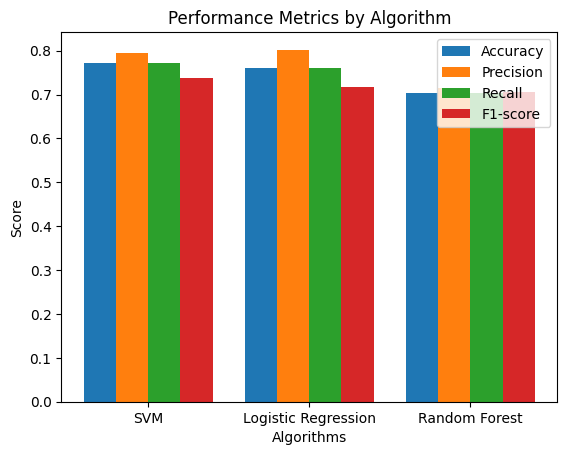

In [51]:
# Bar plot
algorithms = ['SVM', 'Logistic Regression', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

accuracy_values = [svm_accuracy, lr_accuracy, rf_accuracy]
precision_values = [svm_precision, lr_precision, rf_precision]
recall_values = [svm_recall, lr_recall, rf_recall]
f1_values = [svm_f1, lr_f1, rf_f1]

bar_width = 0.2
index = np.arange(len(algorithms))

plt.bar(index, accuracy_values, width=bar_width, label='Accuracy')
plt.bar(index + bar_width, precision_values, width=bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall_values, width=bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_values, width=bar_width, label='F1-score')

plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics by Algorithm')
plt.xticks(index + 1.5 * bar_width, algorithms)
plt.legend()
plt.show()